<a href="https://colab.research.google.com/github/shaon11579/VAE-2021-/blob/main/nov4_result%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Library used 

In [ ]:
install.packages("tfprobability")
library(tfprobability)
library(tensorflow)
install.packages("devtools")
install.packages("usethis")
library(usethis)
install.packages("mvtnorm")
library(mvtnorm)
install.packages("CDM")
library(devtools)
library(keras)
library(CDM)
install.packages("ML2Pvae")
library(ML2Pvae)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘config’, ‘tfruns’, ‘tfautograph’, ‘here’, ‘png’, ‘zeallot’, ‘tensorflow’, ‘reticulate’, ‘keras’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘polycor’, ‘RcppArmadillo’


**********************************
** CDM 7.5-15 (2020-03-10 14:19:21)      
** Cognitive Diagnostic Models  **
**********************************


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
tensorflow::tf$debugging$set_log_device_placement(TRUE)
install.packages("devtools")
install.packages("usethis")
install.packages("CDM")
library(devtools)
install_github('converseg/ML2Pvae', force=TRUE)
library(ML2Pvae)
library(CDM)


tensorflow::tf$config$experimental_run_functions_eagerly(FALSE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




backports (1.2.1 -> 1.3.0) [CRAN]
generics  (0.1.0 -> 0.1.1) [CRAN]


Installing 2 packages: backports, generics

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpFdM8tb/remotes4d4cb87e02/converseg-ML2Pvae-4fef423/DESCRIPTION’
─  preparing ‘ML2Pvae’:
✔  checking DESCRIPTION meta-information
─  excluding invalid files
   Subdirectory 'R' contains invalid file names:
     ‘.RData’
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘ML2Pvae_1.0.0.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# 6 latent raits, 35 items and 10000 students

In [ ]:
#load data /content/corr_q/Q_mat10.csv
qqm <- read.csv("/content/corr_q/Q_mat10.csv")
data <- read.csv("/content/corr_q/response10.csv")


#check str 

str(qqm)
str(data)

'data.frame':	6 obs. of  35 variables:
 $ V1 : int  1 0 0 0 0 0
 $ V2 : int  1 0 0 0 0 0
 $ V3 : int  0 0 1 0 1 1
 $ V4 : int  0 0 1 0 0 1
 $ V5 : int  0 0 1 0 1 0
 $ V6 : int  0 0 0 0 0 0
 $ V7 : int  0 1 0 0 0 0
 $ V8 : int  0 0 0 0 0 0
 $ V9 : int  1 0 0 0 0 0
 $ V10: int  0 0 0 1 0 0
 $ V11: int  0 0 1 0 1 0
 $ V12: int  0 0 0 0 0 1
 $ V13: int  0 0 0 0 0 1
 $ V14: int  0 0 0 0 1 0
 $ V15: int  0 0 0 0 0 0
 $ V16: int  0 1 0 0 1 0
 $ V17: int  0 1 0 0 1 0
 $ V18: int  0 1 0 0 0 0
 $ V19: int  0 0 0 0 0 1
 $ V20: int  0 1 0 0 0 0
 $ V21: int  0 0 0 1 1 1
 $ V22: int  0 0 1 0 0 0
 $ V23: int  1 0 0 1 0 0
 $ V24: int  0 0 0 0 0 0
 $ V25: int  0 0 0 0 0 0
 $ V26: int  0 0 0 1 0 0
 $ V27: int  1 0 1 0 0 0
 $ V28: int  0 0 0 0 0 0
 $ V29: int  0 1 0 0 1 1
 $ V30: int  0 1 0 0 1 0
 $ V31: int  0 0 0 0 0 0
 $ V32: int  1 0 1 0 0 0
 $ V33: int  0 0 0 0 1 0
 $ V34: int  1 0 0 0 0 0
 $ V35: int  0 1 0 0 1 0
'data.frame':	10000 obs. of  35 variables:
 $ V1 : int  0 1 0 1 1 1 1 1 1 1 ...
 $ V2 

In [ ]:
# Load data
data <- as.matrix(data)
Q <- as.matrix(qqm)

In [ ]:
#cov mat 

covariance_matrix <-read.csv("/content/corr_q/correlation_matrix_6.csv") 

cov <- as.matrix(covariance_matrix)

str(cov)

 num [1:6, 1:6] 1 0.0284 0.498 0.247 0.0215 0.0448 0.0284 1 0.45 0.176 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:6] "V1" "V2" "V3" "V4" ...


In [ ]:

# Model parameters
num_items <- as.double(dim(Q)[2])
num_skills <- as.double(dim(Q)[1])
num_students <- dim(data)[1]
means <- rep(0,num_skills)
enc_arch <- c(32L, 16L)
enc_act <- c('relu', 'tanh')
out_act <- 'sigmoid'
kl <- 1

In [ ]:
# Assuming known correlation between latent abilities
models_cor <- build_vae_correlated(num_items,num_skills,
                                          Q,
                                          model_type = 2,
                                          mean_vector = means,
                                          covariance_matrix = cov,
                                          enc_hid_arch = enc_arch,
                                          hid_enc_activations = enc_act,
                                          output_activation = out_act,
                                          kl_weight = kl)
encoder_cor <- models_cor[[1]]
decoder_cor <- models_cor[[2]]
vae_cor <- models_cor[[3]]
encoder_cor
decoder_cor
vae_cor


Warning message in backcompat_fix_rename_lr_to_learning_rate(...):
“the `lr` argument has been renamed to `learning_rate`.”


Model
Model: "model_15"
________________________________________________________________________________
Layer (type)              Output Shape      Param #  Connected to               
input (InputLayer)        [(None, 35)]      0                                   
________________________________________________________________________________
hidden_1 (Dense)          (None, 32)        1152     input[0][0]                
________________________________________________________________________________
hidden_2 (Dense)          (None, 16)        528      hidden_1[0][0]             
________________________________________________________________________________
z_mean (Dense)            (None, 6)         102      hidden_2[0][0]             
________________________________________________________________________________
z_log_cholesky (Dense)    (None, 21)        357      hidden_2[0][0]             
________________________________________________________________________________
z (C

Model
Model: "model_16"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
latent_inputs (InputLayer)          [(None, 6)]                     0           
________________________________________________________________________________
vae_out (Dense)                     (None, 35)                      245         
Total params: 245
Trainable params: 245
Non-trainable params: 0
________________________________________________________________________________



Model
Model: "model_17"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
input (InputLayer)                  [(None, 35)]                    0           
________________________________________________________________________________
model_15 (Functional)               [(None, 6), (None, 21), (None,  2139        
________________________________________________________________________________
model_16 (Functional)               (None, 35)                      245         
Total params: 2,384
Trainable params: 2,384
Non-trainable params: 0
________________________________________________________________________________



In [ ]:
# Training parameters # ch epoch and batch size as needed 
num_train <- floor(0.8 * num_students)
num_test <- num_students - num_train
data_train <- data[1:num_train,]
data_test <- data[(num_train+1):num_students,]
num_epochs <- 32
batch_size <- 16

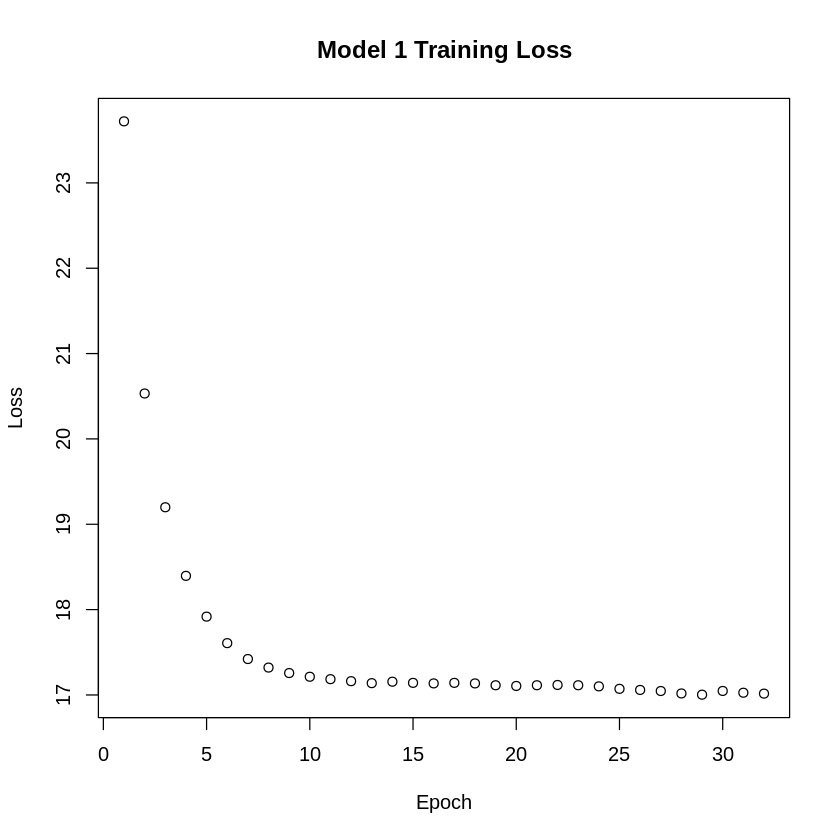

In [ ]:
# Train Model 1
history_cor <- train_model(vae_cor, data_train,
                           num_epochs = num_epochs,
                           batch_size = batch_size,
                           verbose = 1)

plot(history_cor,
     main = 'Model 1 Training Loss',
     sub = '',
     xlab = 'Epoch',
     ylab = 'Loss')

In [ ]:
# Get parameter estimates for Model 2
item_param_estimates_cor <- get_item_parameter_estimates(decoder_cor, model_type = 2)
diff_est_cor <- item_param_estimates_cor[[1]]
disc_est_cor <- item_param_estimates_cor[[2]]
test_theta_est_cor <- get_ability_parameter_estimates(encoder_cor, data_test)[[1]]
all_theta_est_cor <- get_ability_parameter_estimates(encoder_cor, data)[[1]]

In [ ]:
write.csv(all_theta_est_cor,"/content/corr_q/all_theta_est_cor.csv")
write.csv(diff_est_cor,"/content/corr_q/diff_est_cor.csv")
write.csv(disc_est_cor,"/content/corr_q/disc_est_cor.csv")

In [ ]:
disc_true10<-read.csv("/content/corr_q/dis_true10.csv")
diff_true10<-read.csv("/content/corr_q/diff_true10.csv")
theta_true10<-read.csv("/content/corr_q/theta_true10.csv")

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on '/content/corr_q/diff_true10.csv'”


In [ ]:
# Load in true values (included in this pacakge)
disc_true <- as.matrix(disc_true10)
diff_true <- as.matrix(diff_true10)
theta_true<- as.matrix(theta_true10)

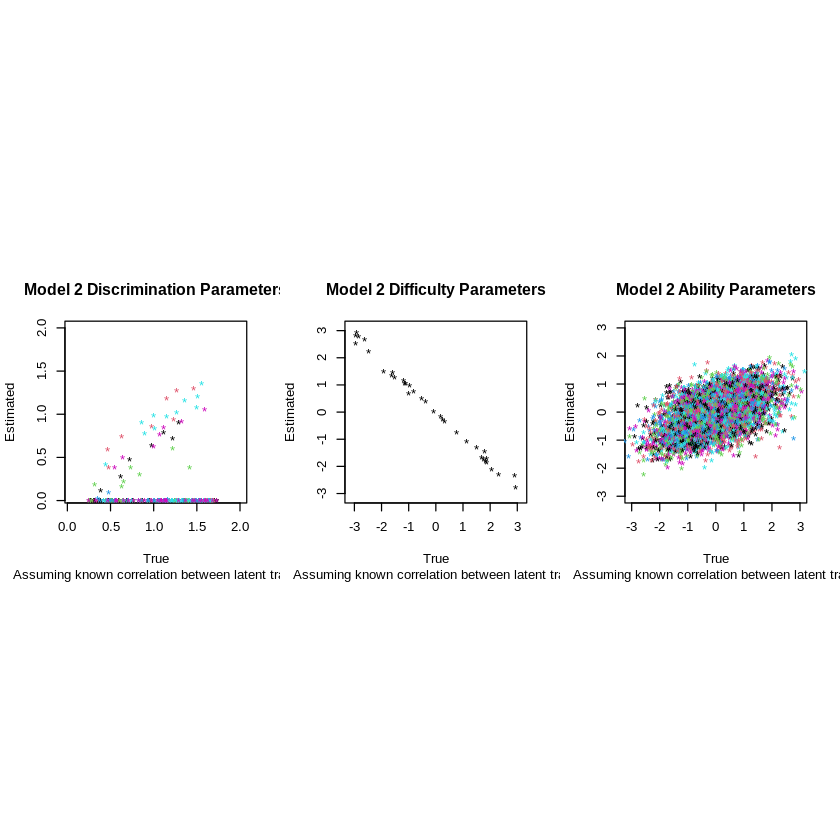

In [ ]:
# par 3 plot 
par(mfrow=c(1,3))

# Examine Model 2 estimates
par(pty="s")
matplot(t(disc_true), t(disc_est_cor), pch = '*',
xlim = c(0.05, 2), ylim = c(0.05, 2),
main = 'Model 2 Discrimination Parameters',
sub = 'Assuming known correlation between latent traits',
xlab = 'True', ylab = 'Estimated')


par(pty="s")
plot(diff_true, diff_est_cor, pch = '*',
xlim = c(-3.1,3.1), ylim = c(-3.1,3.1),
main = 'Model 2 Difficulty Parameters',
sub = 'Assuming known correlation between latent traits',
xlab = 'True', ylab = 'Estimated')


par(pty="s")
matplot(t(theta_true[6000:7000,]), t(all_theta_est_cor[6000:7000,]), pch = '*',
xlim = c(-3,3), ylim = c(-3,3),
main = 'Model 2 Ability Parameters',
sub = 'Assuming known correlation between latent traits',
xlab = 'True', ylab = 'Estimated')

#Independent 

In [ ]:
qqm <- read.csv("/content/corr_q/Q_mat10.csv")
data <- read.csv("/content/corr_q/response10.csv")


# Load data
data <- as.matrix(data)
Q <- as.matrix(qqm)


In [ ]:
# Model parameters
num_items <- as.double(dim(Q)[2])
num_skills <- as.double(dim(Q)[1])
num_students <- dim(data)[1]
means <- rep(0,num_skills)
enc_arch <- c(32L, 16L)
enc_act <- c('relu', 'tanh')
out_act <- 'sigmoid'
kl <- 1


In [ ]:
#Model 1: An ML2P-VAE model assuming latent traits are independent

models_ind <- build_vae_independent(num_items, num_skills,
                                    Q,
                                    model_type = 2,
                                    enc_hid_arch = enc_arch,
                                    hid_enc_activation = enc_act,
                                    output_activation = out_act)
encoder_ind <- models_ind[[1]]
decoder_ind <- models_ind[[2]]
vae_ind <- models_ind[[3]]
encoder_ind
decoder_ind
vae_ind


Warning message in backcompat_fix_rename_lr_to_learning_rate(...):
“the `lr` argument has been renamed to `learning_rate`.”


Model
Model: "model_6"
________________________________________________________________________________
Layer (type)              Output Shape      Param #  Connected to               
input (InputLayer)        [(None, 35)]      0                                   
________________________________________________________________________________
hidden_1 (Dense)          (None, 32)        1152     input[0][0]                
________________________________________________________________________________
hidden_2 (Dense)          (None, 16)        528      hidden_1[0][0]             
________________________________________________________________________________
z_mean (Dense)            (None, 6)         102      hidden_2[0][0]             
________________________________________________________________________________
z_log_var (Dense)         (None, 6)         102      hidden_2[0][0]             
________________________________________________________________________________
z (Co

Model
Model: "model_7"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
latent_inputs (InputLayer)          [(None, 6)]                     0           
________________________________________________________________________________
vae_out (Dense)                     (None, 35)                      245         
Total params: 245
Trainable params: 245
Non-trainable params: 0
________________________________________________________________________________



Model
Model: "model_8"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
input (InputLayer)                  [(None, 35)]                    0           
________________________________________________________________________________
model_6 (Functional)                [(None, 6), (None, 6), (None, 6 1884        
________________________________________________________________________________
model_7 (Functional)                (None, 35)                      245         
Total params: 2,129
Trainable params: 2,129
Non-trainable params: 0
________________________________________________________________________________



In [ ]:
# Training parameters
num_train <- floor(0.8 * num_students)
num_test <- num_students - num_train
data_train <- data[1:num_train,]
data_test <- data[(num_train+1):num_students,]
num_epochs <- 32
batch_size <- 16

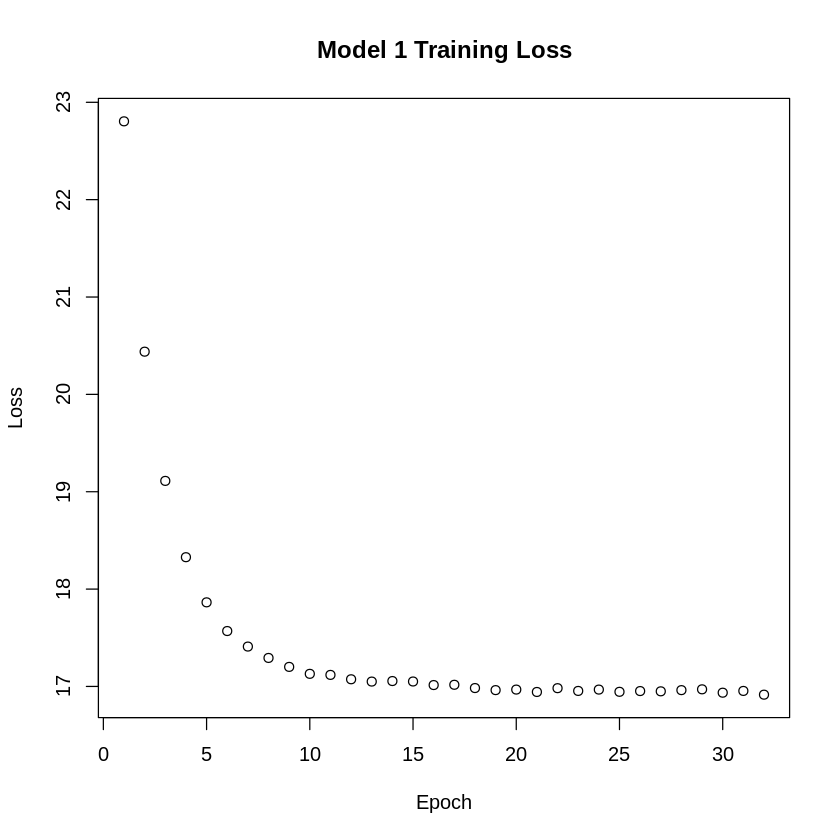

In [ ]:
# Train Model 1
history_ind <- train_model(vae_ind, data_train,
                           num_epochs = num_epochs,
                           batch_size = batch_size,
                           verbose = 1)

plot(history_ind,
     main = 'Model 1 Training Loss',
     sub = '',
     xlab = 'Epoch',
     ylab = 'Loss')

In [ ]:

# Get parameter estimates for Model 1
item_param_estimates_ind<- get_item_parameter_estimates(decoder_ind, model_type = 2)
diff_est_ind <- item_param_estimates_ind[[1]]
disc_est_ind <- item_param_estimates_ind[[2]]
test_theta_est_ind <- get_ability_parameter_estimates(encoder_ind, data_test)[[1]]
all_theta_est_ind <- get_ability_parameter_estimates(encoder_ind, data)[[1]]

In [ ]:
write.csv(all_theta_est_ind,"/content/corr_q/all_theta_est_ind.csv")
write.csv(diff_est_ind,"/content/corr_q/diff_est_ind.csv" )
write.csv(disc_est_ind ,"/content/corr_q/disc_est_ind.csv" )

In [ ]:
disc_true10<-read.csv("/content/corr_q/dis_true10.csv")
diff_true10<-read.csv("/content/corr_q/diff_true10.csv")
theta_true10<-read.csv("/content/corr_q/theta_true10.csv")

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on '/content/corr_q/diff_true10.csv'”


In [ ]:
# Load in true values (included in this pacakge)
disc_true <- as.matrix(disc_true)
diff_true <- as.matrix(diff_true) 
theta_true<- as.matrix(theta_true)

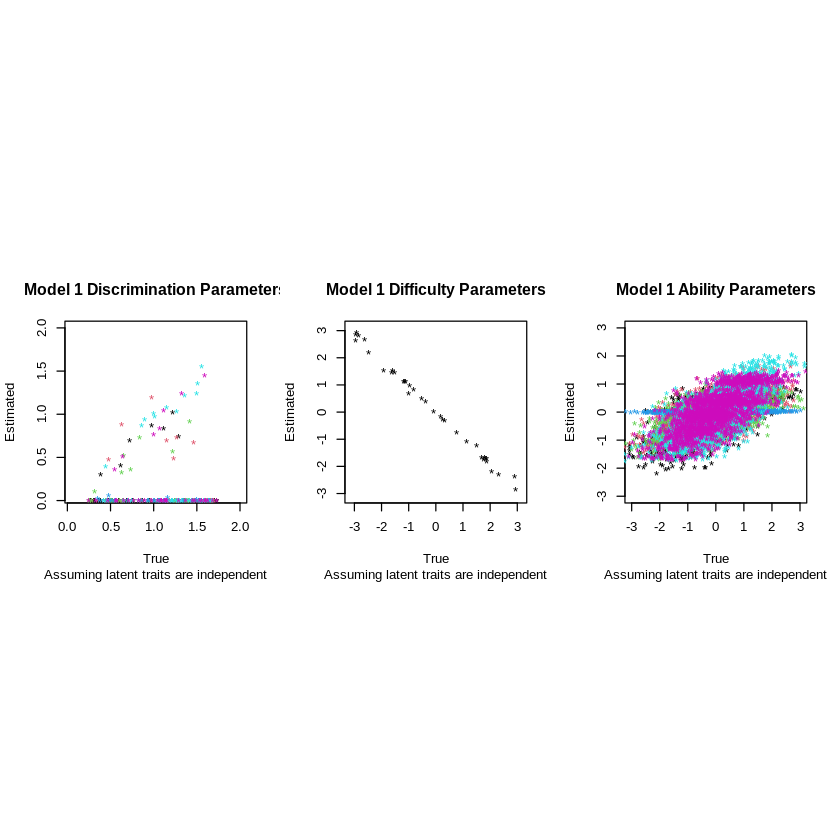

In [ ]:
par(mfrow=c(1,3))


# Examine Model 1 estimates
par(pty="s")
matplot(t(disc_true), t(disc_est_ind), pch = '*',
        xlim = c(0.05,2), ylim = c(0.05,2),
        main = 'Model 1 Discrimination Parameters',
        sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')



# Discrimination Parameters

par(pty="s")
plot(diff_true, diff_est_ind, pch = '*',
     xlim = c(-3.1,3.1), ylim = c(-3.1,3.1),
     main = 'Model 1 Difficulty Parameters',
     sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')


# Ability Parameters
par(pty="s")
matplot(theta_true[6000:8000,],
        all_theta_est_ind[6000:8000,], pch = '*',
        xlim = c(-3,3), ylim = c(-3,3),
        main = 'Model 1 Ability Parameters',
        sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')







# 6 latent raits, 50 items and 25000 students

In [ ]:
#load data 
qqm <- read.csv("/content/corr_q/Q_mat15.csv")
data <- read.csv("/content/corr_q/response15.csv")


#check str 

str(qqm)
str(data)

'data.frame':	6 obs. of  20 variables:
 $ V1 : int  0 0 0 0 0 0
 $ V2 : int  0 0 0 0 0 0
 $ V3 : int  0 0 0 1 0 0
 $ V4 : int  0 0 0 0 0 1
 $ V5 : int  0 0 0 1 1 0
 $ V6 : int  0 0 0 0 0 0
 $ V7 : int  0 1 0 0 0 1
 $ V8 : int  0 1 0 1 0 0
 $ V9 : int  0 0 0 0 0 0
 $ V10: int  0 0 0 1 0 0
 $ V11: int  0 0 0 0 0 0
 $ V12: int  1 0 0 0 0 1
 $ V13: int  1 0 0 0 0 1
 $ V14: int  0 0 0 0 0 0
 $ V15: int  0 1 1 0 1 0
 $ V16: int  0 0 1 0 0 0
 $ V17: int  0 1 0 0 1 0
 $ V18: int  0 0 0 1 0 0
 $ V19: int  0 0 1 0 0 0
 $ V20: int  0 0 0 0 0 0
'data.frame':	15000 obs. of  20 variables:
 $ V1 : int  0 1 0 1 0 0 1 1 1 0 ...
 $ V2 : int  0 0 0 0 0 0 0 1 0 0 ...
 $ V3 : int  0 0 0 0 0 0 0 1 0 0 ...
 $ V4 : int  1 0 0 1 0 0 0 1 0 0 ...
 $ V5 : int  0 1 0 1 0 0 1 0 0 0 ...
 $ V6 : int  1 1 1 1 1 0 1 1 1 1 ...
 $ V7 : int  1 0 0 0 0 0 1 1 0 0 ...
 $ V8 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ V9 : int  1 0 1 0 1 1 1 1 1 1 ...
 $ V10: int  0 0 1 0 1 1 1 0 0 0 ...
 $ V11: int  1 1 0 1 0 1 0 0 1 1 ...
 $ V12: int

In [ ]:
# Load data
data <- as.matrix(data)
Q <- as.matrix(qqm)

In [ ]:
#cov mat 

covariance_matrix <-read.csv("/content/corr_q/correlation_matrix_6.csv") 

cov <- as.matrix(covariance_matrix)

str(cov)

 num [1:6, 1:6] 1 0.0284 0.498 0.247 0.0215 0.0448 0.0284 1 0.45 0.176 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:6] "V1" "V2" "V3" "V4" ...


In [ ]:
# Model parameters
num_items <- as.double(dim(Q)[2])
num_skills <- as.double(dim(Q)[1])
num_students <- dim(data)[1]
means <- rep(0,num_skills)
enc_arch <- c(64L, 32L)
enc_act <- c('relu', 'tanh')
out_act <- 'sigmoid'
kl <- 1

In [ ]:
# Assuming known correlation between latent abilities
models_cor <- build_vae_correlated(num_items,num_skills,
                                          Q,
                                          model_type = 2,
                                          mean_vector = means,
                                          covariance_matrix = cov,
                                          enc_hid_arch = enc_arch,
                                          hid_enc_activations = enc_act,
                                          output_activation = out_act,
                                          kl_weight = kl)
encoder_cor <- models_cor[[1]]
decoder_cor <- models_cor[[2]]
vae_cor <- models_cor[[3]]
encoder_cor
decoder_cor
vae_cor


Warning message in backcompat_fix_rename_lr_to_learning_rate(...):
“the `lr` argument has been renamed to `learning_rate`.”


Model
Model: "model_9"
________________________________________________________________________________
Layer (type)              Output Shape      Param #  Connected to               
input (InputLayer)        [(None, 20)]      0                                   
________________________________________________________________________________
hidden_1 (Dense)          (None, 64)        1344     input[0][0]                
________________________________________________________________________________
hidden_2 (Dense)          (None, 32)        2080     hidden_1[0][0]             
________________________________________________________________________________
z_mean (Dense)            (None, 6)         198      hidden_2[0][0]             
________________________________________________________________________________
z_log_cholesky (Dense)    (None, 21)        693      hidden_2[0][0]             
________________________________________________________________________________
z (Co

Model
Model: "model_10"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
latent_inputs (InputLayer)          [(None, 6)]                     0           
________________________________________________________________________________
vae_out (Dense)                     (None, 20)                      140         
Total params: 140
Trainable params: 140
Non-trainable params: 0
________________________________________________________________________________



Model
Model: "model_11"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
input (InputLayer)                  [(None, 20)]                    0           
________________________________________________________________________________
model_9 (Functional)                [(None, 6), (None, 21), (None,  4315        
________________________________________________________________________________
model_10 (Functional)               (None, 20)                      140         
Total params: 4,455
Trainable params: 4,455
Non-trainable params: 0
________________________________________________________________________________



In [ ]:
# Training parameters # ch epoch and batch size as needed 
num_train <- floor(0.8 * num_students)
num_test <- num_students - num_train
data_train <- data[1:num_train,]
data_test <- data[(num_train+1):num_students,]
num_epochs <- 64
batch_size <- 32

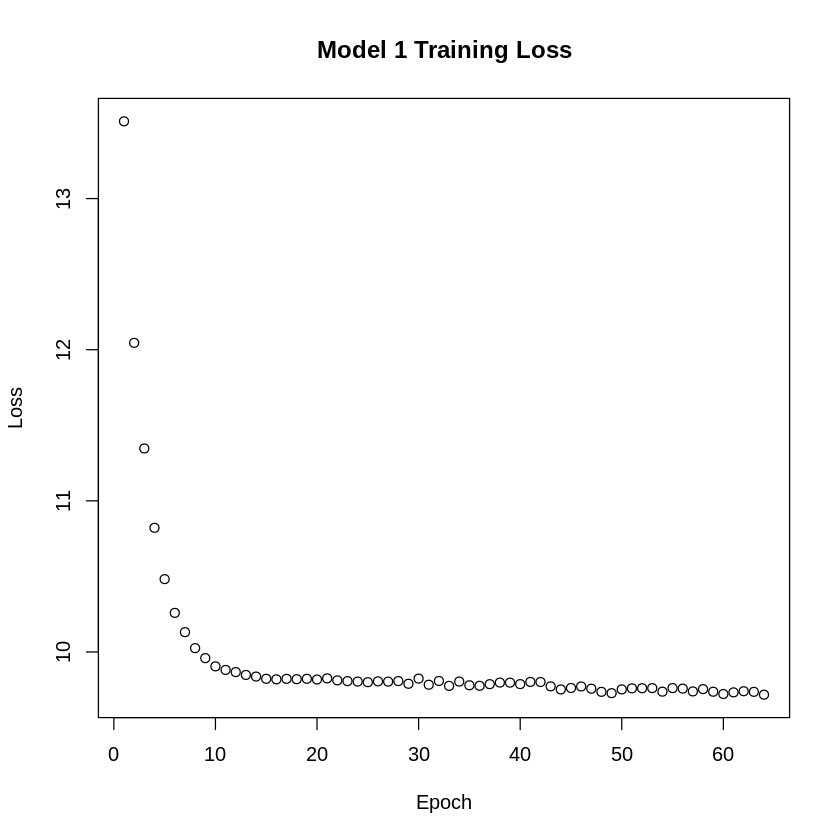

In [ ]:
# Train Model 1
history_cor <- train_model(vae_cor, data_train,
                           num_epochs = num_epochs,
                           batch_size = batch_size,
                           verbose = 1)

plot(history_cor,
     main = 'Model 1 Training Loss',
     sub = '',
     xlab = 'Epoch',
     ylab = 'Loss')


In [ ]:
# Get parameter estimates for Model 2
item_param_estimates_cor <- get_item_parameter_estimates(decoder_cor, model_type = 2)
diff_est_cor <- item_param_estimates_cor[[1]]
disc_est_cor <- item_param_estimates_cor[[2]]
test_theta_est_cor <- get_ability_parameter_estimates(encoder_cor, data_test)[[1]]
all_theta_est_cor <- get_ability_parameter_estimates(encoder_cor, data)[[1]]

In [ ]:
disc_true15<-read.csv("/content/corr_q/dis_true15.csv")
diff_true15<-read.csv("/content/corr_q/diff_true15.csv")
theta_true15<-read.csv("/content/corr_q/theta_true15.csv")

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on '/content/corr_q/diff_true15.csv'”


In [ ]:
# Load in true values (included in this pacakge)
disc_true <- as.matrix(disc_true15)
diff_true <- as.matrix(diff_true15)
theta_true<- as.matrix(theta_true15)

In [ ]:
str(disc_true)


 num [1:6, 1:20] 0.693 0.984 0.705 1.268 1.5 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:20] "V1" "V2" "V3" "V4" ...


In [ ]:
str(diff_true )


 num [1, 1:20] 2.5243 2.1142 1.1218 2.125 -0.0611 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:20] "V1" "V2" "V3" "V4" ...


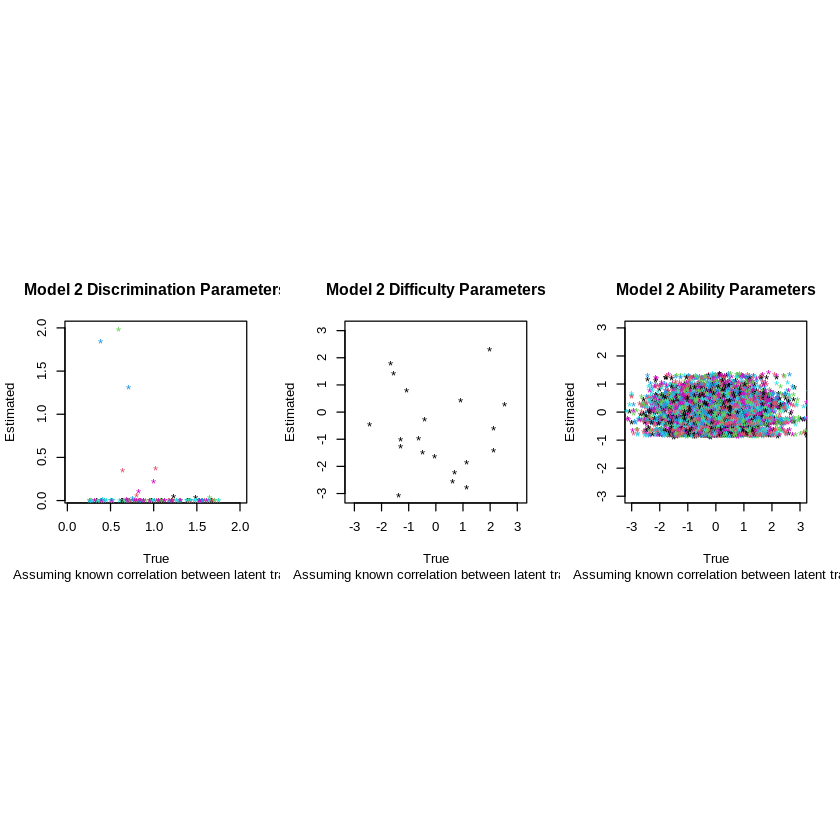

In [ ]:
# par 3 plot 
par(mfrow=c(1,3))

# Examine Model 2 estimates
par(pty="s")
matplot(t(disc_true), t(disc_est_cor), pch = '*',
xlim = c(0.05, 2), ylim = c(0.05, 2),
main = 'Model 2 Discrimination Parameters',
sub = 'Assuming known correlation between latent traits',
xlab = 'True', ylab = 'Estimated')


par(pty="s")
plot(diff_true, diff_est_cor, pch = '*',
xlim = c(-3.1,3.1), ylim = c(-3.1,3.1),
main = 'Model 2 Difficulty Parameters',
sub = 'Assuming known correlation between latent traits',
xlab = 'True', ylab = 'Estimated')


par(pty="s")
matplot(t(theta_true[12000:14000,]), t(all_theta_est_cor[12000:14000,]), pch = '*',
xlim = c(-3,3), ylim = c(-3,3),
main = 'Model 2 Ability Parameters',
sub = 'Assuming known correlation between latent traits',
xlab = 'True', ylab = 'Estimated')


# 6 latent raits, 20 items and 15000 students

# 6 latent raits, 50 items and 25000 students

In [ ]:

#load data 
qqm <- read.csv("/content/corr_q/Q_mat25.csv")
data <- read.csv("/content/corr_q/response25.csv")


#check str 

str(qqm)
str(data)


'data.frame':	6 obs. of  50 variables:
 $ V1 : int  0 0 0 0 0 0
 $ V2 : int  1 0 0 0 0 0
 $ V3 : int  0 1 0 1 1 0
 $ V4 : int  0 0 1 1 0 0
 $ V5 : int  1 0 0 0 0 0
 $ V6 : int  1 1 1 0 0 0
 $ V7 : int  0 0 0 0 0 0
 $ V8 : int  1 0 0 0 0 0
 $ V9 : int  0 0 0 0 0 1
 $ V10: int  0 0 0 0 0 0
 $ V11: int  0 0 0 1 0 0
 $ V12: int  0 1 1 0 0 1
 $ V13: int  0 0 0 0 0 0
 $ V14: int  0 0 0 0 0 0
 $ V15: int  1 0 0 1 0 0
 $ V16: int  0 0 0 1 0 0
 $ V17: int  0 0 0 0 0 0
 $ V18: int  0 1 0 0 1 0
 $ V19: int  0 0 1 1 0 0
 $ V20: int  0 0 0 0 1 0
 $ V21: int  0 0 0 1 0 0
 $ V22: int  0 0 0 1 1 0
 $ V23: int  0 0 0 0 0 0
 $ V24: int  0 0 0 0 0 0
 $ V25: int  1 1 0 0 1 0
 $ V26: int  0 1 0 0 0 1
 $ V27: int  0 0 0 0 0 0
 $ V28: int  1 0 0 0 0 1
 $ V29: int  0 0 0 0 0 0
 $ V30: int  0 1 1 0 1 0
 $ V31: int  0 0 0 0 0 0
 $ V32: int  0 0 0 1 0 0
 $ V33: int  0 0 1 0 0 0
 $ V34: int  0 0 0 0 0 0
 $ V35: int  0 0 0 1 0 1
 $ V36: int  1 1 1 0 0 0
 $ V37: int  1 0 0 0 0 0
 $ V38: int  0 0 0 0 0 0
 $ V39: int

In [ ]:
# Load data
data <- as.matrix(data)
Q <- as.matrix(qqm)

#cov mat 

covariance_matrix <-read.csv("/content/corr_q/correlation_matrix_6.csv") 

cov <- as.matrix(covariance_matrix)

str(cov)


 num [1:6, 1:6] 1 0.0284 0.498 0.247 0.0215 0.0448 0.0284 1 0.45 0.176 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:6] "V1" "V2" "V3" "V4" ...


In [ ]:
# Model parameters
num_items <- as.double(dim(Q)[2])
num_skills <- as.double(dim(Q)[1])
num_students <- dim(data)[1]
means <- rep(0,num_skills)
enc_arch <- c(64L, 32L)
enc_act <- c('relu', 'tanh')
out_act <- 'sigmoid'
kl <- 1

In [ ]:
# Assuming known correlation between latent abilities
models_cor <- build_vae_correlated(num_items,num_skills,
                                          Q,
                                          model_type = 2,
                                          mean_vector = means,
                                          covariance_matrix = cov,
                                          enc_hid_arch = enc_arch,
                                          hid_enc_activations = enc_act,
                                          output_activation = out_act,
                                          kl_weight = kl)
encoder_cor <- models_cor[[1]]
decoder_cor <- models_cor[[2]]
vae_cor <- models_cor[[3]]
encoder_cor
decoder_cor
vae_cor


Warning message in backcompat_fix_rename_lr_to_learning_rate(...):
“the `lr` argument has been renamed to `learning_rate`.”


Model
Model: "model_21"
________________________________________________________________________________
Layer (type)              Output Shape      Param #  Connected to               
input (InputLayer)        [(None, 50)]      0                                   
________________________________________________________________________________
hidden_1 (Dense)          (None, 64)        3264     input[0][0]                
________________________________________________________________________________
hidden_2 (Dense)          (None, 32)        2080     hidden_1[0][0]             
________________________________________________________________________________
z_mean (Dense)            (None, 6)         198      hidden_2[0][0]             
________________________________________________________________________________
z_log_cholesky (Dense)    (None, 21)        693      hidden_2[0][0]             
________________________________________________________________________________
z (C

Model
Model: "model_22"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
latent_inputs (InputLayer)          [(None, 6)]                     0           
________________________________________________________________________________
vae_out (Dense)                     (None, 50)                      350         
Total params: 350
Trainable params: 350
Non-trainable params: 0
________________________________________________________________________________



Model
Model: "model_23"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
input (InputLayer)                  [(None, 50)]                    0           
________________________________________________________________________________
model_21 (Functional)               [(None, 6), (None, 21), (None,  6235        
________________________________________________________________________________
model_22 (Functional)               (None, 50)                      350         
Total params: 6,585
Trainable params: 6,585
Non-trainable params: 0
________________________________________________________________________________



In [ ]:
# Training parameters # ch epoch and batch size as needed 
num_train <- floor(0.8 * num_students)
num_test <- num_students - num_train
data_train <- data[1:num_train,]
data_test <- data[(num_train+1):num_students,]
num_epochs <- 64
batch_size <- 32

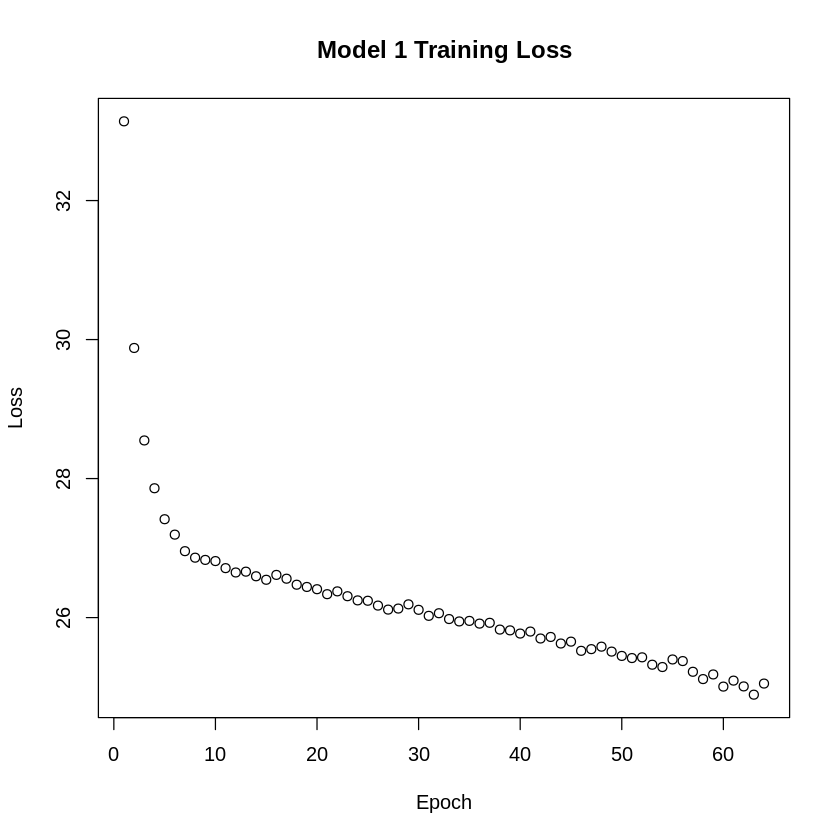

In [ ]:
# Train Model 1
history_cor <- train_model(vae_cor, data_train,
                           num_epochs = num_epochs,
                           batch_size = batch_size,
                           verbose = 1)

plot(history_cor,
     main = 'Model 1 Training Loss',
     sub = '',
     xlab = 'Epoch',
     ylab = 'Loss')

In [ ]:
# Get parameter estimates for Model 2
item_param_estimates_cor <- get_item_parameter_estimates(decoder_cor, model_type = 2)
diff_est_cor <- item_param_estimates_cor[[1]]
disc_est_cor <- item_param_estimates_cor[[2]]
test_theta_est_cor <- get_ability_parameter_estimates(encoder_cor, data_test)[[1]]
all_theta_est_cor <- get_ability_parameter_estimates(encoder_cor, data)[[1]]

In [ ]:
write.csv(all_theta_est_cor,"/content/corr_q/all_theta_est_cor25.csv")
write.csv(diff_est_cor,"/content/corr_q/diff_est_cor25.csv" )
write.csv(disc_est_cor,"/content/corr_q/disc_est_cor25.csv" )

In [ ]:
disc_true25<-read.csv("/content/corr_q/dis_true25.csv")
diff_true25<-read.csv("/content/corr_q/diff_true25.csv")
theta_true25<-read.csv("/content/corr_q/theta_true25.csv")


Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on '/content/corr_q/diff_true25.csv'”


In [ ]:
# Load in true values (included in this pacakge)
disc_true <- as.matrix(disc_true25)
diff_true <- as.matrix(diff_true25)
theta_true<- as.matrix(theta_true25)

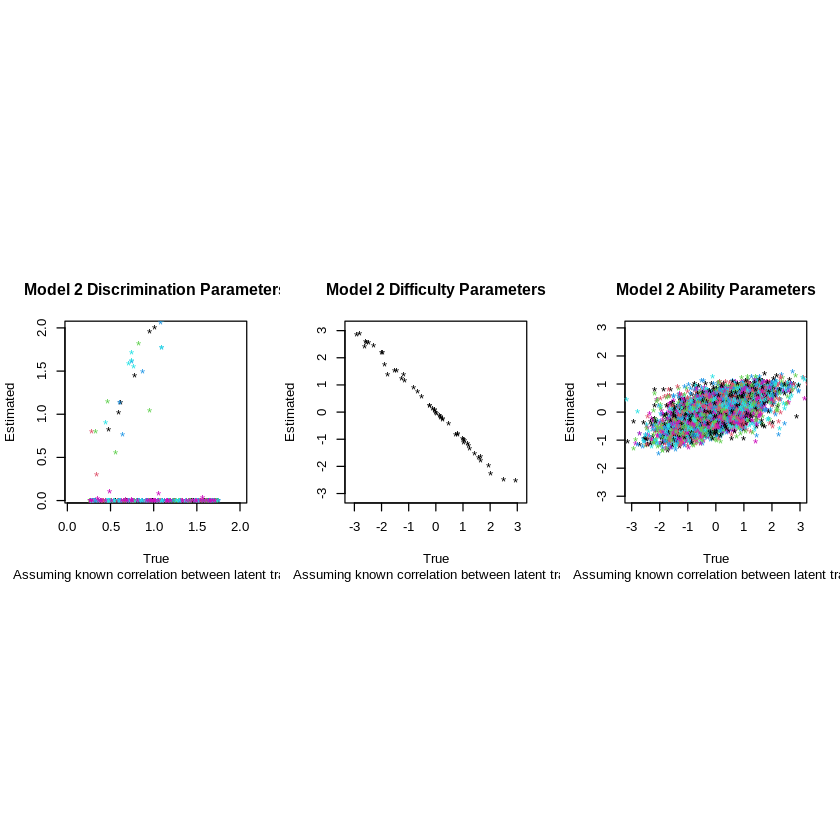

In [ ]:
# par 3 plot 
par(mfrow=c(1,3))

# Examine Model 2 estimates
par(pty="s")
matplot(t(disc_true), t(disc_est_cor), pch = '*',
xlim = c(0.05, 2), ylim = c(0.05, 2),
main = 'Model 2 Discrimination Parameters',
sub = 'Assuming known correlation between latent traits',
xlab = 'True', ylab = 'Estimated')


par(pty="s")
plot(diff_true, diff_est_cor, pch = '*',
xlim = c(-3.1,3.1), ylim = c(-3.1,3.1),
main = 'Model 2 Difficulty Parameters',
sub = 'Assuming known correlation between latent traits',
xlab = 'True', ylab = 'Estimated')


par(pty="s")
matplot(t(theta_true[22000:23000,]), t(all_theta_est_cor[22000:23000,]), pch = '*',
xlim = c(-3,3), ylim = c(-3,3),
main = 'Model 2 Ability Parameters',
sub = 'Assuming known correlation between latent traits',
xlab = 'True', ylab = 'Estimated')

# IV

In [ ]:
qqm <- read.csv("/content/corr_q/Q_mat25.csv")
data <- read.csv("/content/corr_q/response25.csv")


# Load data
data <- as.matrix(data)
Q <- as.matrix(qqm)


In [ ]:
# Model parameters
num_items <- as.double(dim(Q)[2])
num_skills <- as.double(dim(Q)[1])
num_students <- dim(data)[1]
means <- rep(0,num_skills)
enc_arch <- c(64L, 32L)
enc_act <- c('relu', 'tanh')
out_act <- 'sigmoid'
kl <- 1


In [ ]:
#Model 1: An ML2P-VAE model assuming latent traits are independent

models_ind <- build_vae_independent(num_items, num_skills,
                                    Q,
                                    model_type = 2,
                                    enc_hid_arch = enc_arch,
                                    hid_enc_activation = enc_act,
                                    output_activation = out_act)
encoder_ind <- models_ind[[1]]
decoder_ind <- models_ind[[2]]
vae_ind <- models_ind[[3]]
encoder_ind
decoder_ind
vae_ind

Warning message in backcompat_fix_rename_lr_to_learning_rate(...):
“the `lr` argument has been renamed to `learning_rate`.”


Model
Model: "model_27"
________________________________________________________________________________
Layer (type)              Output Shape      Param #  Connected to               
input (InputLayer)        [(None, 50)]      0                                   
________________________________________________________________________________
hidden_1 (Dense)          (None, 64)        3264     input[0][0]                
________________________________________________________________________________
hidden_2 (Dense)          (None, 32)        2080     hidden_1[0][0]             
________________________________________________________________________________
z_mean (Dense)            (None, 6)         198      hidden_2[0][0]             
________________________________________________________________________________
z_log_var (Dense)         (None, 6)         198      hidden_2[0][0]             
________________________________________________________________________________
z (C

Model
Model: "model_28"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
latent_inputs (InputLayer)          [(None, 6)]                     0           
________________________________________________________________________________
vae_out (Dense)                     (None, 50)                      350         
Total params: 350
Trainable params: 350
Non-trainable params: 0
________________________________________________________________________________



Model
Model: "model_29"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
input (InputLayer)                  [(None, 50)]                    0           
________________________________________________________________________________
model_27 (Functional)               [(None, 6), (None, 6), (None, 6 5740        
________________________________________________________________________________
model_28 (Functional)               (None, 50)                      350         
Total params: 6,090
Trainable params: 6,090
Non-trainable params: 0
________________________________________________________________________________



In [ ]:
# Training parameters
num_train <- floor(0.8 * num_students)
num_test <- num_students - num_train
data_train <- data[1:num_train,]
data_test <- data[(num_train+1):num_students,]
num_epochs <- 64
batch_size <- 32

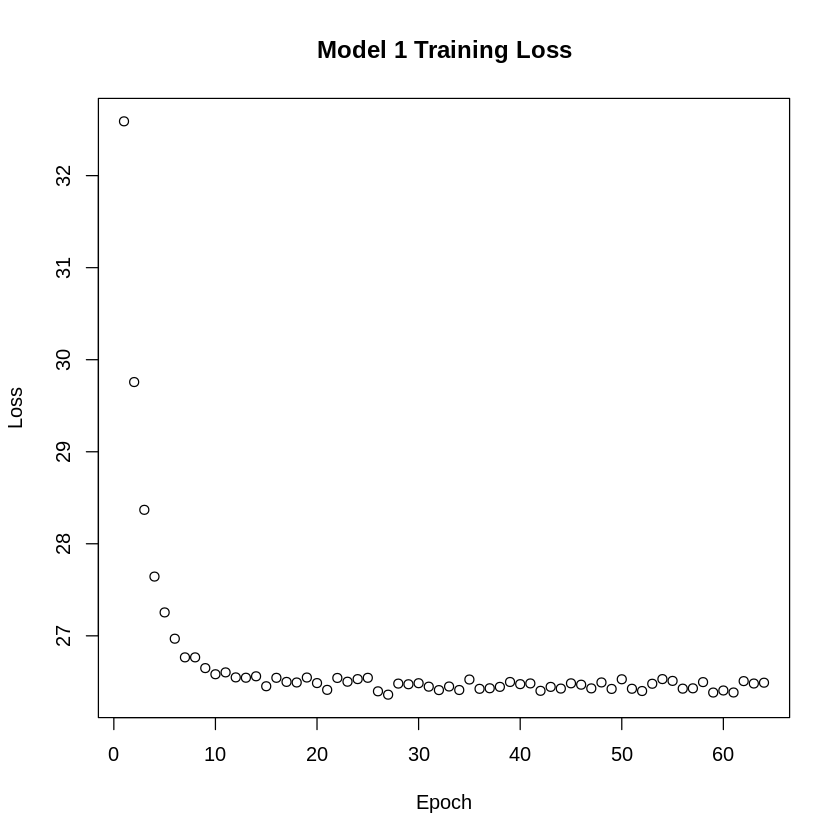

In [ ]:
# Train Model 1
history_ind <- train_model(vae_ind, data_train,
                           num_epochs = num_epochs,
                           batch_size = batch_size,
                           verbose = 1)

plot(history_ind,
     main = 'Model 1 Training Loss',
     sub = '',
     xlab = 'Epoch',
     ylab = 'Loss')

In [ ]:
# Get parameter estimates for Model 1
item_param_estimates_ind<- get_item_parameter_estimates(decoder_ind, model_type = 2)
diff_est_ind <- item_param_estimates_ind[[1]]
disc_est_ind <- item_param_estimates_ind[[2]]
test_theta_est_ind <- get_ability_parameter_estimates(encoder_ind, data_test)[[1]]
all_theta_est_ind <- get_ability_parameter_estimates(encoder_ind, data)[[1]]


In [ ]:
disc_true25<-read.csv("/content/corr_q/dis_true25.csv")
diff_true25<-read.csv("/content/corr_q/diff_true25.csv")
theta_true25<-read.csv("/content/corr_q/theta_true25.csv")

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on '/content/corr_q/diff_true25.csv'”


In [ ]:
# Load in true values (included in this pacakge)
disc_true <- as.matrix(disc_true25)
diff_true <- as.matrix(diff_true25) 
theta_true<- as.matrix(theta_true25)

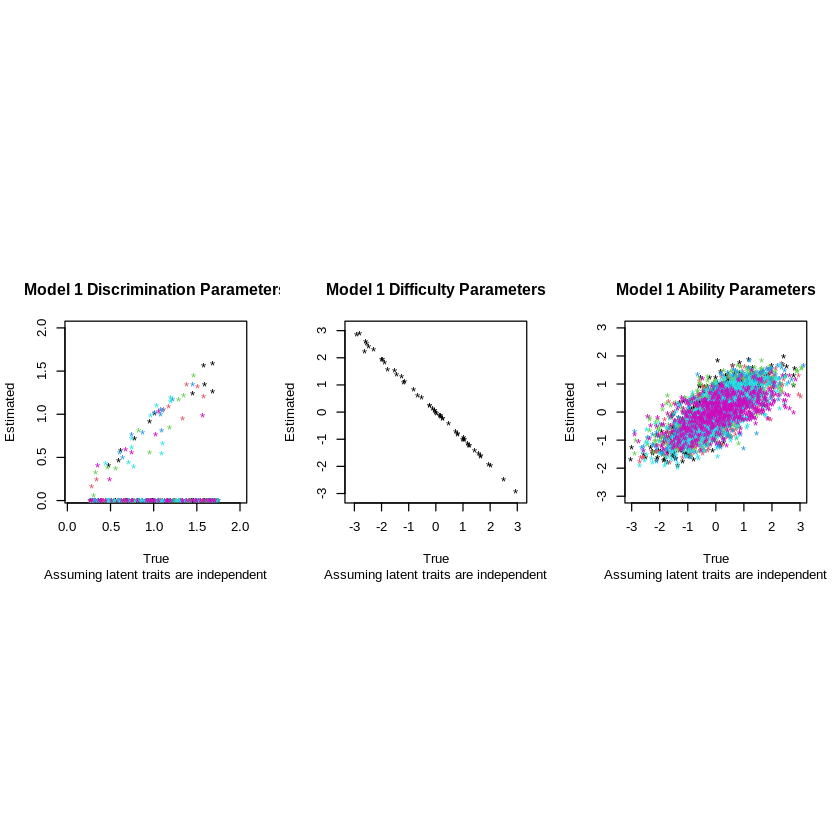

In [ ]:
par(mfrow=c(1,3))


# Examine Model 1 estimates
par(pty="s")
matplot(t(disc_true), t(disc_est_ind), pch = '*',
        xlim = c(0.05,2), ylim = c(0.05,2),
        main = 'Model 1 Discrimination Parameters',
        sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')



# Discrimination Parameters

par(pty="s")
plot(diff_true, diff_est_ind, pch = '*',
     xlim = c(-3.1,3.1), ylim = c(-3.1,3.1),
     main = 'Model 1 Difficulty Parameters',
     sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')


# Ability Parameters
par(pty="s")
matplot(theta_true[3200:3800,],
        all_theta_est_ind[3200:3800,], pch = '*',
        xlim = c(-3,3), ylim = c(-3,3),
        main = 'Model 1 Ability Parameters',
        sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')



# 3 latent traits 30 items, and 4199 students. ML2P-VAE model assuming correlation among traits is known

#3 latent trait 26 itmes and 3000 students

In [ ]:

#load data 
qqm <- read.csv("/content/corr_q/Q_mat3.csv")
data <- read.csv("/content/corr_q/response3.csv")


#check str 

str(qqm)
str(data)

# Load data
data <- as.matrix(data)
Q <- as.matrix(qqm)



Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on '/content/corr_q/Q_mat3.csv'”


'data.frame':	3 obs. of  26 variables:
 $ V1 : int  0 0 0
 $ V2 : int  0 0 0
 $ V3 : int  0 1 0
 $ V4 : int  1 0 1
 $ V5 : int  0 0 0
 $ V6 : int  1 0 0
 $ V7 : int  0 0 1
 $ V8 : int  0 0 0
 $ V9 : int  0 0 0
 $ V10: int  1 0 0
 $ V11: int  1 0 0
 $ V12: int  0 0 0
 $ V13: int  0 0 0
 $ V14: int  0 0 0
 $ V15: int  0 0 0
 $ V16: int  0 0 0
 $ V17: int  1 0 1
 $ V18: int  0 0 0
 $ V19: int  0 1 0
 $ V20: int  0 0 0
 $ V21: int  0 0 0
 $ V22: int  0 0 0
 $ V23: int  0 0 0
 $ V24: int  0 0 0
 $ V25: int  1 0 0
 $ V26: int  1 0 0
'data.frame':	3000 obs. of  26 variables:
 $ V1 : int  0 0 0 0 1 1 0 0 0 1 ...
 $ V2 : int  1 1 1 1 0 1 1 1 1 1 ...
 $ V3 : int  0 1 0 1 1 1 0 0 0 0 ...
 $ V4 : int  0 0 0 0 1 1 0 1 0 1 ...
 $ V5 : int  1 1 1 1 0 1 1 1 1 1 ...
 $ V6 : int  1 1 0 0 1 1 1 1 1 1 ...
 $ V7 : int  1 1 0 1 1 1 1 0 1 1 ...
 $ V8 : int  0 0 0 1 1 0 0 1 0 1 ...
 $ V9 : int  0 0 0 1 0 0 0 0 0 1 ...
 $ V10: int  1 1 1 1 1 1 1 1 1 1 ...
 $ V11: int  1 1 1 0 1 1 1 1 1 1 ...
 $ V12: int  1 1 0

In [ ]:
#corr mat 

covariance_matrix <-read.csv("/content/corr_q/cov matrix .csv") 

cov <- as.matrix(covariance_matrix)

str(cov)

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on '/content/corr_q/cov matrix .csv'”


 num [1:3, 1:3] 1 0.37 0.12 0.37 1 0.65 0.12 0.65 1
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:3] "V1" "V2" "V3"


In [ ]:
cov <- as.matrix(covariance_matrix)

In [ ]:
head(cov)

V1,V2,V3
1.00,0.97,0.87
0.97,1.00,0.65
0.87,0.65,1.00


In [ ]:
# Model parameters
num_items <- as.double(dim(Q)[2])
num_skills <- as.double(dim(Q)[1])
num_students <- dim(data)[1]
means <- rep(0,num_skills)
enc_arch <- c(16L, 18L)
enc_act <- c('relu', 'tanh')
out_act <- 'sigmoid'
kl <- 1

In [ ]:
library(keras)

In [ ]:
# Assuming known correlation between latent abilities

models_cor <- build_vae_correlated(num_items,num_skills,
                                          Q,
                                          model_type = 2,
                                          mean_vector = means,
                                          covariance_matrix = cov,
                                          enc_hid_arch = enc_arch,
                                          hid_enc_activations = enc_act,
                                          output_activation = out_act,
                                          kl_weight = kl)
encoder_cor <- models_cor[[1]]
decoder_cor <- models_cor[[2]]
vae_cor <- models_cor[[3]]
encoder_cor
decoder_cor
vae_cor


Warning message in backcompat_fix_rename_lr_to_learning_rate(...):
“the `lr` argument has been renamed to `learning_rate`.”


Model
Model: "model"
________________________________________________________________________________
Layer (type)              Output Shape      Param #  Connected to               
input (InputLayer)        [(None, 26)]      0                                   
________________________________________________________________________________
hidden_1 (Dense)          (None, 16)        432      input[0][0]                
________________________________________________________________________________
hidden_2 (Dense)          (None, 18)        306      hidden_1[0][0]             
________________________________________________________________________________
z_mean (Dense)            (None, 3)         57       hidden_2[0][0]             
________________________________________________________________________________
z_log_cholesky (Dense)    (None, 6)         114      hidden_2[0][0]             
________________________________________________________________________________
z (Conc

Model
Model: "model_1"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
latent_inputs (InputLayer)          [(None, 3)]                     0           
________________________________________________________________________________
vae_out (Dense)                     (None, 26)                      104         
Total params: 104
Trainable params: 104
Non-trainable params: 0
________________________________________________________________________________



Model
Model: "model_2"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
input (InputLayer)                  [(None, 26)]                    0           
________________________________________________________________________________
model (Functional)                  [(None, 3), (None, 6), (None, 3 909         
________________________________________________________________________________
model_1 (Functional)                (None, 26)                      104         
Total params: 1,013
Trainable params: 1,013
Non-trainable params: 0
________________________________________________________________________________



In [ ]:
# Training parameters # ch epoch and batch size as needed 
num_train <- floor(0.8 * num_students)
num_test <- num_students - num_train
data_train <- data[1:num_train,]
data_test <- data[(num_train+1):num_students,]
num_epochs <- 16
batch_size <- 8

In [ ]:
# Train Model 1
history_cor <- train_model(vae_cor, data_train,
                           num_epochs = num_epochs,
                           batch_size = batch_size,
                           verbose = 1)

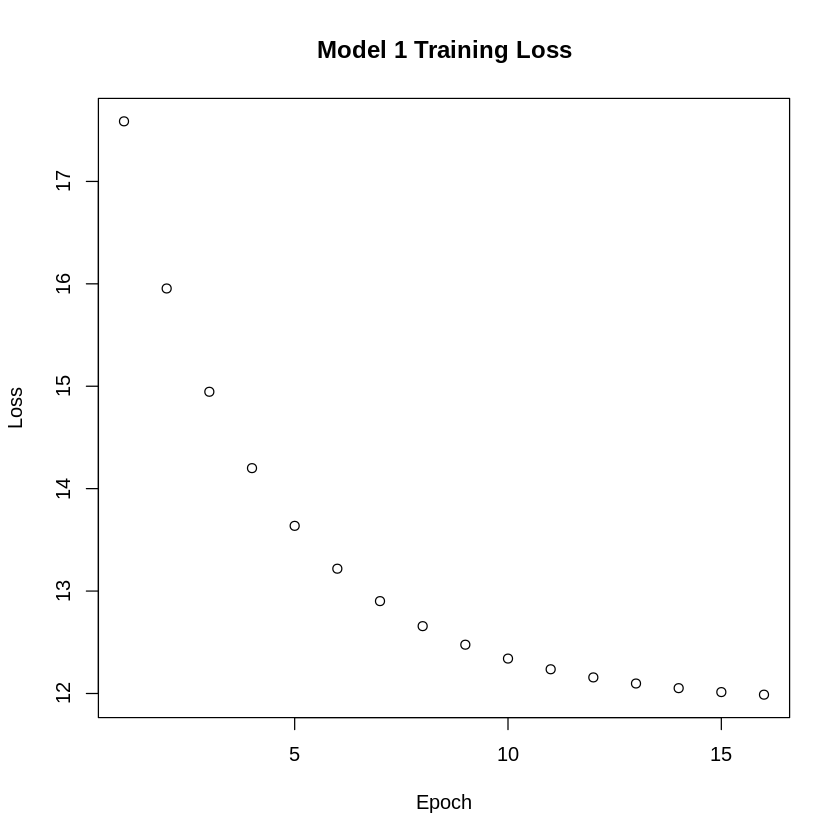

In [ ]:
plot(history_cor,
     main = 'Model 1 Training Loss',
     sub = '',
     xlab = 'Epoch',
     ylab = 'Loss')

In [ ]:
# Get parameter estimates for Model 2
item_param_estimates_cor <- get_item_parameter_estimates(decoder_cor, model_type = 2)
diff_est_cor <- item_param_estimates_cor[[1]]
disc_est_cor <- item_param_estimates_cor[[2]]
test_theta_est_cor <- get_ability_parameter_estimates(encoder_cor, data_test)[[1]]
all_theta_est_cor <- get_ability_parameter_estimates(encoder_cor, data)[[1]]

In [ ]:
disc_true3<-read.csv("/content/corr_q/dis_true3.csv")
diff_true3<-read.csv("/content/corr_q/diff_true3.csv")
theta_true3<-read.csv("/content/corr_q/theta_true3.csv")

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on '/content/corr_q/dis_true3.csv'”


In [ ]:
# Load in true values (included in this pacakge)
disc_true <- as.matrix(disc_true3)
diff_true <- as.matrix(diff_true3)
theta_true<- as.matrix(theta_true3)

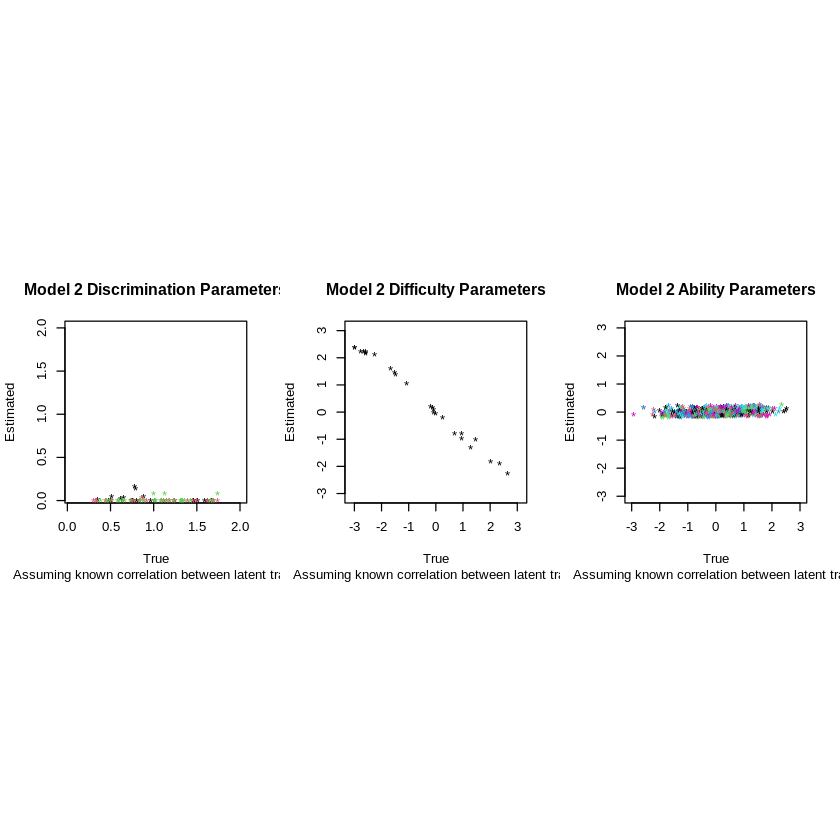

In [ ]:
# par 3 plot 
par(mfrow=c(1,3))

# Examine Model 2 estimates
par(pty="s")
matplot(t(disc_true), t(disc_est_cor), pch = '*',
xlim = c(0.05, 2), ylim = c(0.05, 2),
main = 'Model 2 Discrimination Parameters',
sub = 'Assuming known correlation between latent traits',
xlab = 'True', ylab = 'Estimated')


par(pty="s")
plot(diff_true, diff_est_cor, pch = '*',
xlim = c(-3.1,3.1), ylim = c(-3.1,3.1),
main = 'Model 2 Difficulty Parameters',
sub = 'Assuming known correlation between latent traits',
xlab = 'True', ylab = 'Estimated')


par(pty="s")
matplot(t(theta_true[1600:1800,]), t(all_theta_est_cor[1600:1800,]), pch = '*',
xlim = c(-3,3), ylim = c(-3,3),
main = 'Model 2 Ability Parameters',
sub = 'Assuming known correlation between latent traits',
xlab = 'True', ylab = 'Estimated')

# 6latent traits 40 items 18000 students 

In [ ]:

qqm <- read.csv("/content/corr_q/Q_mat6.csv")
data <- read.csv("/content/corr_q/response6.csv")

In [ ]:

str(qqm)
str(data)

'data.frame':	6 obs. of  40 variables:
 $ V1 : int  1 0 0 0 0 0
 $ V2 : int  0 0 0 0 0 0
 $ V3 : int  0 0 0 0 0 0
 $ V4 : int  0 1 0 0 0 0
 $ V5 : int  0 1 0 0 0 0
 $ V6 : int  0 1 0 0 0 0
 $ V7 : int  0 1 0 0 0 1
 $ V8 : int  0 0 0 0 0 0
 $ V9 : int  0 0 0 0 0 0
 $ V10: int  0 0 0 1 0 0
 $ V11: int  0 0 1 0 0 1
 $ V12: int  0 1 0 0 0 1
 $ V13: int  0 0 0 0 0 0
 $ V14: int  0 0 0 1 1 0
 $ V15: int  1 0 0 0 0 0
 $ V16: int  0 0 0 0 0 0
 $ V17: int  0 1 0 0 0 0
 $ V18: int  0 1 1 0 0 0
 $ V19: int  0 0 0 0 0 1
 $ V20: int  0 0 0 0 0 0
 $ V21: int  0 0 0 1 0 1
 $ V22: int  1 0 1 0 0 0
 $ V23: int  0 0 1 0 0 1
 $ V24: int  0 0 0 1 0 0
 $ V25: int  0 0 0 0 1 0
 $ V26: int  0 0 0 0 0 0
 $ V27: int  0 1 0 0 0 1
 $ V28: int  0 0 0 0 0 0
 $ V29: int  0 0 0 0 0 0
 $ V30: int  0 0 0 1 0 0
 $ V31: int  0 0 0 0 1 0
 $ V32: int  0 0 0 0 1 0
 $ V33: int  0 0 0 0 1 0
 $ V34: int  1 1 1 0 0 0
 $ V35: int  0 0 0 1 0 1
 $ V36: int  0 0 0 0 1 0
 $ V37: int  0 0 0 0 1 0
 $ V38: int  0 0 0 0 1 0
 $ V39: int

In [ ]:
# Load data
data <- as.matrix(data)
Q <- as.matrix(qqm)



In [ ]:
covariance_matrix <-read.csv("/content/corr_q/correlation_matrix_6.csv") 


In [ ]:
head(covariance_matrix)

,V1,V2,V3,V4,V5,V6
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.0000,0.028400,0.498,0.247,0.021500,0.0448
2,0.0284,1.000000,0.450,0.176,0.000473,0.2120
3,0.4980,0.450000,1.000,0.540,0.467000,0.4740
4,0.2470,0.176000,0.540,1.000,0.109000,0.7130
5,0.0215,0.000473,0.467,0.109,1.000000,0.0437
6,0.0448,0.212000,0.474,0.713,0.043700,1.0000


In [ ]:
cov <- as.matrix(covariance_matrix)

In [ ]:
str(data)

 int [1:18000, 1:40] 0 1 1 1 1 1 1 1 1 1 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:40] "V1" "V2" "V3" "V4" ...


In [ ]:
str(data)
str(Q)





 int [1:18000, 1:40] 0 1 1 1 1 1 1 1 1 1 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:40] "V1" "V2" "V3" "V4" ...
 int [1:6, 1:40] 1 0 0 0 0 0 0 0 0 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:40] "V1" "V2" "V3" "V4" ...


In [ ]:
# Model parameters
num_items <- as.double(dim(Q)[2])
num_skills <- as.double(dim(Q)[1])
num_students <- dim(data)[1]
means <- rep(0,num_skills)
enc_arch <- c(64L, 32L)
enc_act <- c('relu', 'tanh')
out_act <- 'sigmoid'
kl <- 1

In [ ]:
install.packages("keras")
library(keras)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Assuming known correlation between latent abilities
models_cor <- build_vae_correlated(num_items,num_skills,
                                          Q,
                                          model_type = 2,
                                          mean_vector = means,
                                          covariance_matrix = cov,
                                          enc_hid_arch = enc_arch,
                                          hid_enc_activations = enc_act,
                                          output_activation = out_act,
                                          kl_weight = kl)
encoder_cor <- models_cor[[1]]
decoder_cor <- models_cor[[2]]
vae_cor <- models_cor[[3]]
encoder_cor
decoder_cor
vae_cor

Warning message in backcompat_fix_rename_lr_to_learning_rate(...):
“the `lr` argument has been renamed to `learning_rate`.”


Model
Model: "model_24"
________________________________________________________________________________
Layer (type)              Output Shape      Param #  Connected to               
input (InputLayer)        [(None, 40)]      0                                   
________________________________________________________________________________
hidden_1 (Dense)          (None, 64)        2624     input[0][0]                
________________________________________________________________________________
hidden_2 (Dense)          (None, 32)        2080     hidden_1[0][0]             
________________________________________________________________________________
z_mean (Dense)            (None, 6)         198      hidden_2[0][0]             
________________________________________________________________________________
z_log_cholesky (Dense)    (None, 21)        693      hidden_2[0][0]             
________________________________________________________________________________
z (C

Model
Model: "model_25"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
latent_inputs (InputLayer)          [(None, 6)]                     0           
________________________________________________________________________________
vae_out (Dense)                     (None, 40)                      280         
Total params: 280
Trainable params: 280
Non-trainable params: 0
________________________________________________________________________________



Model
Model: "model_26"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
input (InputLayer)                  [(None, 40)]                    0           
________________________________________________________________________________
model_24 (Functional)               [(None, 6), (None, 21), (None,  5595        
________________________________________________________________________________
model_25 (Functional)               (None, 40)                      280         
Total params: 5,875
Trainable params: 5,875
Non-trainable params: 0
________________________________________________________________________________



In [ ]:
# Training parameters
num_train <- floor(0.8 * num_students)
num_test <- num_students - num_train
data_train <- data[1:num_train,]
data_test <- data[(num_train+1):num_students,]
num_epochs <- 64
batch_size <- 32

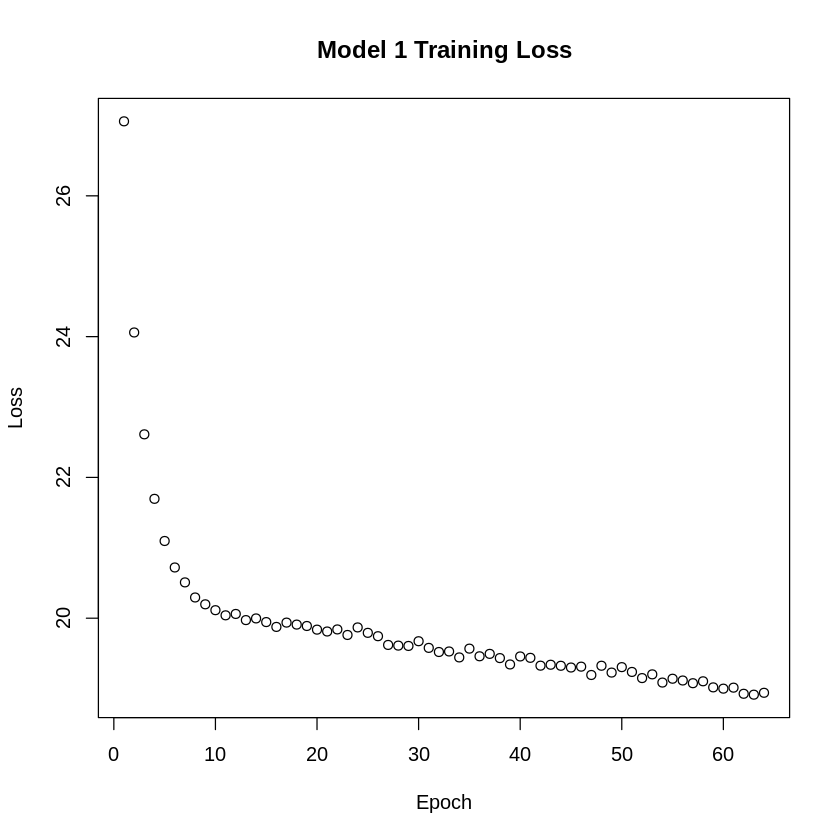

In [ ]:
# Train Model 1
history_cor <- train_model(vae_cor, data_train,
                           num_epochs = num_epochs,
                           batch_size = batch_size,
                           verbose = 1)

plot(history_cor,
     main = 'Model 1 Training Loss',
     sub = '',
     xlab = 'Epoch',
     ylab = 'Loss')

In [ ]:
# Get parameter estimates for Model 2
item_param_estimates_cor <- get_item_parameter_estimates(decoder_cor, model_type = 2)
diff_est_cor <- item_param_estimates_cor[[1]]
disc_est_cor <- item_param_estimates_cor[[2]]
test_theta_est_cor <- get_ability_parameter_estimates(encoder_cor, data_test)[[1]]
all_theta_est_cor <- get_ability_parameter_estimates(encoder_cor, data)[[1]]

In [ ]:
### save results

#write.csv(item_param_estimates_cor,"/content/qmat/item_param_estimates_cor6.csv")
write.csv(diff_est_cor,"/content/corr_q/diff_est_cor6.csv")
write.csv(disc_est_cor,"/content/corr_q/disc_est_cor6.csv")
#write.csv(test_theta_est_cor,"/content/qmat/test_theta_est_cor.csv")
write.csv(all_theta_est_cor,"/content/corr_q/all_theta_est_cor6.csv")


In [ ]:
disc_true6<-read.csv("/content/corr_q/dis_true6.csv")
diff_true6<-read.csv("/content/corr_q/diff_true6.csv")
theta_true6<-read.csv("/content/corr_q/theta_true6.csv")

In [ ]:
# Load in true values (included in this pacakge)
disc_true <- as.matrix(disc_true6)
diff_true <- as.matrix(diff_true6)
theta_true<- as.matrix(theta_true6)

In [ ]:
str(theta_true)
str(all_theta_est_cor)
str(test_theta_est_cor )

 num [1:18000, 1:6] -1.038 -1.1 -0.558 1.121 1.411 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:6] "V1" "V2" "V3" "V4" ...
 num [1:18000, 1:6] -0.3394 0.2189 0.0542 0.1367 0.4686 ...
 num [1:3600, 1:6] -1.151 -0.124 -0.245 0.294 1.085 ...


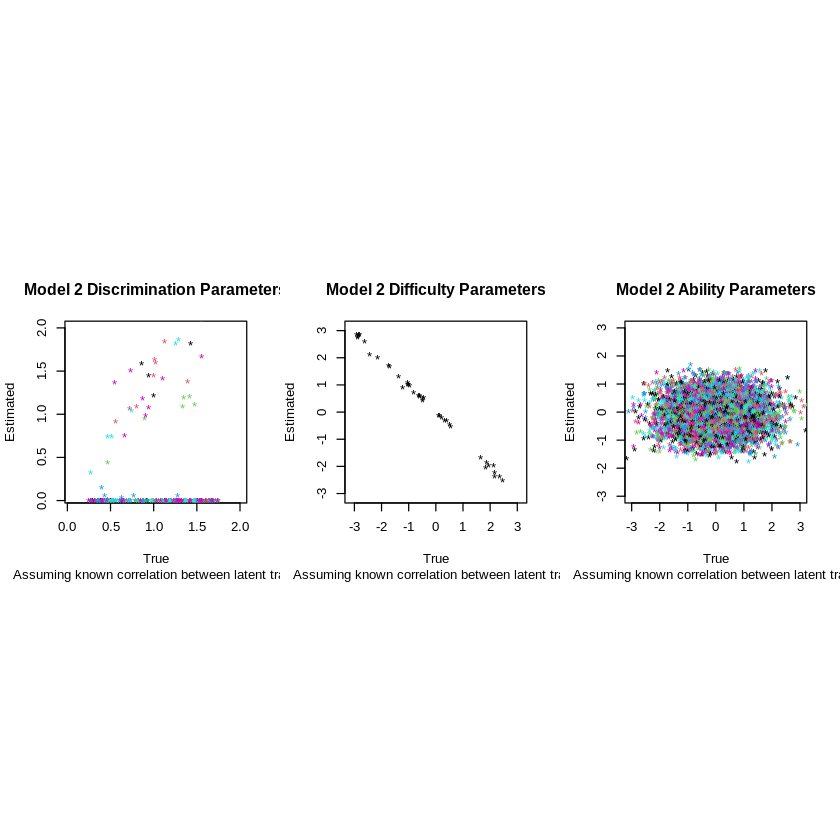

In [ ]:
# Examine Model 2 estimates

par(mfrow=c(1,3))

par(pty="s")
matplot(t(disc_true), t(disc_est_cor), pch = '*',
xlim = c(0.05, 2), ylim = c(0.05, 2),
main = 'Model 2 Discrimination Parameters',
sub = 'Assuming known correlation between latent traits',
xlab = 'True', ylab = 'Estimated')


par(pty="s")
plot(diff_true, diff_est_cor, pch = '*',
xlim = c(-3.1,3.1), ylim = c(-3.1,3.1),
main = 'Model 2 Difficulty Parameters',
sub = 'Assuming known correlation between latent traits',
xlab = 'True', ylab = 'Estimated')


par(pty="s")
matplot(t(theta_true[16000:17000,]), t(all_theta_est_cor[16000:17000,]), pch = '*',
xlim = c(-3,3), ylim = c(-3,3),
main = 'Model 2 Ability Parameters',
sub = 'Assuming known correlation between latent traits',
xlab = 'True', ylab = 'Estimated')

In [ ]:
# Taking two vectors
actual <-disc_true       
predicted<- disc_est_cor    
  
# Calculating RMSE using rmse()         
result = rmse(actual, predicted)
  
# Printing the value
print(result)   



[1] 1.037887


In [ ]:
head(diff_true )
head(diff_est_cor)

V1
-1.0582986
1.8496330
0.3200102
-1.0010867
1.8379831
0.1111645


[1]  0.9986331 -1.8487191 -0.3086042  0.9481128 -1.9347954 -0.1379146

In [ ]:
# Taking two vectors
actual <-diff_true       
predicted<- diff_est_cor    
  
# Calculating RMSE using rmse()         
result = rmse(actual, predicted)
  
# Printing the value
print(result)  

ERROR: ignored

In [ ]:
# Taking two vectors
actual <-theta_true       
predicted<- all_theta_est_cor   
  
# Calculating RMSE using rmse()         
result = rmse(actual, predicted)
  
# Printing the value
print(result)  

[1] 1.21131


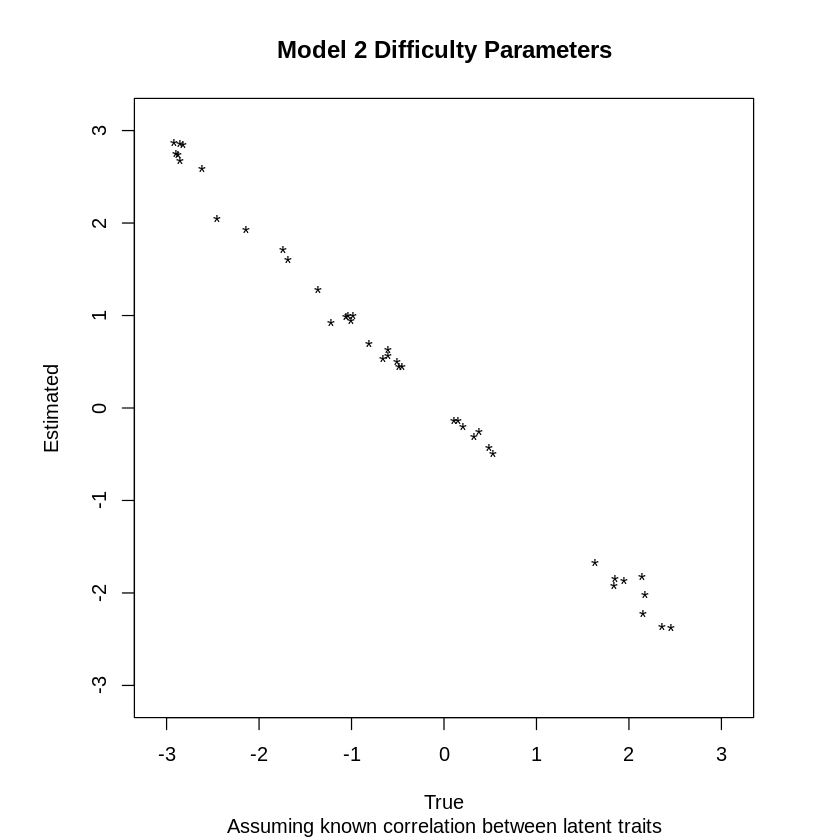

In [ ]:
par(pty="s")
plot(diff_true, diff_est_cor, pch = '*',
xlim = c(-3.1,3.1), ylim = c(-3.1,3.1),
main = 'Model 2 Difficulty Parameters',
sub = 'Assuming known correlation between latent traits',
xlab = 'True', ylab = 'Estimated')

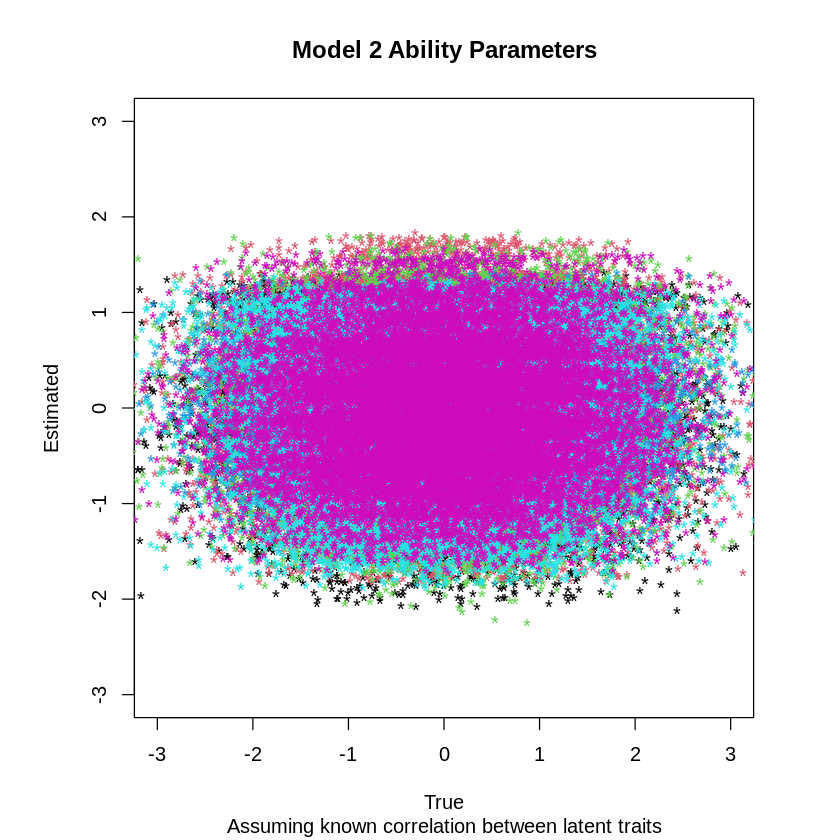

In [ ]:
par(pty="s")
matplot(theta_true, all_theta_est_cor, pch = '*',
xlim = c(-3,3), ylim = c(-3,3),
main = 'Model 2 Ability Parameters',
sub = 'Assuming known correlation between latent traits',
xlab = 'True', ylab = 'Estimated')

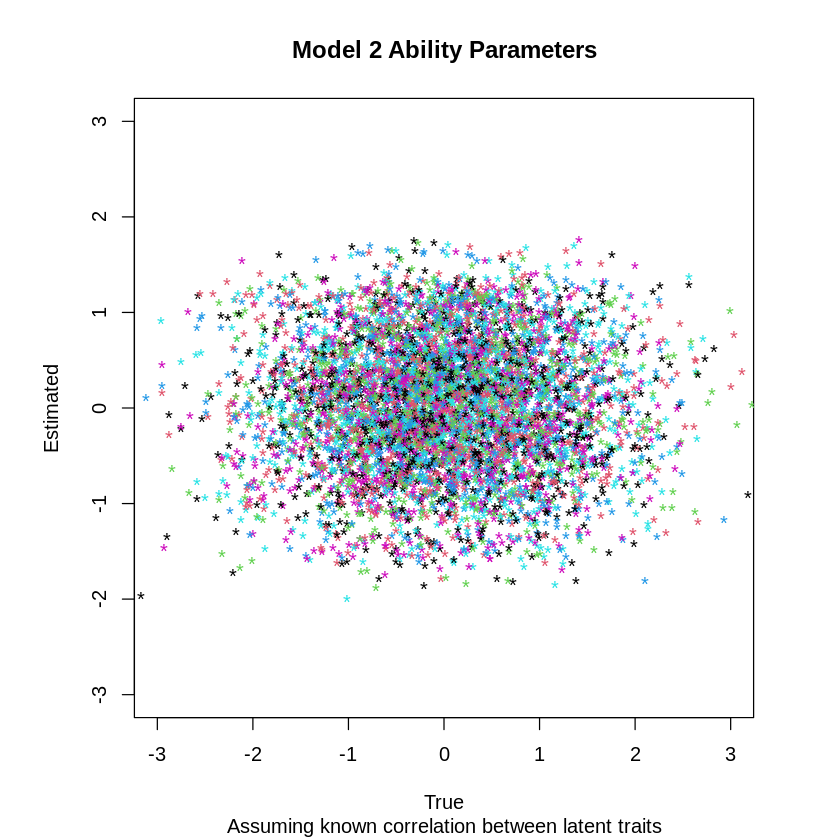

In [ ]:
par(pty="s")
matplot(t(theta_true[16000:17000,]), t(all_theta_est_cor[16000:17000,]), pch = '*',
xlim = c(-3,3), ylim = c(-3,3),
main = 'Model 2 Ability Parameters',
sub = 'Assuming known correlation between latent traits',
xlab = 'True', ylab = 'Estimated')

#20lt, 60000 stdents, 200items 

In [ ]:
qqm <- read.csv("/content/corr_q/Q_mat20.csv")
data <- read.csv("/content/corr_q/response20.csv")

In [ ]:
str(qqm)
str(data)

'data.frame':	20 obs. of  200 variables:
 $ V1  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ V2  : int  0 0 0 0 1 0 1 0 0 0 ...
 $ V3  : int  1 0 0 0 0 1 1 0 0 0 ...
 $ V4  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ V5  : int  0 0 0 1 0 0 0 1 0 0 ...
 $ V6  : int  0 0 0 0 1 0 1 0 0 0 ...
 $ V7  : int  0 0 0 0 0 0 1 0 0 0 ...
 $ V8  : int  0 0 0 1 0 0 1 1 0 0 ...
 $ V9  : int  0 0 0 0 0 0 0 0 0 1 ...
 $ V10 : int  0 0 1 0 0 0 1 0 1 0 ...
 $ V11 : int  0 1 0 0 0 0 0 0 1 0 ...
 $ V12 : int  1 0 1 1 0 0 0 0 1 0 ...
 $ V13 : int  0 0 1 1 1 0 0 1 1 0 ...
 $ V14 : int  0 0 0 0 0 1 1 1 0 0 ...
 $ V15 : int  1 0 1 0 0 0 0 0 0 0 ...
 $ V16 : int  0 0 0 0 0 0 0 0 1 1 ...
 $ V17 : int  1 0 0 0 0 0 0 1 0 0 ...
 $ V18 : int  0 0 0 0 1 0 0 0 0 0 ...
 $ V19 : int  0 1 0 0 0 0 0 0 1 0 ...
 $ V20 : int  1 0 0 0 0 0 0 0 0 0 ...
 $ V21 : int  0 1 0 0 0 0 0 0 0 0 ...
 $ V22 : int  1 1 0 0 1 1 0 1 1 1 ...
 $ V23 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ V24 : int  0 0 0 0 0 1 0 0 0 0 ...
 $ V25 : int  0 0 1 0 0 0 0 0 0 0 ...
 $ V26 : 

In [ ]:
# Load data
data <- as.matrix(data)
Q <- as.matrix(qqm)

In [ ]:
covariance_matrix <-read.csv("/content/corr_q/correlation_matrix_20.csv") 

In [ ]:
cov <- as.matrix(covariance_matrix)

In [ ]:
str(cov)

 num [1:20, 1:20] 1 0.54 0.318 0.476 0.195 0.233 0.245 0.115 0.417 0.222 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:20] "V1" "V2" "V3" "V4" ...


In [ ]:
# Model parameters
num_items <- as.double(dim(Q)[2])
num_skills <- as.double(dim(Q)[1])
num_students <- dim(data)[1]
means <- rep(0,num_skills)
enc_arch <- c(64L, 32L)
enc_act <- c('relu', 'tanh')
out_act <- 'sigmoid'
kl <- 1

In [ ]:
library(keras)

In [ ]:
# Assuming known correlation between latent abilities
models_cor <- build_vae_correlated(num_items,num_skills,
                                          Q,
                                          model_type = 2,
                                          mean_vector = means,
                                          covariance_matrix = cov,
                                          enc_hid_arch = enc_arch,
                                          hid_enc_activations = enc_act,
                                          output_activation = out_act,
                                          kl_weight = kl)
encoder_cor <- models_cor[[1]]
decoder_cor <- models_cor[[2]]
vae_cor <- models_cor[[3]]
encoder_cor
decoder_cor
vae_cor

Warning message in backcompat_fix_rename_lr_to_learning_rate(...):
“the `lr` argument has been renamed to `learning_rate`.”


Model
Model: "model"
________________________________________________________________________________
Layer (type)              Output Shape      Param #  Connected to               
input (InputLayer)        [(None, 200)]     0                                   
________________________________________________________________________________
hidden_1 (Dense)          (None, 64)        12864    input[0][0]                
________________________________________________________________________________
hidden_2 (Dense)          (None, 32)        2080     hidden_1[0][0]             
________________________________________________________________________________
z_mean (Dense)            (None, 20)        660      hidden_2[0][0]             
________________________________________________________________________________
z_log_cholesky (Dense)    (None, 210)       6930     hidden_2[0][0]             
________________________________________________________________________________
z (Conc

Model
Model: "model_1"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
latent_inputs (InputLayer)          [(None, 20)]                    0           
________________________________________________________________________________
vae_out (Dense)                     (None, 200)                     4200        
Total params: 4,200
Trainable params: 4,200
Non-trainable params: 0
________________________________________________________________________________



Model
Model: "model_2"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
input (InputLayer)                  [(None, 200)]                   0           
________________________________________________________________________________
model (Functional)                  [(None, 20), (None, 210), (None 22534       
________________________________________________________________________________
model_1 (Functional)                (None, 200)                     4200        
Total params: 26,734
Trainable params: 26,734
Non-trainable params: 0
________________________________________________________________________________



In [ ]:
# Training parameters
num_train <- floor(0.8 * num_students)
num_test <- num_students - num_train
data_train <- data[1:num_train,]
data_test <- data[(num_train+1):num_students,]
num_epochs <- 64
batch_size <- 32

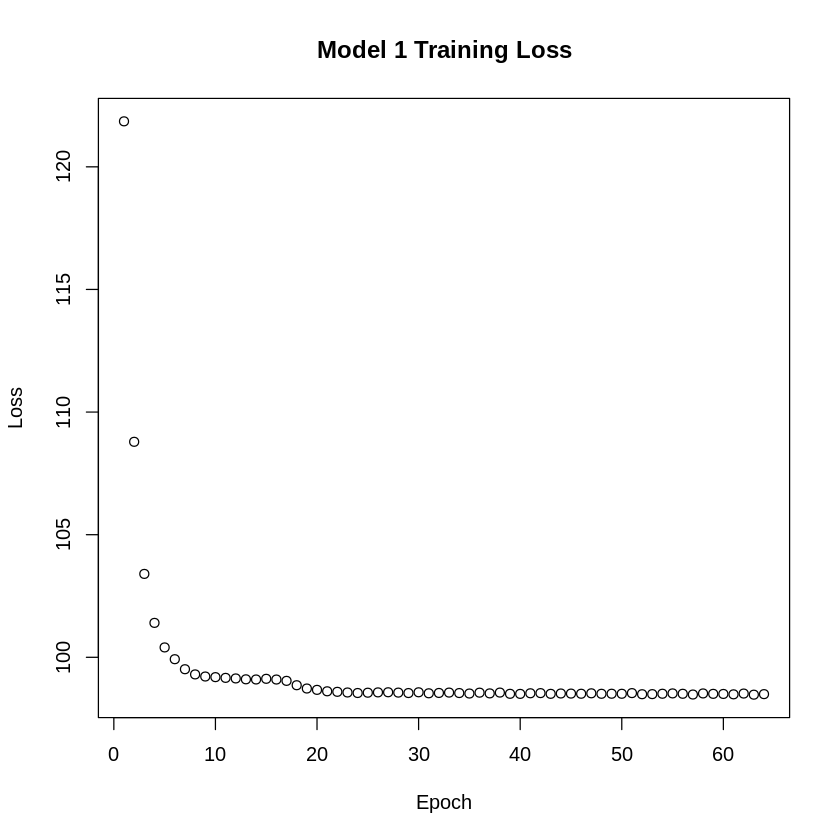

In [ ]:
# Train Model 1
history_cor <- train_model(vae_cor, data_train,
                           num_epochs = num_epochs,
                           batch_size = batch_size,
                           verbose = 1)

plot(history_cor,
     main = 'Model 1 Training Loss',
     sub = '',
     xlab = 'Epoch',
     ylab = 'Loss')

In [ ]:
# Get parameter estimates for Model 2
item_param_estimates_cor <- get_item_parameter_estimates(decoder_cor, model_type = 2)
diff_est_cor <- item_param_estimates_cor[[1]]
disc_est_cor <- item_param_estimates_cor[[2]]
test_theta_est_cor <- get_ability_parameter_estimates(encoder_cor, data_test)[[1]]
all_theta_est_cor <- get_ability_parameter_estimates(encoder_cor, data)[[1]]

In [ ]:
disc_true20<-read.csv("/content/corr_q/dis_true20.csv")
diff_true20<-read.csv("/content/corr_q/diff_true20.csv")
theta_true20<-read.csv("/content/corr_q/theta_true20.csv")

In [ ]:
# Load in true values (included in this pacakge)
disc_true <- as.matrix(disc_true20)
diff_true <- as.matrix(diff_true20)
theta_true<- as.matrix(theta_true20)

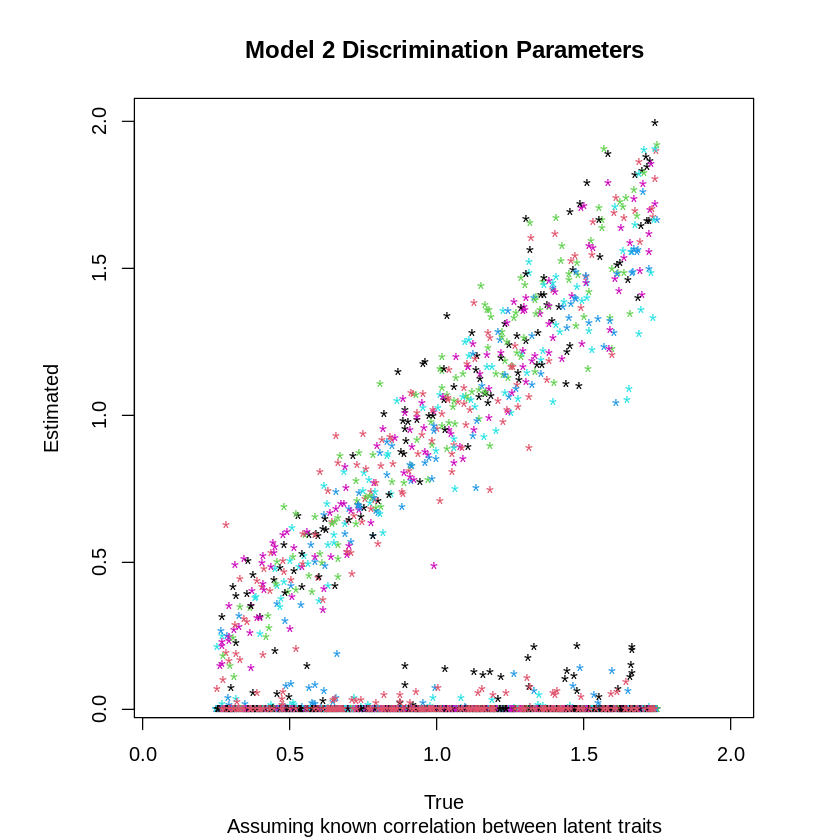

In [ ]:
# Examine Model 2 estimates
par(pty="s")
matplot(t(disc_true), t(disc_est_cor), pch = '*',
xlim = c(0.05, 2), ylim = c(0.05, 2),
main = 'Model 2 Discrimination Parameters',
sub = 'Assuming known correlation between latent traits',
xlab = 'True', ylab = 'Estimated')

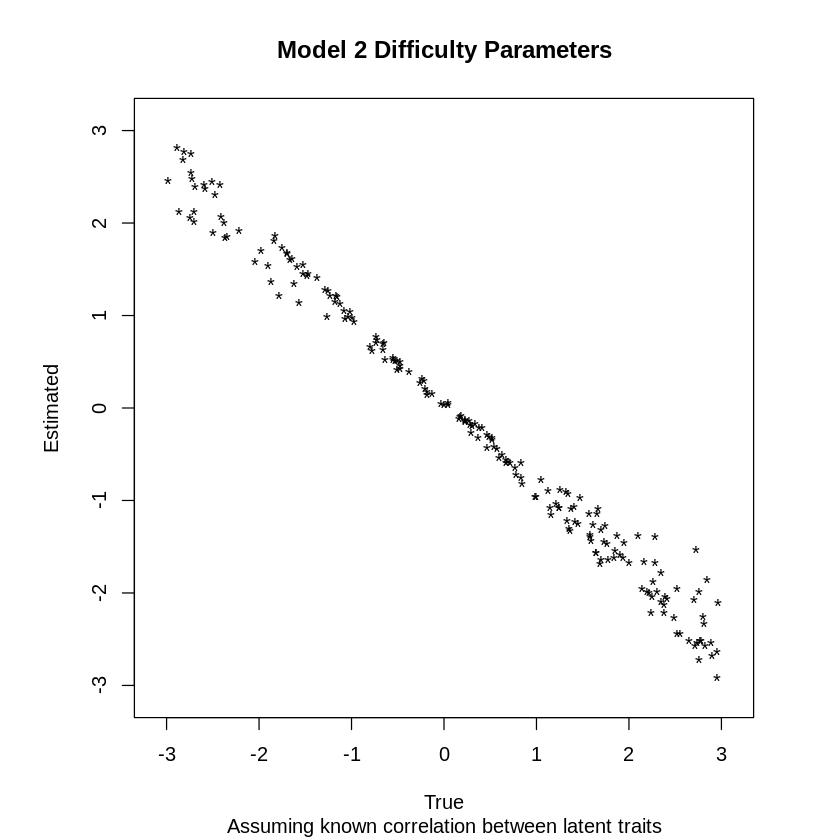

In [ ]:
par(pty="s")
plot(diff_true, diff_est_cor, pch = '*',
xlim = c(-3.1,3.1), ylim = c(-3.1,3.1),
main = 'Model 2 Difficulty Parameters',
sub = 'Assuming known correlation between latent traits',
xlab = 'True', ylab = 'Estimated')

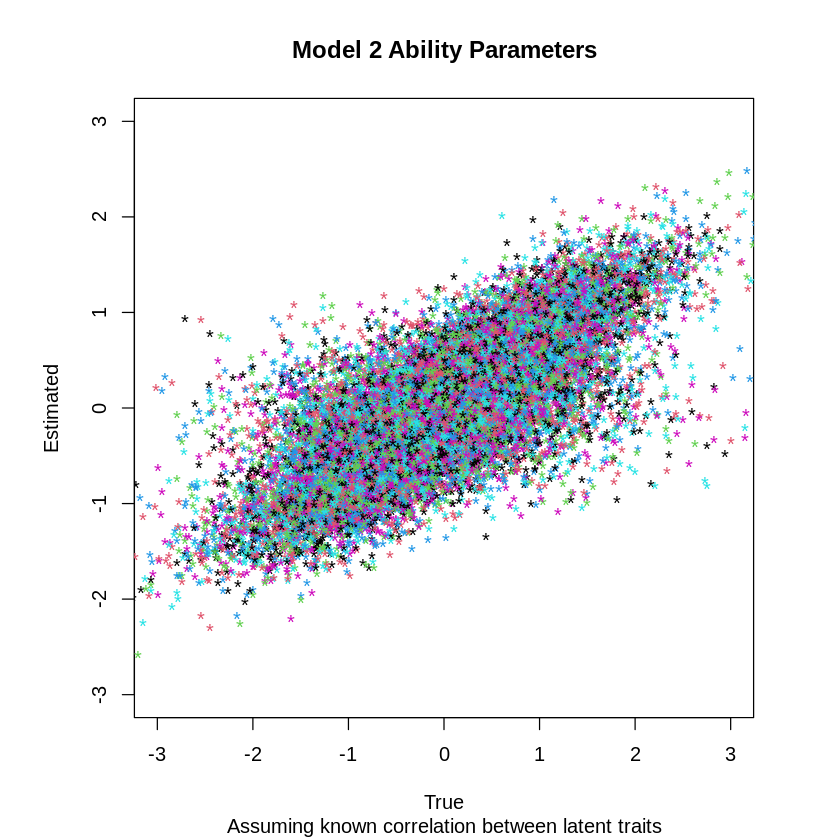

In [ ]:
par(pty="s")
matplot(t(theta_true[56000:57000,]), t(all_theta_est_cor[56000:57000,]), pch = '*',
xlim = c(-3,3), ylim = c(-3,3),
main = 'Model 2 Ability Parameters',
sub = 'Assuming known correlation between latent traits',
xlab = 'True', ylab = 'Estimated')

# real data 3 lt 3000 students 26 items 

In [ ]:
qqm <- read.csv("/content/corr_q/Q_mat3.csv")
data <- read.csv("/content/corr_q/response3.csv")

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on '/content/corr_q/Q_mat3.csv'”


In [ ]:
# Load data
data <- as.matrix(data)
Q <- as.matrix(qqm)

In [ ]:
# Model parameters
num_items <- as.double(dim(Q)[2])
num_skills <- as.double(dim(Q)[1])
num_students <- dim(data)[1]
means <- rep(0,num_skills)
enc_arch <- c(16L, 8L)
enc_act <- c('relu', 'tanh')
out_act <- 'sigmoid'
kl <- 1


In [ ]:
#Model 1: An ML2P-VAE model assuming latent traits are independent

models_ind <- build_vae_independent(num_items, num_skills,
                                    Q,
                                    model_type = 2,
                                    enc_hid_arch = enc_arch,
                                    hid_enc_activation = enc_act,
                                    output_activation = out_act)
encoder_ind <- models_ind[[1]]
decoder_ind <- models_ind[[2]]
vae_ind <- models_ind[[3]]
encoder_ind
decoder_ind
vae_ind

Warning message in backcompat_fix_rename_lr_to_learning_rate(...):
“the `lr` argument has been renamed to `learning_rate`.”


Model
Model: "model"
________________________________________________________________________________
Layer (type)              Output Shape      Param #  Connected to               
input (InputLayer)        [(None, 26)]      0                                   
________________________________________________________________________________
hidden_1 (Dense)          (None, 16)        432      input[0][0]                
________________________________________________________________________________
hidden_2 (Dense)          (None, 8)         136      hidden_1[0][0]             
________________________________________________________________________________
z_mean (Dense)            (None, 3)         27       hidden_2[0][0]             
________________________________________________________________________________
z_log_var (Dense)         (None, 3)         27       hidden_2[0][0]             
________________________________________________________________________________
z (Conc

Model
Model: "model_1"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
latent_inputs (InputLayer)          [(None, 3)]                     0           
________________________________________________________________________________
vae_out (Dense)                     (None, 26)                      104         
Total params: 104
Trainable params: 104
Non-trainable params: 0
________________________________________________________________________________



Model
Model: "model_2"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
input (InputLayer)                  [(None, 26)]                    0           
________________________________________________________________________________
model (Functional)                  [(None, 3), (None, 3), (None, 3 622         
________________________________________________________________________________
model_1 (Functional)                (None, 26)                      104         
Total params: 726
Trainable params: 726
Non-trainable params: 0
________________________________________________________________________________



In [ ]:
# Training parameters
num_train <- floor(0.8 * num_students)
num_test <- num_students - num_train
data_train <- data[1:num_train,]
data_test <- data[(num_train+1):num_students,]
num_epochs <- 30
batch_size <- 16


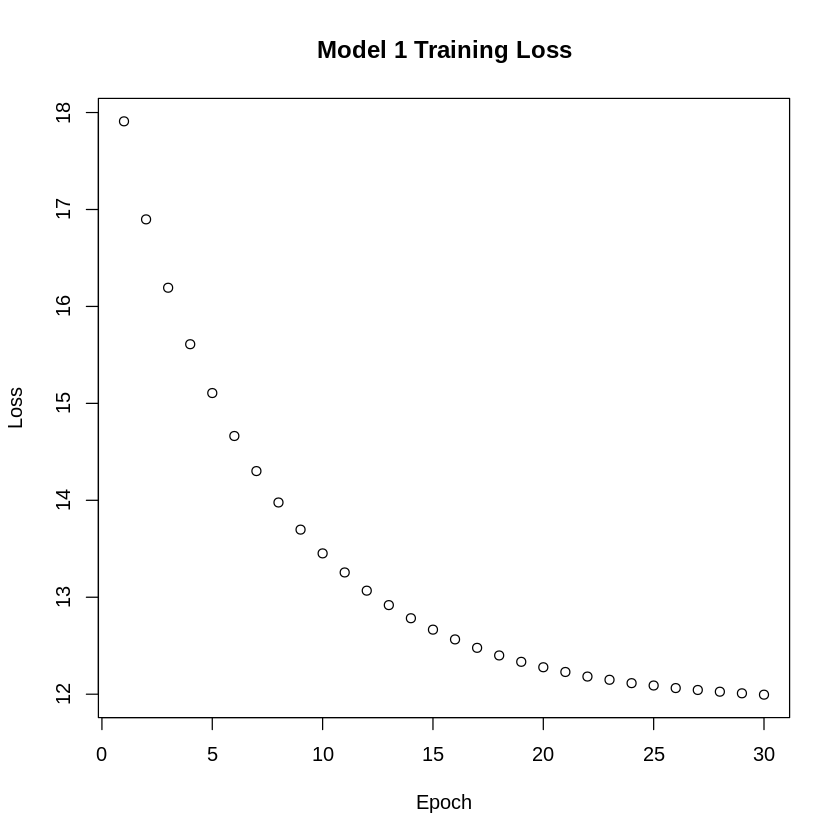

In [ ]:
# Train Model 1
history_ind <- train_model(vae_ind, data_train,
                           num_epochs = num_epochs,
                           batch_size = batch_size,
                           verbose = 1)

plot(history_ind,
     main = 'Model 1 Training Loss',
     sub = '',
     xlab = 'Epoch',
     ylab = 'Loss')

In [ ]:
# Get parameter estimates for Model 1
item_param_estimates_ind<- get_item_parameter_estimates(decoder_ind, model_type = 2)
diff_est_ind <- item_param_estimates_ind[[1]]
disc_est_ind <- item_param_estimates_ind[[2]]
test_theta_est_ind <- get_ability_parameter_estimates(encoder_ind, data_test)[[1]]
all_theta_est_ind <- get_ability_parameter_estimates(encoder_ind, data)[[1]]

In [ ]:
disc_true3<-read.csv("/content/corr_q/dis_true3.csv")
diff_true3<-read.csv("/content/corr_q/diff_true3.csv")
theta_true3<-read.csv("/content/corr_q/theta_true3.csv")

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on '/content/corr_q/dis_true3.csv'”


In [ ]:
# Load in true values (included in this pacakge)
disc_true <- as.matrix(disc_true3)
diff_true <- as.matrix(diff_true3) 
theta_true<- as.matrix(theta_true3)


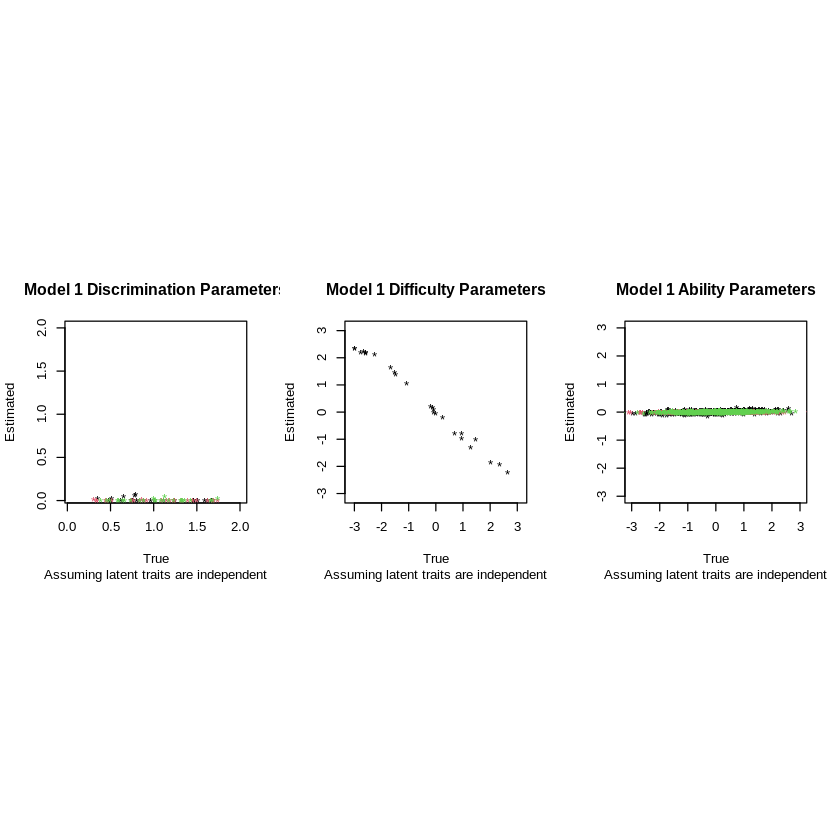

In [ ]:
par(mfrow=c(1,3))


# Examine Model 1 estimates
par(pty="s")
matplot(t(disc_true), t(disc_est_ind), pch = '*',
        xlim = c(0.05,2), ylim = c(0.05,2),
        main = 'Model 1 Discrimination Parameters',
        sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')



# Discrimination Parameters

par(pty="s")
plot(diff_true, diff_est_ind, pch = '*',
     xlim = c(-3.1,3.1), ylim = c(-3.1,3.1),
     main = 'Model 1 Difficulty Parameters',
     sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')


# Ability Parameters
par(pty="s")
matplot(theta_true[2200:2800,],
        all_theta_est_ind[2200:2800,], pch = '*',
        xlim = c(-3,3), ylim = c(-3,3),
        main = 'Model 1 Ability Parameters',
        sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')

#6 latent traits, 40 items, and 18,000 students;

In [ ]:
qqm <- read.csv("/content/corr_q/Q_mat6.csv")
data <- read.csv("/content/corr_q/response6.csv")

In [ ]:
# Load data
data <- as.matrix(data)
Q <- as.matrix(qqm)

In [ ]:
# Model parameters
num_items <- as.double(dim(Q)[2])
num_skills <- as.double(dim(Q)[1])
num_students <- dim(data)[1]
means <- rep(0,num_skills)
enc_arch <- c(32L, 16L)
enc_act <- c('relu', 'tanh')
out_act <- 'sigmoid'
kl <- 1

In [ ]:
#Model 1: An ML2P-VAE model assuming latent traits are independent

models_ind <- build_vae_independent(num_items, num_skills,
                                    Q,
                                    model_type = 2,
                                    enc_hid_arch = enc_arch,
                                    hid_enc_activation = enc_act,
                                    output_activation = out_act)
encoder_ind <- models_ind[[1]]
decoder_ind <- models_ind[[2]]
vae_ind <- models_ind[[3]]
encoder_ind
decoder_ind
vae_ind

Warning message in backcompat_fix_rename_lr_to_learning_rate(...):
“the `lr` argument has been renamed to `learning_rate`.”


Model
Model: "model"
________________________________________________________________________________
Layer (type)              Output Shape      Param #  Connected to               
input (InputLayer)        [(None, 40)]      0                                   
________________________________________________________________________________
hidden_1 (Dense)          (None, 32)        1312     input[0][0]                
________________________________________________________________________________
hidden_2 (Dense)          (None, 16)        528      hidden_1[0][0]             
________________________________________________________________________________
z_mean (Dense)            (None, 6)         102      hidden_2[0][0]             
________________________________________________________________________________
z_log_var (Dense)         (None, 6)         102      hidden_2[0][0]             
________________________________________________________________________________
z (Conc

Model
Model: "model_1"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
latent_inputs (InputLayer)          [(None, 6)]                     0           
________________________________________________________________________________
vae_out (Dense)                     (None, 40)                      280         
Total params: 280
Trainable params: 280
Non-trainable params: 0
________________________________________________________________________________



Model
Model: "model_2"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
input (InputLayer)                  [(None, 40)]                    0           
________________________________________________________________________________
model (Functional)                  [(None, 6), (None, 6), (None, 6 2044        
________________________________________________________________________________
model_1 (Functional)                (None, 40)                      280         
Total params: 2,324
Trainable params: 2,324
Non-trainable params: 0
________________________________________________________________________________



In [ ]:
# Training parameters
num_train <- floor(0.8 * num_students)
num_test <- num_students - num_train
data_train <- data[1:num_train,]
data_test <- data[(num_train+1):num_students,]
num_epochs <- 32
batch_size <- 16


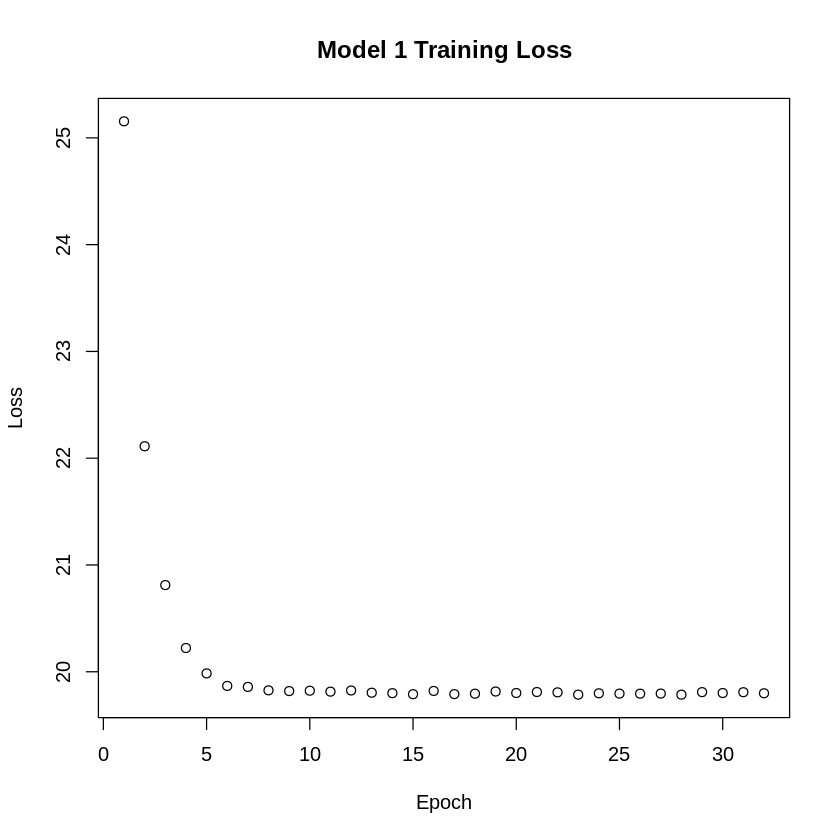

In [ ]:
# Train Model 1
history_ind <- train_model(vae_ind, data_train,
                           num_epochs = num_epochs,
                           batch_size = batch_size,
                           verbose = 1)

plot(history_ind,
     main = 'Model 1 Training Loss',
     sub = '',
     xlab = 'Epoch',
     ylab = 'Loss')


In [ ]:
# Get parameter estimates for Model 1
item_param_estimates_ind<- get_item_parameter_estimates(decoder_ind, model_type = 2)
diff_est_ind <- item_param_estimates_ind[[1]]
disc_est_ind <- item_param_estimates_ind[[2]]
test_theta_est_ind <- get_ability_parameter_estimates(encoder_ind, data_test)[[1]]
all_theta_est_ind <- get_ability_parameter_estimates(encoder_ind, data)[[1]]

In [ ]:
disc_true6<-read.csv("/content/corr_q/dis_true6.csv")
diff_true6<-read.csv("/content/corr_q/diff_true6.csv")
theta_true6<-read.csv("/content/corr_q/theta_true6.csv")

# Load in true values (included in this pacakge)
disc_true <- as.matrix(disc_true6)
diff_true <- as.matrix(diff_true6) 
theta_true<- as.matrix(theta_true6)

Warning message in file(file, "rt"):
“cannot open file '/content/corr_q/dis_true6.csv': No such file or directory”


ERROR: ignored

In [ ]:
head(disc_true)
head(disc_est_ind)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40
0.9350977,0.2898655,0.9335385,1.4144122,1.1796539,0.8196340,0.7856046,0.2881226,0.3480919,0.5633650,⋯,0.6390099,1.1707367,0.4253718,0.8622884,0.3877777,1.6367717,0.2927383,1.5711875,1.5786858,0.4353841
0.7184430,0.8696178,1.5358590,1.0135741,1.1255017,1.5443299,0.7196364,1.6582575,0.6592603,1.7401945,⋯,1.6092112,1.0570986,1.5691391,0.5594332,1.6315780,0.9991193,0.6881431,1.2790558,1.4778423,1.0832725
0.5262531,1.4713397,0.9341235,1.1537210,1.4820051,0.8794929,0.4804211,1.6028641,1.2902919,0.3654848,⋯,1.0760545,0.8715270,1.4964658,0.4628565,1.2483395,1.4862811,1.3560874,0.4877615,1.3428822,1.6427601
1.2612469,0.4039434,0.5307388,0.4683352,1.2555589,0.7337524,1.3232660,0.2735039,0.8139893,1.2777508,⋯,0.6026200,1.4847751,0.3575469,0.4872191,0.3923956,1.6697916,0.7093095,0.9313220,0.4601335,0.8873753
1.5137317,1.3572847,0.9705594,1.5216131,0.4855601,0.5797608,1.0989149,1.0300383,1.1931275,0.7193453,⋯,1.2493158,0.4642695,1.7138834,1.5289217,0.8101245,1.5516964,0.7457559,0.5156222,1.5576073,0.2693438
1.5097308,1.6671502,1.1489597,1.5561929,1.3173560,1.5973518,0.6632369,0.2663923,0.4534711,1.2834153,⋯,1.1331500,0.4026412,1.5539102,1.3194562,1.5520912,1.0366464,1.5433242,1.4164703,0.3909387,1.2989373


0.001282799,0,0,0.0000000,0.000000,0.000000,0.000000000,0,0,0.0000000,⋯,0.000000,0.0000000,0.000000,0.0128971,0.00000000,0.000000,0.0000000,0.0000000,0.01362382,0.0000000
0.000000000,0,0,0.9782739,1.120853,1.367059,0.811239421,0,0,0.0000000,⋯,0.000000,0.0000000,0.000000,0.4310716,0.00000000,0.000000,0.0000000,0.0000000,0.00000000,0.0000000
0.000000000,0,0,0.0000000,0.000000,0.000000,0.000000000,0,0,0.0000000,⋯,0.000000,0.0000000,0.000000,0.6004767,0.00000000,0.000000,0.0000000,0.0000000,1.27116191,0.0000000
0.000000000,0,0,0.0000000,0.000000,0.000000,0.000000000,0,0,0.5400761,⋯,0.000000,0.0000000,0.000000,0.0000000,0.47964838,0.000000,0.0000000,0.0000000,0.00000000,0.0000000
0.000000000,0,0,0.0000000,0.000000,0.000000,0.000000000,0,0,0.0000000,⋯,1.177779,0.4502399,1.552499,0.0000000,0.00000000,1.433816,0.7331689,0.5345209,0.00000000,0.2119123
0.000000000,0,0,0.0000000,0.000000,0.000000,0.009171295,0,0,0.0000000,⋯,0.000000,0.0000000,0.000000,0.0000000,0.01286333,0.000000,0.0000000,0.0000000,0.00000000,0.0000000


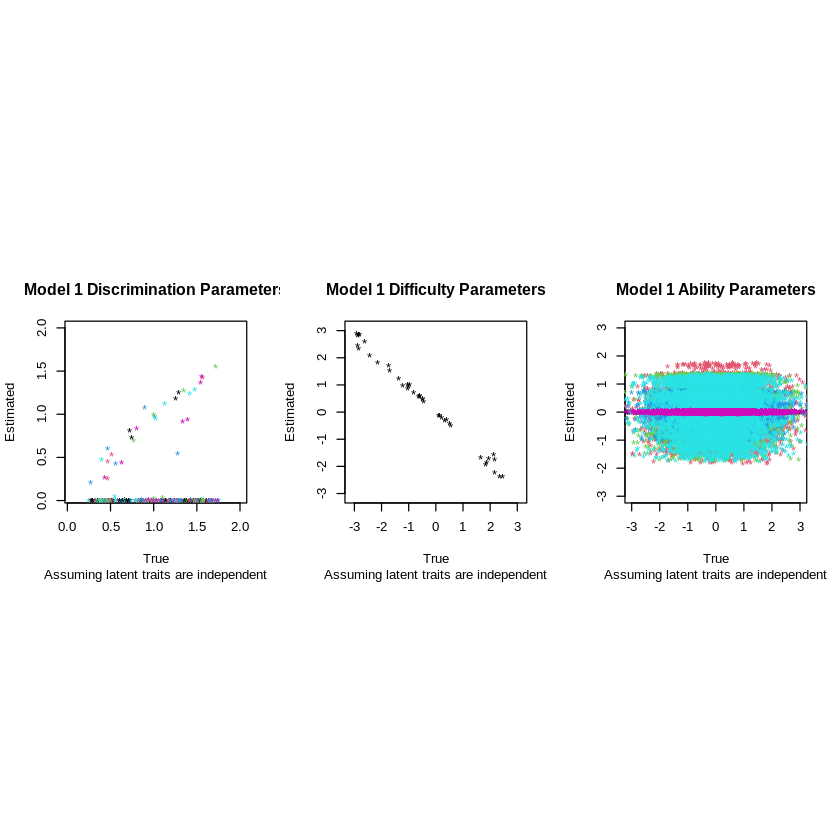

In [ ]:
par(mfrow=c(1,3))


# Examine Model 1 estimates
par(pty="s")
matplot(disc_true, disc_est_ind, pch = '*',
        xlim = c(0.05,2), ylim = c(0.05,2),
        main = 'Model 1 Discrimination Parameters',
        sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')



# Discrimination Parameters

par(pty="s")
plot(diff_true, diff_est_ind, pch = '*',
     xlim = c(-3.1,3.1), ylim = c(-3.1,3.1),
     main = 'Model 1 Difficulty Parameters',
     sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')


# Ability Parameters
par(pty="s")
matplot(theta_true[12000:18000,],
        all_theta_est_ind[12000:18000,], pch = '*',
        xlim = c(-3,3), ylim = c(-3,3),
        main = 'Model 1 Ability Parameters',
        sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')

# RMSE and Corr test 

In [ ]:
install.packages("Metrics")
library(Metrics)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Importing the required package
library(Metrics)
  
# Taking two vectors
actual <-disc_true       
predicted<- disc_est_ind     
  
# Calculating RMSE using rmse()         
result = rmse(actual, predicted)
  
# Printing the value
print(result)   

[1] 1.054924


In [ ]:
# Taking two vectors
actual <- diff_true       
predicted<- diff_est_ind    
  
# Calculating RMSE using rmse()         
result = rmse(actual, predicted)
  
# Printing the value
print(result)  

ERROR: ignored

In [ ]:
cor.test(actual, predicted, method="pearson" )


	Pearson's product-moment correlation

data:  actual and predicted
t = 1.4171, df = 238, p-value = 0.1577
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.03556739  0.21560696
sample estimates:
       cor 
0.09147452 


#20 latent traits, 200 items, and 60,000 students;

In [ ]:
qqm <- read.csv("/corr_q/Q_mat20.csv")
data <- read.csv("/corr_q/response20.csv")


# Load data
data <- as.matrix(data)
Q <- as.matrix(qqm)


In [ ]:
# Model parameters
num_items <- as.double(dim(Q)[2])
num_skills <- as.double(dim(Q)[1])
num_students <- dim(data)[1]
means <- rep(0,num_skills)
enc_arch <- c(64L, 32L)
enc_act <- c('relu', 'tanh')
out_act <- 'sigmoid'
kl <- 1


In [ ]:
#Model 1: An ML2P-VAE model assuming latent traits are independent

models_ind <- build_vae_independent(num_items, num_skills,
                                    Q,
                                    model_type = 2,
                                    enc_hid_arch = enc_arch,
                                    hid_enc_activation = enc_act,
                                    output_activation = out_act)
encoder_ind <- models_ind[[1]]
decoder_ind <- models_ind[[2]]
vae_ind <- models_ind[[3]]
encoder_ind
decoder_ind
vae_ind


Warning message in backcompat_fix_rename_lr_to_learning_rate(...):
“the `lr` argument has been renamed to `learning_rate`.”


Model
Model: "model"
________________________________________________________________________________
Layer (type)              Output Shape      Param #  Connected to               
input (InputLayer)        [(None, 200)]     0                                   
________________________________________________________________________________
hidden_1 (Dense)          (None, 64)        12864    input[0][0]                
________________________________________________________________________________
hidden_2 (Dense)          (None, 32)        2080     hidden_1[0][0]             
________________________________________________________________________________
z_mean (Dense)            (None, 20)        660      hidden_2[0][0]             
________________________________________________________________________________
z_log_var (Dense)         (None, 20)        660      hidden_2[0][0]             
________________________________________________________________________________
z (Conc

Model
Model: "model_1"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
latent_inputs (InputLayer)          [(None, 20)]                    0           
________________________________________________________________________________
vae_out (Dense)                     (None, 200)                     4200        
Total params: 4,200
Trainable params: 4,200
Non-trainable params: 0
________________________________________________________________________________



Model
Model: "model_2"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
input (InputLayer)                  [(None, 200)]                   0           
________________________________________________________________________________
model (Functional)                  [(None, 20), (None, 20), (None, 16264       
________________________________________________________________________________
model_1 (Functional)                (None, 200)                     4200        
Total params: 20,464
Trainable params: 20,464
Non-trainable params: 0
________________________________________________________________________________



In [ ]:

# Training parameters
num_train <- floor(0.8 * num_students)
num_test <- num_students - num_train
data_train <- data[1:num_train,]
data_test <- data[(num_train+1):num_students,]
num_epochs <- 64
batch_size <- 32

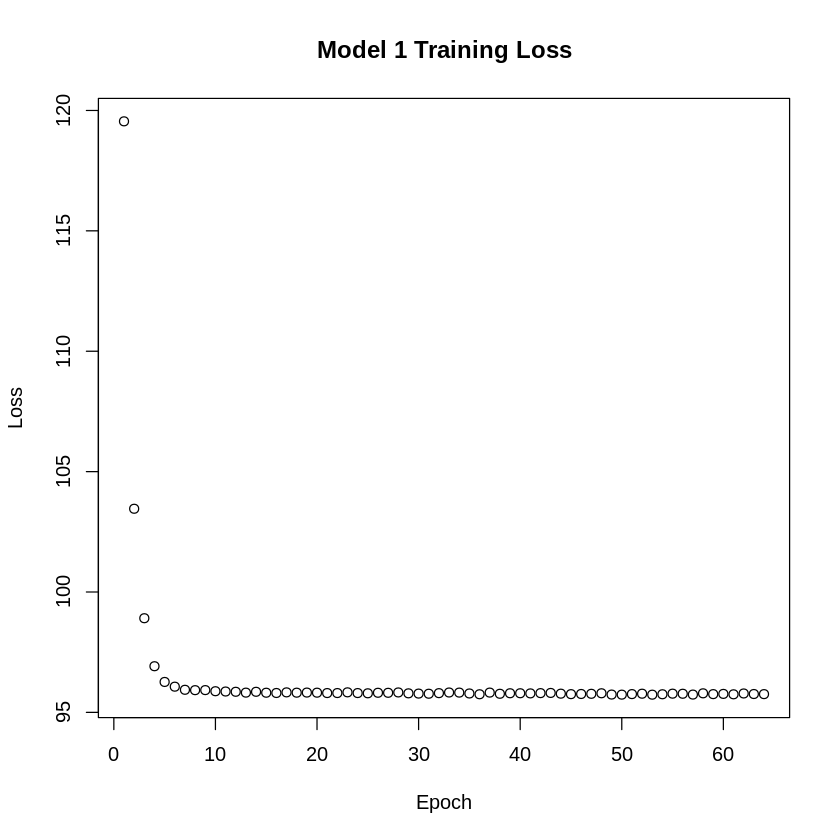

In [ ]:
# Train Model 1
history_ind <- train_model(vae_ind, data_train,
                           num_epochs = num_epochs,
                           batch_size = batch_size,
                           verbose = 1)

plot(history_ind,
     main = 'Model 1 Training Loss',
     sub = '',
     xlab = 'Epoch',
     ylab = 'Loss')


In [ ]:
# Get parameter estimates for Model 1
item_param_estimates_ind<- get_item_parameter_estimates(decoder_ind, model_type = 2)
diff_est_ind <- item_param_estimates_ind[[1]]
disc_est_ind <- item_param_estimates_ind[[2]]
test_theta_est_ind <- get_ability_parameter_estimates(encoder_ind, data_test)[[1]]
all_theta_est_ind <- get_ability_parameter_estimates(encoder_ind, data)[[1]]

In [ ]:
disc_true20<-read.csv("/corr_q/dis_true20.csv")
diff_true20<-read.csv("/corr_q/diff_true20.csv")
theta_true20<-read.csv("/corr_q/theta_true20.csv")

# Load in true values (included in this pacakge)
disc_true <- as.matrix(disc_true20)
diff_true <- as.matrix(diff_true20) 
theta_true<- as.matrix(theta_true20)

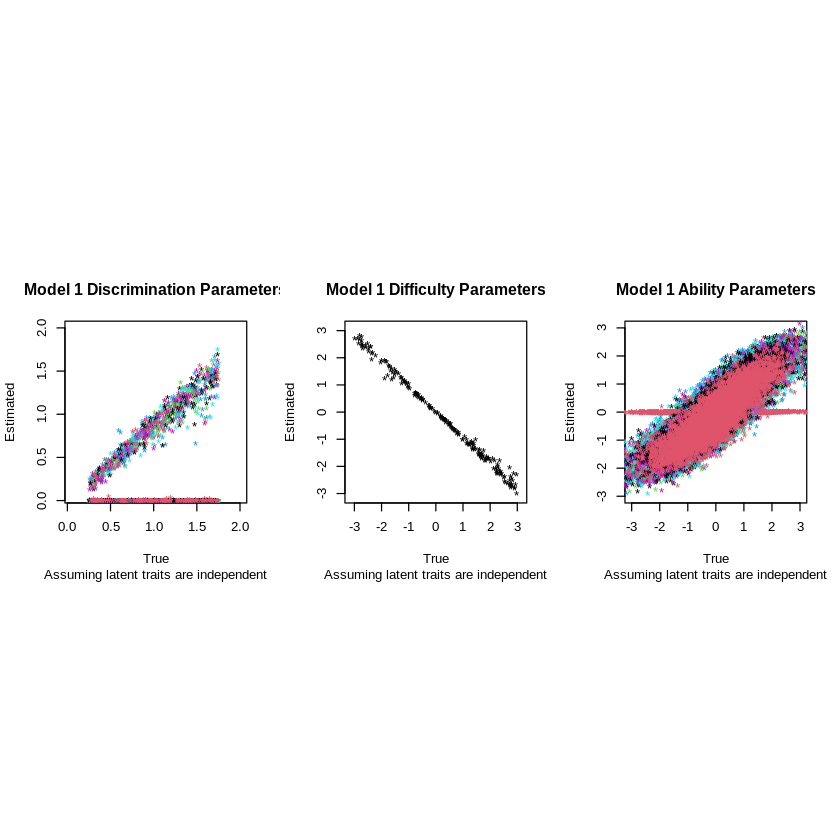

In [ ]:
par(mfrow=c(1,3))

# Examine Model 1 estimates
par(pty="s")
matplot(t(disc_true), t(disc_est_ind), pch = '*',
        xlim = c(0.05,2), ylim = c(0.05,2),
        main = 'Model 1 Discrimination Parameters',
        sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')



# Discrimination Parameters

par(pty="s")
plot(diff_true, diff_est_ind, pch = '*',
     xlim = c(-3.1,3.1), ylim = c(-3.1,3.1),
     main = 'Model 1 Difficulty Parameters',
     sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')


# Ability Parameters
par(pty="s")
matplot(theta_true[52000:58000,],
        all_theta_est_ind[52000:58000,], pch = '*',
        xlim = c(-3,3), ylim = c(-3,3),
        main = 'Model 1 Ability Parameters',
        sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')

In [ ]:
# Taking two vectors
actual <-disc_true       
predicted<- disc_est_ind    
  
# Calculating RMSE using rmse()         
result = rmse(actual, predicted)
  
# Printing the value
print(result)  

[1] 0.9808835


In [ ]:
# Taking two vectors
actual <-disc_true       
predicted<- disc_est_ind    
  
# Calculating RMSE using rmse()         
result = rmse(actual, predicted)
  
# Printing the value
print(result)  

In [ ]:
# Taking two vectors
actual <- diff_true       
predicted<- diff_est_ind    
  
# Calculating RMSE using rmse()         
result = rmse(actual, predicted)
  
# Printing the value
print(result)  

ERROR: ignored

In [ ]:
# Taking two vectors
actual <-theta_true       
predicted<- all_theta_est_ind    
  
# Calculating RMSE using rmse()         
result = rmse(actual, predicted)
  
# Printing the value
print(result)  

[1] 0.5132342


"most of the "latent abilities" in this Q-matrix are currently defined by the linguistic properties of the item"(six key properties of language have been described by linguists. These six features are arbitrariness, cultural transmission, discreteness, displacement, duality, and productivity). is it possible to get set of q-matrix with following sample sizes and latent abilities? # of students higher is better for VAE model 

* (i) 6 latent traits, 50 items, and 20,000 students;
* (ii)3 latent traits, 28 items, and 2922 students;
* (iii)20 latent traits 200 items, and 50,000 students; and
* (iv) 4 latent traits, 27 items, and 3,000 students.
 

# build_vae_independent() assumes that each of the latent abilities are independent of one another.

# 1 latent ability 30 items 

In [ ]:
qqm <- read.csv("/content/saved results /Qmat2_30_1.csv")
data <- read.csv("/content/saved results /Qmat2_subset30.csv")

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on '/content/saved results /Qmat2_30_1.csv'”


In [ ]:
# Load data
data <- as.matrix(data)
Q <- as.matrix(qqm)

In [ ]:
head(data)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,0,1,0,0,1,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,1
1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,0,1,1,1,1,1,1
0,1,1,0,1,0,0,0,0,1,⋯,0,1,1,0,0,0,0,1,0,0
1,0,0,0,1,0,1,0,0,0,⋯,0,0,0,1,1,0,0,0,1,0
1,1,0,0,0,0,0,1,1,1,⋯,0,0,1,1,1,1,1,0,0,0
1,1,1,0,1,1,0,0,1,1,⋯,0,1,1,0,1,1,0,1,1,1


In [ ]:
summary(data)

       V1               V2               V3              V4        
 Min.   :0.0000   Min.   :0.0000   Min.   :0.000   Min.   :0.0000  
 1st Qu.:1.0000   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:0.0000  
 Median :1.0000   Median :1.0000   Median :1.000   Median :1.0000  
 Mean   :0.8338   Mean   :0.6602   Mean   :0.708   Mean   :0.5568  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.000   Max.   :1.0000  
       V5               V6               V7               V8        
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :1.0000   Median :1.0000   Median :0.0000   Median :1.0000  
 Mean   :0.5344   Mean   :0.6411   Mean   :0.2336   Mean   :0.7061  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
       V9              V10              V

In [ ]:
str(data)

 int [1:4199, 1:30] 0 1 0 1 1 1 1 0 1 1 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:30] "V1" "V2" "V3" "V4" ...


In [ ]:
head(Q)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,0,0,0,1,0,1,1,0,0,⋯,1,0,0,1,1,0,0,1,0,0


In [ ]:
# Model parameters
num_items <- as.double(dim(Q)[2])
num_skills <- as.double(dim(Q)[1])
num_students <- dim(data)[1]
means <- rep(0,num_skills)
enc_arch <- c(16L, 8L)
enc_act <- c('relu', 'tanh')
out_act <- 'sigmoid'
kl <- 1

In [ ]:
#Model 1: An ML2P-VAE model assuming latent traits are independent

models_ind <- build_vae_independent(num_items, num_skills,
                                    Q,
                                    model_type = 2,
                                    enc_hid_arch = enc_arch,
                                    hid_enc_activation = enc_act,
                                    output_activation = out_act)
encoder_ind <- models_ind[[1]]
decoder_ind <- models_ind[[2]]
vae_ind <- models_ind[[3]]
encoder_ind
decoder_ind
vae_ind

Warning message in backcompat_fix_rename_lr_to_learning_rate(...):
“the `lr` argument has been renamed to `learning_rate`.”


Model
Model: "model"
________________________________________________________________________________
Layer (type)              Output Shape      Param #  Connected to               
input (InputLayer)        [(None, 30)]      0                                   
________________________________________________________________________________
hidden_1 (Dense)          (None, 16)        496      input[0][0]                
________________________________________________________________________________
hidden_2 (Dense)          (None, 8)         136      hidden_1[0][0]             
________________________________________________________________________________
z_mean (Dense)            (None, 1)         9        hidden_2[0][0]             
________________________________________________________________________________
z_log_var (Dense)         (None, 1)         9        hidden_2[0][0]             
________________________________________________________________________________
z (Conc

Model
Model: "model_1"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
latent_inputs (InputLayer)          [(None, 1)]                     0           
________________________________________________________________________________
vae_out (Dense)                     (None, 30)                      60          
Total params: 60
Trainable params: 60
Non-trainable params: 0
________________________________________________________________________________



Model
Model: "model_2"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
input (InputLayer)                  [(None, 30)]                    0           
________________________________________________________________________________
model (Functional)                  [(None, 1), (None, 1), (None, 1 650         
________________________________________________________________________________
model_1 (Functional)                (None, 30)                      60          
Total params: 710
Trainable params: 710
Non-trainable params: 0
________________________________________________________________________________



In [ ]:
# Model 2: An ML2P-VAE model assuming correlation among traits is known
cov <- as.matrix(correlation_matrix) 
models_cor <- build_vae_correlated(num_items,
                                    num_skills,
                                              Q,
                                               model_type = 2,
                                               mean_vector = means,
                                               covariance_matrix = cov,
                                               enc_hid_arch = enc_arch,
                                                hid_enc_activations = enc_act,
                                                output_activation = out_act,
                                                kl_weight = kl)
encoder_cor <- models_cor[[1]]
decoder_cor <- models_cor[[2]]
vae_cor <- models_cor[[3]]
encoder_cor

ERROR: ignored

In [ ]:
# Training parameters
num_train <- floor(0.8 * num_students)
num_test <- num_students - num_train
data_train <- data[1:num_train,]
data_test <- data[(num_train+1):num_students,]
num_epochs <- 30
batch_size <- 16

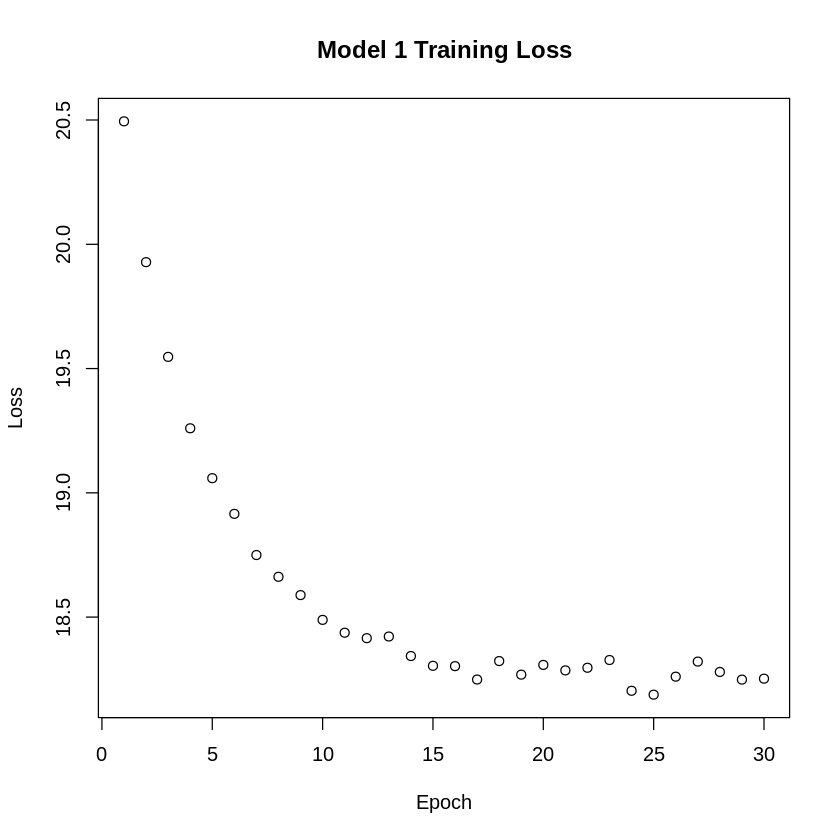

In [ ]:
# Train Model 1
history_ind <- train_model(vae_ind, data_train,
                           num_epochs = num_epochs,
                           batch_size = batch_size,
                           verbose = 1)

plot(history_ind,
     main = 'Model 1 Training Loss',
     sub = '',
     xlab = 'Epoch',
     ylab = 'Loss')

In [ ]:
# Get parameter estimates for Model 1
item_param_estimates_ind<- get_item_parameter_estimates(decoder_ind, model_type = 2)
diff_est_ind <- item_param_estimates_ind[[1]]
disc_est_ind <- item_param_estimates_ind[[2]]
test_theta_est_ind <- get_ability_parameter_estimates(encoder_ind, data_test)[[1]]
all_theta_est_ind <- get_ability_parameter_estimates(encoder_ind, data)[[1]]

In [ ]:
### save results

write.csv(disc_est_ind,"/content/SR/disc_est_ind.csv")
write.csv(diff_est_ind,"/content/SR/diff_est_ind.csv")
write.csv(all_theta_est_ind,"/content/SR/all_theta_est_ind.csv")
# write.csv(diff_estimates, file=paste('.\\results\\csv\\4_skills\\vae_ind_diff_', num_skills, 'skills.csv', sep=''))
# write.csv(all_skill_preds, file=paste('.\\results\\csv\\4_skills\\vae_ind_theta_', num_skills, 'skills.csv', sep=''))


In [ ]:
# corr test of true and predocted values 
true<- data
predict<- read.csv("/Q-mat/all_theta_est_indU.csv")
View(predict)
cor.test(true,predict, method = "pearson")

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.003505725,-0.018192591,-0.028315883,0.011867680,-0.015792463,-0.46746349,0.004939117,-0.023736365,0.001932310,0.005369924,⋯,0.000807307,-0.000761157,0.007032151,-0.080230460,0.000974841,-0.036669470,0.004434501,-0.005843597,0.001724049,-0.035009824
0.006214445,0.008848954,0.007489592,0.000323908,0.011424337,0.28653026,0.000335631,0.014786325,0.005973737,-0.005681206,⋯,-0.002657152,-0.000170102,0.001905174,0.052485585,0.000075000,0.023495466,-0.004429388,0.005461073,0.042887196,0.021000303
-0.001448892,0.005460411,-0.041554578,0.006923411,0.008765306,-0.81034058,-0.005615282,-0.029672522,0.000554031,-0.008406911,⋯,0.008943302,-0.000591783,-0.015552523,-0.117891379,0.000662577,-0.008810751,-0.006764532,-0.010087162,0.003677949,-0.045157786
-0.012341371,-0.003838733,-0.027757138,-0.003683243,-0.008919336,-1.17031086,-0.005009486,-0.017043330,-0.016664496,0.003071245,⋯,0.008149807,0.000009460,-0.005460058,-0.139908150,-0.000038800,0.001960572,0.003851317,-0.012378345,-0.007563770,-0.061100353
-0.000424847,0.006022427,0.019760743,0.000762036,0.005208179,0.51696754,0.000762879,0.014986686,0.008980233,-0.011092849,⋯,-0.010793032,0.000005520,0.002620840,0.076554760,-0.000105176,-0.007587824,-0.003702203,0.014721919,0.028485209,0.045429152
-0.002288613,0.006175540,-0.007551149,0.005327122,-0.001649760,0.53878397,0.003178819,0.000256799,0.012051555,-0.000915643,⋯,-0.000646349,-0.000310247,-0.010317559,0.073116288,0.000261615,-0.000358123,-0.004281330,-0.001413550,0.050012216,0.002716448
-0.008688290,-0.005364630,-0.011835128,0.003900183,-0.029405430,0.48195213,0.002891439,0.010328785,-0.001489231,0.009132719,⋯,0.000088000,0.000079200,0.008046224,0.121523842,-0.000130682,0.031173170,0.009757198,-0.001118103,0.057125270,0.012302749
-0.013591809,-0.012004301,0.009232283,-0.006292924,-0.007362913,-0.35521138,0.000982400,0.002885871,-0.003099102,-0.000190541,⋯,-0.016106423,0.000094700,-0.005240849,-0.089564979,-0.000123200,-0.074773863,-0.001808485,0.001512498,-0.103815243,-0.010047497
-0.007317318,-0.001957711,-0.042461924,0.003346235,0.004854023,-1.41043139,-0.005207409,-0.038222101,-0.008088532,-0.003710262,⋯,0.010783652,-0.000538109,-0.014732453,-0.211274937,0.000630614,-0.026504532,-0.003660080,-0.015043887,-0.016245395,-0.079168558


ERROR: ignored

In [ ]:
# Load in true values (included in this pacakge)
disc_true <- as.matrix(disc_true)
diff_true <- as.matrix(diff_true) 
theta_true<- as.matrix(theta_true)

In [ ]:
write.csv(disc_true,"/content/SR/disc_true.csv")
write.csv(diff_true,"/content/SR/diff_true.csv")
write.csv(theta_true,"/content/SR/theta_true.csv")

In [ ]:
# rmse score 



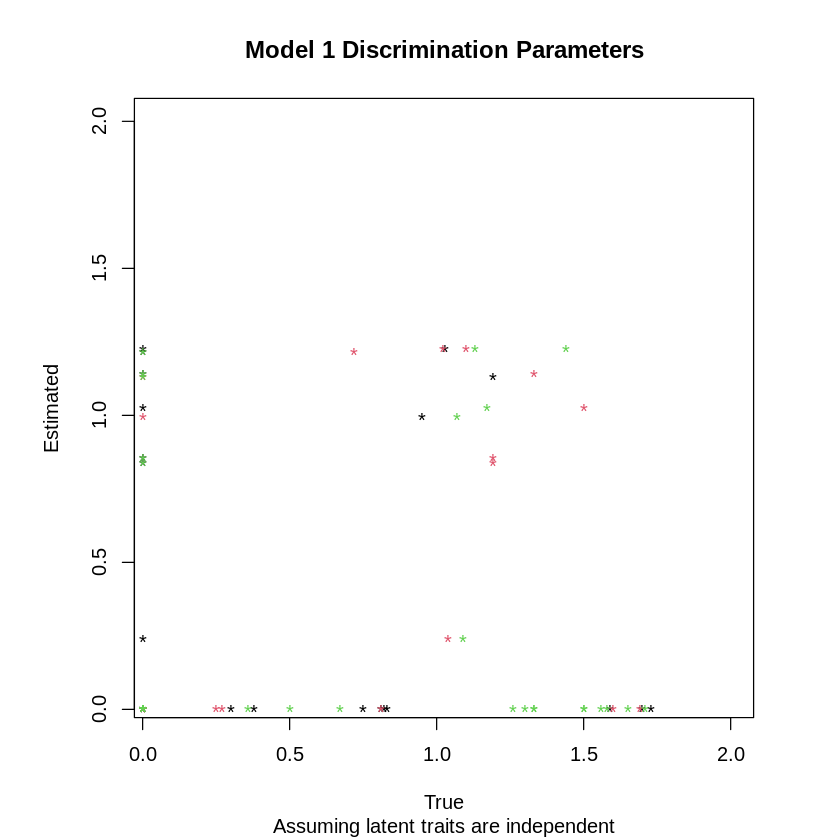

In [ ]:
# Examine Model 1 estimates
par(pty="s")
matplot(t(disc_true), t(disc_est_ind), pch = '*',
        xlim = c(0.05,2), ylim = c(0.05,2),
        main = 'Model 1 Discrimination Parameters',
        sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')


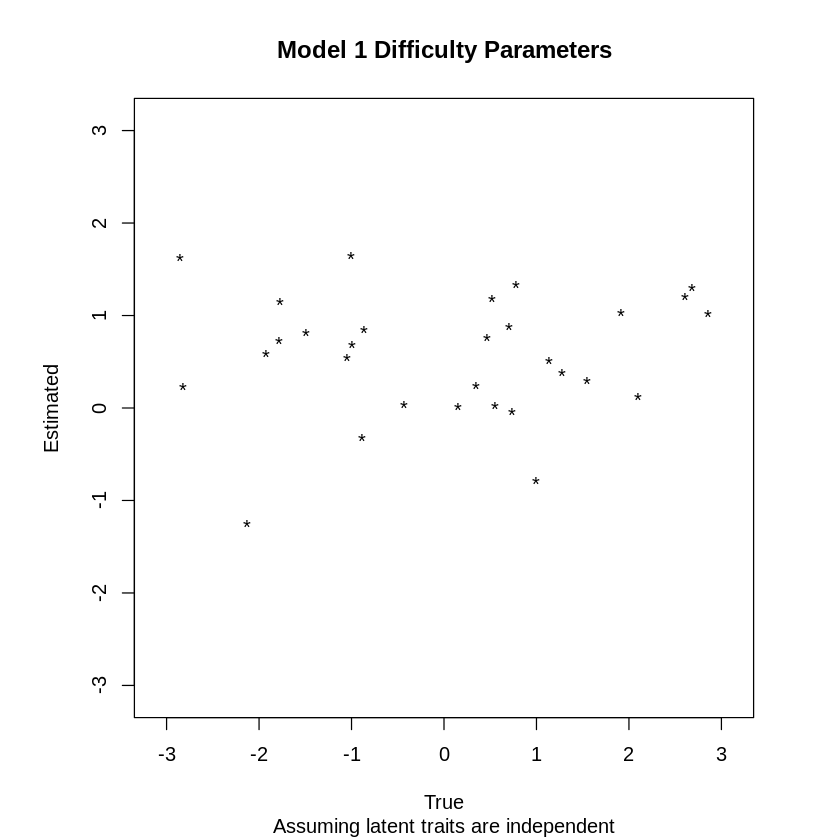

In [ ]:
# Discrimination Parameters

par(pty="s")
plot(diff_true, diff_est_ind, pch = '*',
     xlim = c(-3.1,3.1), ylim = c(-3.1,3.1),
     main = 'Model 1 Difficulty Parameters',
     sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')

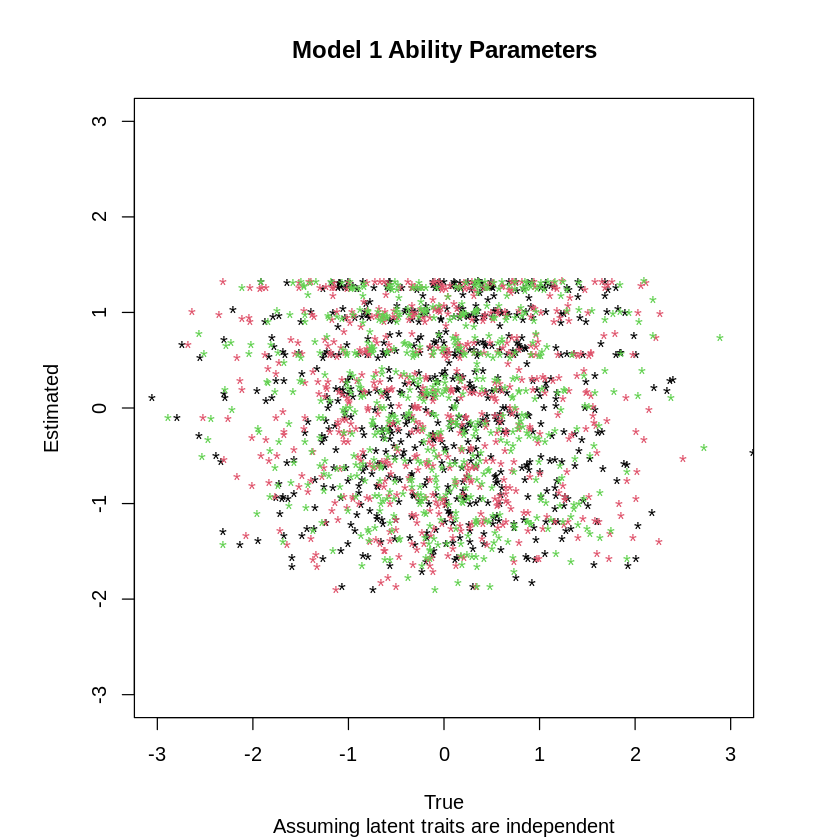

In [ ]:
# Ability Parameters
par(pty="s")
matplot(theta_true[3200:3800,],
        all_theta_est_ind[3200:3800,], pch = '*',
        xlim = c(-3,3), ylim = c(-3,3),
        main = 'Model 1 Ability Parameters',
        sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')

# 30 latent skills and 30 items 

In [ ]:
qqm1 <- read.csv("/content/saved results /Qmat2_30.csv")
data1 <- read.csv("/content/saved results /Qmat2_subset30.csv")

In [ ]:
head(qqm1)
head(data1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,0,0,1,0,1,1,0,0,⋯,1,0,0,1,1,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,⋯,0,1,0,0,0,1,0,0,1,0
3,1,1,1,1,0,1,0,0,1,0,⋯,0,0,1,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,⋯,1,0,0,0,0,0,1,0,0,1
6,1,0,1,1,1,1,1,1,1,1,⋯,0,1,1,1,1,1,0,1,1,0


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,1,0,0,1,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,1
2,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,0,1,1,1,1,1,1
3,0,1,1,0,1,0,0,0,0,1,⋯,0,1,1,0,0,0,0,1,0,0
4,1,0,0,0,1,0,1,0,0,0,⋯,0,0,0,1,1,0,0,0,1,0
5,1,1,0,0,0,0,0,1,1,1,⋯,0,0,1,1,1,1,1,0,0,0
6,1,1,1,0,1,1,0,0,1,1,⋯,0,1,1,0,1,1,0,1,1,1


In [ ]:
# Load data
data <- as.matrix(data1)
Q <- as.matrix(qqm1)

In [ ]:
# Model parameters
num_items <- as.double(dim(Q)[2])
num_skills <- as.double(dim(Q)[1])
num_students <- dim(data)[1]
means <- rep(0,num_skills)
enc_arch <- c(16L, 8L)
enc_act <- c('relu', 'tanh')
out_act <- 'sigmoid'
kl <- 1

In [ ]:
#Model 1: An ML2P-VAE model assuming latent traits are independent

models_ind <- build_vae_independent(num_items, num_skills,
                                    Q,
                                    model_type = 2,
                                    enc_hid_arch = enc_arch,
                                    hid_enc_activation = enc_act,
                                    output_activation = out_act)
encoder_ind <- models_ind[[1]]
decoder_ind <- models_ind[[2]]
vae_ind <- models_ind[[3]]
encoder_ind
decoder_ind
vae_ind

Warning message in backcompat_fix_rename_lr_to_learning_rate(...):
“the `lr` argument has been renamed to `learning_rate`.”


Model
Model: "model_3"
________________________________________________________________________________
Layer (type)              Output Shape      Param #  Connected to               
input (InputLayer)        [(None, 30)]      0                                   
________________________________________________________________________________
hidden_1 (Dense)          (None, 16)        496      input[0][0]                
________________________________________________________________________________
hidden_2 (Dense)          (None, 8)         136      hidden_1[0][0]             
________________________________________________________________________________
z_mean (Dense)            (None, 30)        270      hidden_2[0][0]             
________________________________________________________________________________
z_log_var (Dense)         (None, 30)        270      hidden_2[0][0]             
________________________________________________________________________________
z (Co

Model
Model: "model_4"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
latent_inputs (InputLayer)          [(None, 30)]                    0           
________________________________________________________________________________
vae_out (Dense)                     (None, 30)                      930         
Total params: 930
Trainable params: 930
Non-trainable params: 0
________________________________________________________________________________



Model
Model: "model_5"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
input (InputLayer)                  [(None, 30)]                    0           
________________________________________________________________________________
model_3 (Functional)                [(None, 30), (None, 30), (None, 1172        
________________________________________________________________________________
model_4 (Functional)                (None, 30)                      930         
Total params: 2,102
Trainable params: 2,102
Non-trainable params: 0
________________________________________________________________________________



In [ ]:
# Training parameters
num_train <- floor(0.8 * num_students)
num_test <- num_students - num_train
data_train <- data[1:num_train,]
data_test <- data[(num_train+1):num_students,]
num_epochs <- 30
batch_size <- 16

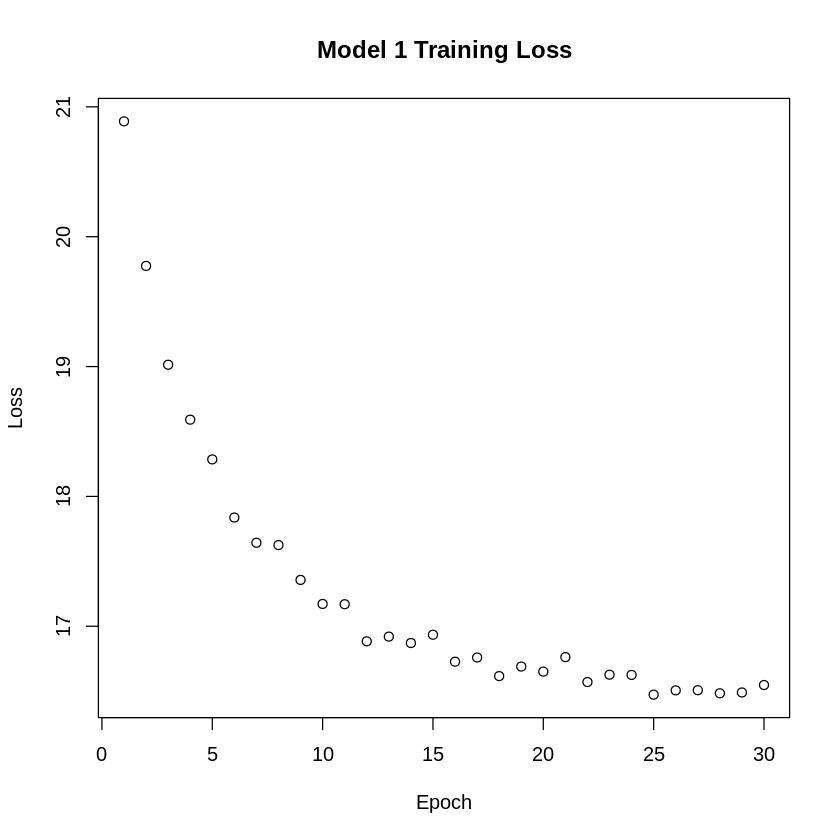

In [ ]:
# Train Model 1
history_ind <- train_model(vae_ind, data_train,
                           num_epochs = num_epochs,
                           batch_size = batch_size,
                           verbose = 1)

plot(history_ind,
     main = 'Model 1 Training Loss',
     sub = '',
     xlab = 'Epoch',
     ylab = 'Loss')

In [ ]:
# Get parameter estimates for Model 1
item_param_estimates_ind<- get_item_parameter_estimates(decoder_ind, model_type = 2)
diff_est_ind <- item_param_estimates_ind[[1]]
disc_est_ind <- item_param_estimates_ind[[2]]
test_theta_est_ind <- get_ability_parameter_estimates(encoder_ind, data_test)[[1]]
all_theta_est_ind <- get_ability_parameter_estimates(encoder_ind, data)[[1]]

In [ ]:
# Load in true values (included in this pacakge)
disc_true <- as.matrix(disc_true)
diff_true <- as.matrix(diff_true) 
theta_true<- as.matrix(theta_true)

In [ ]:

write.csv(disc_est_ind,"/content/30lb/disc_est_ind.csv")
write.csv(diff_est_ind,"/content/30lb/diff_est_ind.csv")
write.csv(all_theta_est_ind,"/content/30lb/all_theta_est_ind.csv")

In [ ]:
write.csv(disc_true,"/content/30lb/disc_true.csv")
write.csv(diff_true,"/content/30lb/diff_true.csv")
write.csv(theta_true,"/content/30lb/theta_true.csv")

In [ ]:
# rmse score 
install.packages("Metrics")
library(Metrics)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
est<- read.csv("/content/30lb/all_theta_est_indF.csv")
true<- read.csv("/content/saved results /Qmat2_subset30.csv")
est=as.numeric("est")
true= as.numeric("true")

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [ ]:
# Calculating RMSE using rmse()         
result = rmse(true, est)
summary(result)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
     NA      NA      NA     NaN      NA      NA       1 

In [ ]:
cor.test(true,est)

ERROR: ignored

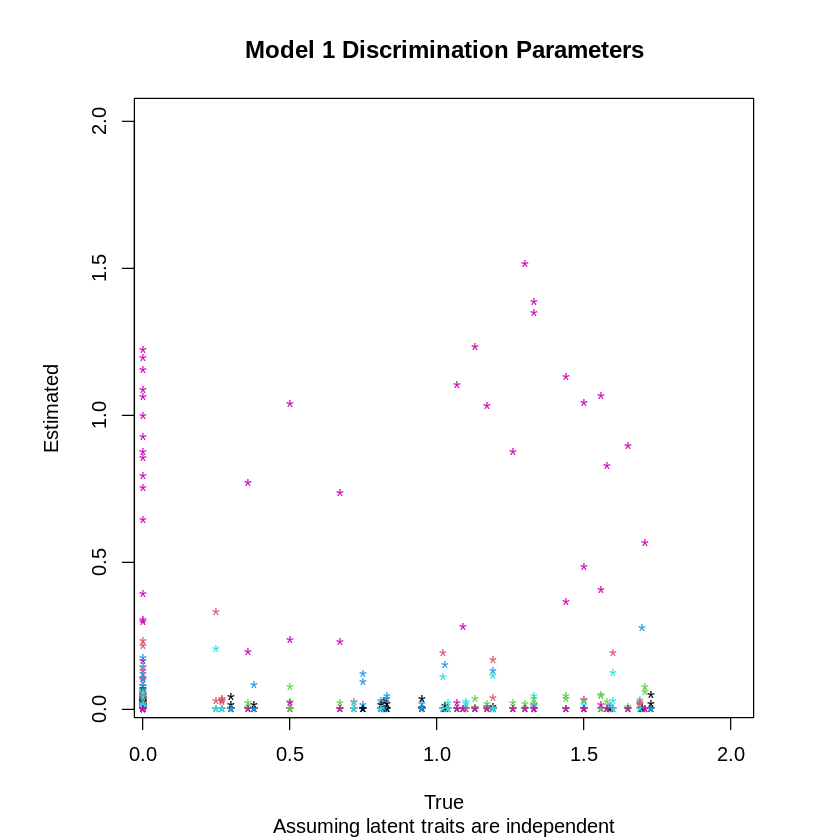

In [ ]:
# Examine Model 1 estimates
par(pty="s")
matplot(t(disc_true), t(disc_est_ind), pch = '*',
        xlim = c(0.05,2), ylim = c(0.05,2),
        main = 'Model 1 Discrimination Parameters',
        sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')

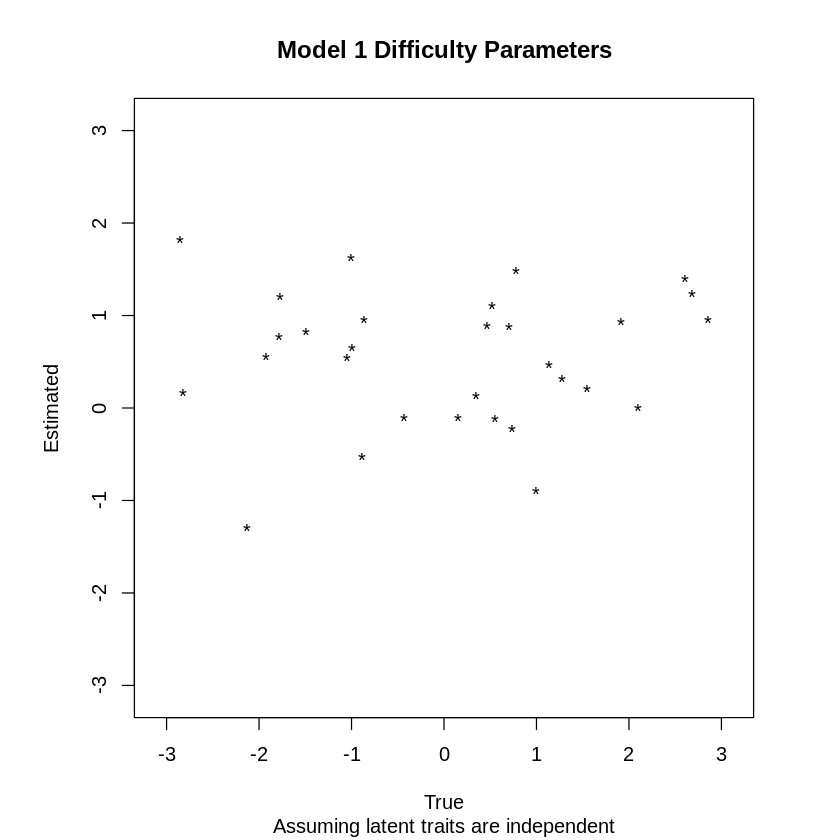

In [ ]:
# Discrimination Parameters

par(pty="s")
plot(diff_true, diff_est_ind, pch = '*',
     xlim = c(-3.1,3.1), ylim = c(-3.1,3.1),
     main = 'Model 1 Difficulty Parameters',
     sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')

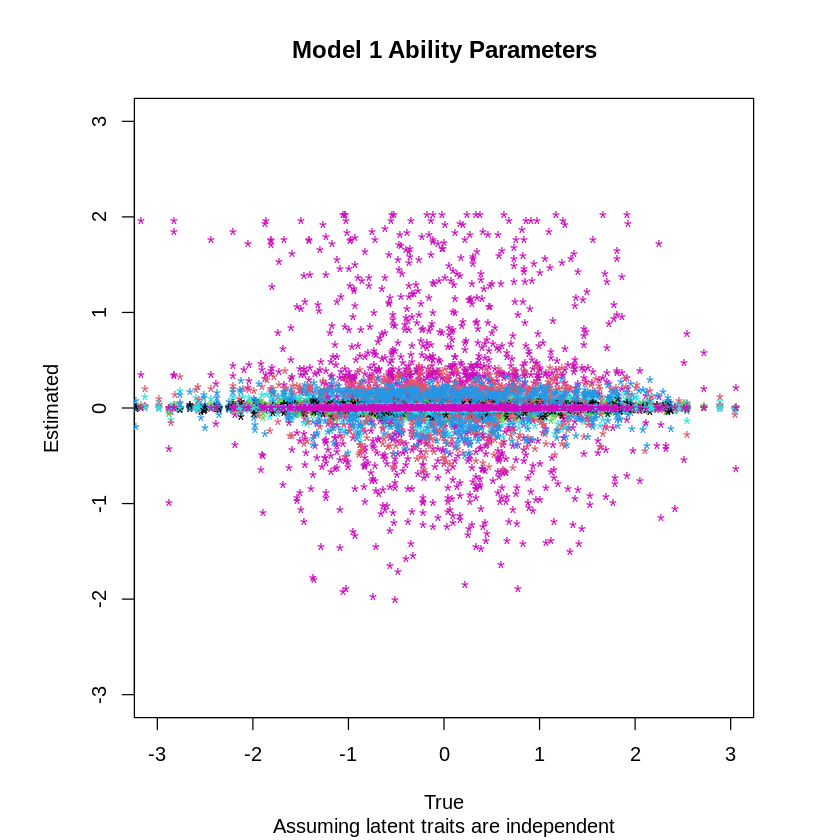

In [ ]:
# Ability Parameters
par(pty="s")
matplot(theta_true[2200:2800,],
        all_theta_est_ind[2200:2800,], pch = '*',
        xlim = c(-3,3), ylim = c(-3,3),
        main = 'Model 1 Ability Parameters',
        sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')

# **32 latent abilities**

In [ ]:
qqm2 <- read.csv("/Q-mat/Qmat2_32.csv")
data2 <- read.csv("/Q-mat/Qmat2_subset32.csv")

In [ ]:
# Load data
data <- as.matrix(data2)
Q <- as.matrix(qqm2)

In [ ]:
head(data)
head(Q)
summary(data)
str(data)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
0,0,1,0,0,1,0,0,0,1,⋯,0,0,0,0,0,0,0,1,0,0
1,1,1,1,1,1,1,1,1,1,⋯,1,0,1,1,1,1,1,1,1,1
0,1,1,0,1,0,0,0,0,1,⋯,1,0,0,0,0,1,0,0,1,0
1,0,0,0,1,0,1,0,0,0,⋯,0,1,1,0,0,0,1,0,1,1
1,1,0,0,0,0,0,1,1,1,⋯,1,1,1,1,1,0,0,0,0,1
1,1,1,0,1,1,0,0,1,1,⋯,1,0,1,1,0,1,1,1,1,1


V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
0,0,0,0,1,0,1,1,0,0,⋯,0,1,1,0,0,1,0,0,0,1
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,1,0,0,1,0,0,0
1,1,1,1,0,1,0,0,1,0,⋯,1,0,0,0,1,0,0,1,1,0
0,0,0,0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
0,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,1,0,0
1,0,1,1,1,1,1,1,1,1,⋯,1,1,1,1,0,1,1,0,1,1


       V1               V2               V3              V4        
 Min.   :0.0000   Min.   :0.0000   Min.   :0.000   Min.   :0.0000  
 1st Qu.:1.0000   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:0.0000  
 Median :1.0000   Median :1.0000   Median :1.000   Median :1.0000  
 Mean   :0.8338   Mean   :0.6602   Mean   :0.708   Mean   :0.5568  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.000   Max.   :1.0000  
       V5               V6               V7               V8        
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :1.0000   Median :1.0000   Median :0.0000   Median :1.0000  
 Mean   :0.5344   Mean   :0.6411   Mean   :0.2336   Mean   :0.7061  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
       V9              V10              V

 int [1:4199, 1:32] 0 1 0 1 1 1 1 0 1 1 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:32] "V1" "V2" "V3" "V4" ...


In [ ]:
# Model parameters
num_items <- as.double(dim(Q)[2])
num_skills <- as.double(dim(Q)[1])
num_students <- dim(data)[1]
means <- rep(0,num_skills)
enc_arch <- c(16L, 8L)
enc_act <- c('relu', 'tanh')
out_act <- 'sigmoid'
kl <- 1

In [ ]:
#Model 1: An ML2P-VAE model assuming latent traits are independent

models_ind <- build_vae_independent(num_items, num_skills,
                                    Q,
                                    model_type = 2,
                                    enc_hid_arch = enc_arch,
                                    hid_enc_activation = enc_act,
                                    output_activation = out_act)
encoder_ind <- models_ind[[1]]
decoder_ind <- models_ind[[2]]
vae_ind <- models_ind[[3]]
encoder_ind
decoder_ind
vae_ind

Warning message in backcompat_fix_rename_lr_to_learning_rate(...):
“the `lr` argument has been renamed to `learning_rate`.”


Model
Model: "model_3"
________________________________________________________________________________
Layer (type)              Output Shape      Param #  Connected to               
input (InputLayer)        [(None, 32)]      0                                   
________________________________________________________________________________
hidden_1 (Dense)          (None, 16)        528      input[0][0]                
________________________________________________________________________________
hidden_2 (Dense)          (None, 8)         136      hidden_1[0][0]             
________________________________________________________________________________
z_mean (Dense)            (None, 32)        288      hidden_2[0][0]             
________________________________________________________________________________
z_log_var (Dense)         (None, 32)        288      hidden_2[0][0]             
________________________________________________________________________________
z (Co

Model
Model: "model_4"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
latent_inputs (InputLayer)          [(None, 32)]                    0           
________________________________________________________________________________
vae_out (Dense)                     (None, 32)                      1056        
Total params: 1,056
Trainable params: 1,056
Non-trainable params: 0
________________________________________________________________________________



Model
Model: "model_5"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
input (InputLayer)                  [(None, 32)]                    0           
________________________________________________________________________________
model_3 (Functional)                [(None, 32), (None, 32), (None, 1240        
________________________________________________________________________________
model_4 (Functional)                (None, 32)                      1056        
Total params: 2,296
Trainable params: 2,296
Non-trainable params: 0
________________________________________________________________________________



In [ ]:
# Training parameters
num_train <- floor(0.8 * num_students)
num_test <- num_students - num_train
data_train <- data[1:num_train,]
data_test <- data[(num_train+1):num_students,]
num_epochs <- 30
batch_size <- 16

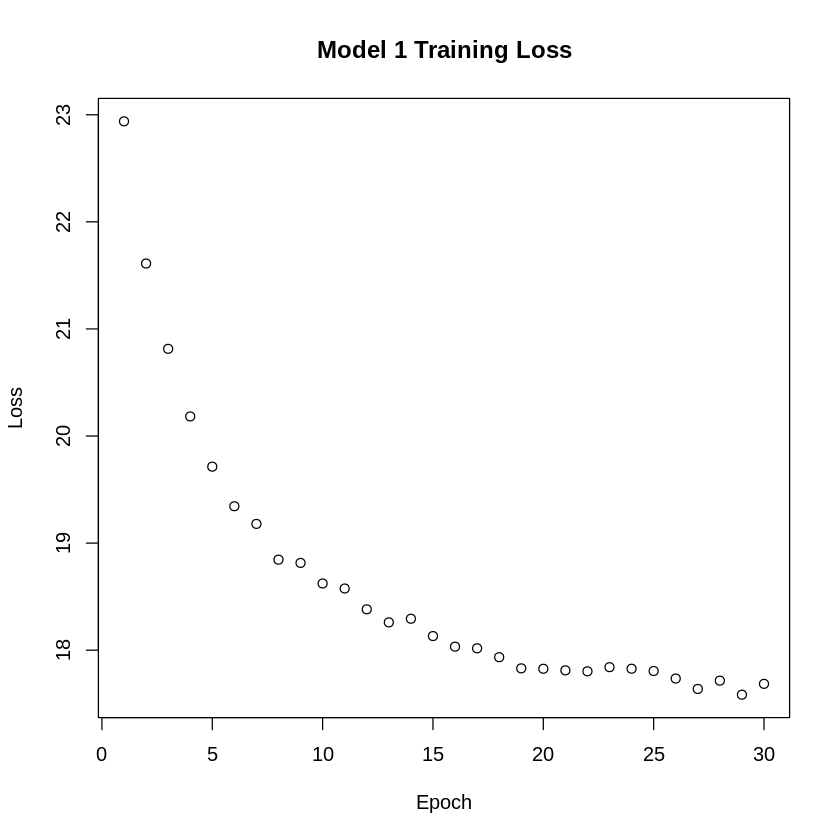

In [ ]:
# Train Model 1
history_ind <- train_model(vae_ind, data_train,
                           num_epochs = num_epochs,
                           batch_size = batch_size,
                           verbose = 1)

plot(history_ind,
     main = 'Model 1 Training Loss',
     sub = '',
     xlab = 'Epoch',
     ylab = 'Loss')

In [ ]:
# Get parameter estimates for Model 1
item_param_estimates_ind<- get_item_parameter_estimates(decoder_ind, model_type = 2)
diff_est_ind <- item_param_estimates_ind[[1]]
disc_est_ind <- item_param_estimates_ind[[2]]
test_theta_est_ind <- get_ability_parameter_estimates(encoder_ind, data_test)[[1]]
all_theta_est_ind <- get_ability_parameter_estimates(encoder_ind, data)[[1]]

In [ ]:
# Load in true values (included in this pacakge)
disc_true <- as.matrix(disc_true)
diff_true <- as.matrix(diff_true) 
theta_true<- as.matrix(theta_true)

In [ ]:
# Examine Model 1 estimates
par(pty="s")
matplot(t(disc_true), t(disc_est_ind), pch = '*',
        xlim = c(0.05,2), ylim = c(0.05,2),
        main = 'Model 1 Discrimination Parameters',
        sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')

ERROR: ignored

In [ ]:
par(pty="s")
plot(diff_true, diff_est_ind, pch = '*',
     xlim = c(-3.1,3.1), ylim = c(-3.1,3.1),
     main = 'Model 1 Difficulty Parameters',
     sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')

ERROR: ignored

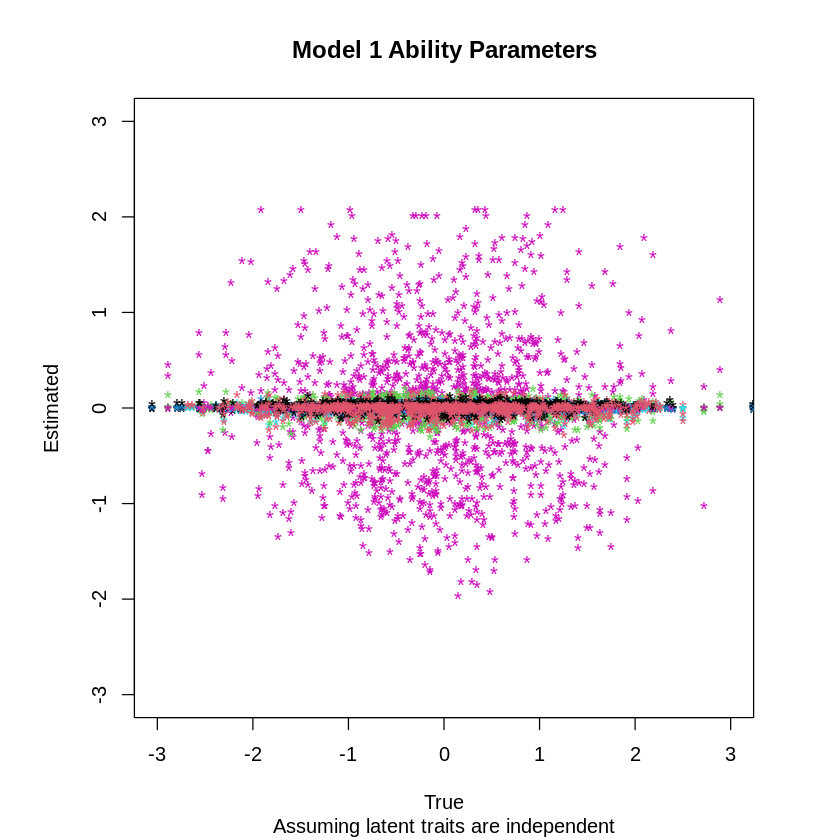

In [ ]:
# Ability Parameters
par(pty="s")
matplot(theta_true[3200:3800,],
        all_theta_est_ind[3200:3800,], pch = '*',
        xlim = c(-3,3), ylim = c(-3,3),
        main = 'Model 1 Ability Parameters',
        sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')

In [ ]:
qqm3 <- read.csv("/content/sample_data/Qmat2_sp_3c.csv")
data3 <- read.csv("/content/sample_data/Qmat2_subset_sp.csv")

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on '/content/sample_data/Qmat2_sp_3c.csv'”


In [ ]:
# Load data
data <- as.matrix(data3)
Q <- as.matrix(qqm3)

In [ ]:
head(data)
str(data)
head(Q)
str(Q)

MA_0011,MA_0012,MA_0014,MA_0015,MA_0016,MA_0018,MA_0020,MA_0022,MA_0024,MA_0025,⋯,MA_0038,MA_0039,MA_0064,MA_0065,MA_0066,MA_0067,MA_0068,MA_0069,MA_0070,MA_0071
0,0,1,0,0,1,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,1
1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,0,1,1,1,1,1,1
0,1,1,0,1,0,0,0,0,1,⋯,0,1,1,0,0,0,0,1,0,0
1,0,0,0,1,0,1,0,0,0,⋯,0,0,0,1,1,0,0,0,1,0
1,1,0,0,0,0,0,1,1,1,⋯,0,0,1,1,1,1,1,0,0,0
1,1,1,0,1,1,0,0,1,1,⋯,0,1,1,0,1,1,0,1,1,1


 int [1:4199, 1:30] 0 1 0 1 1 1 1 0 1 1 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:30] "MA_0011" "MA_0012" "MA_0014" "MA_0015" ...


MA_0011,MA_0012,MA_0014,MA_0015,MA_0016,MA_0018,MA_0020,MA_0022,MA_0024,MA_0025,⋯,MA_0038,MA_0039,MA_0064,MA_0065,MA_0066,MA_0067,MA_0068,MA_0069,MA_0070,MA_0071
0,0,0,0,1,0,1,1,0,0,⋯,1,0,0,1,1,0,0,1,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,1,0,0,0,1,0,0,1,0
1,1,1,1,0,1,0,0,1,0,⋯,0,0,1,0,0,0,1,0,0,1


 int [1:3, 1:30] 0 0 1 0 0 1 0 0 1 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:30] "MA_0011" "MA_0012" "MA_0014" "MA_0015" ...


In [ ]:
# Model parameters
num_items <- as.double(dim(Q)[2])
num_skills <- as.double(dim(Q)[1])
num_students <- dim(data)[1]
means <- rep(0,num_skills)
enc_arch <- c(16L, 8L)
enc_act <- c('relu', 'tanh')
out_act <- 'sigmoid'
kl <- 1

In [ ]:
#Model 1: An ML2P-VAE model assuming latent traits are independent

models_ind <- build_vae_independent(num_items, num_skills,
                                    Q,
                                    model_type = 2,
                                    enc_hid_arch = enc_arch,
                                    hid_enc_activation = enc_act,
                                    output_activation = out_act)
encoder_ind <- models_ind[[1]]
decoder_ind <- models_ind[[2]]
vae_ind <- models_ind[[3]]
encoder_ind
decoder_ind
vae_ind

Warning message in backcompat_fix_rename_lr_to_learning_rate(...):
“the `lr` argument has been renamed to `learning_rate`.”


Model
Model: "model_9"
________________________________________________________________________________
Layer (type)              Output Shape      Param #  Connected to               
input (InputLayer)        [(None, 30)]      0                                   
________________________________________________________________________________
hidden_1 (Dense)          (None, 16)        496      input[0][0]                
________________________________________________________________________________
hidden_2 (Dense)          (None, 8)         136      hidden_1[0][0]             
________________________________________________________________________________
z_mean (Dense)            (None, 3)         27       hidden_2[0][0]             
________________________________________________________________________________
z_log_var (Dense)         (None, 3)         27       hidden_2[0][0]             
________________________________________________________________________________
z (Co

Model
Model: "model_10"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
latent_inputs (InputLayer)          [(None, 3)]                     0           
________________________________________________________________________________
vae_out (Dense)                     (None, 30)                      120         
Total params: 120
Trainable params: 120
Non-trainable params: 0
________________________________________________________________________________



Model
Model: "model_11"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
input (InputLayer)                  [(None, 30)]                    0           
________________________________________________________________________________
model_9 (Functional)                [(None, 3), (None, 3), (None, 3 686         
________________________________________________________________________________
model_10 (Functional)               (None, 30)                      120         
Total params: 806
Trainable params: 806
Non-trainable params: 0
________________________________________________________________________________



In [ ]:
# Training parameters
num_train <- floor(0.8 * num_students)
num_test <- num_students - num_train
data_train <- data[1:num_train,]
data_test <- data[(num_train+1):num_students,]
num_epochs <- 30
batch_size <- 16

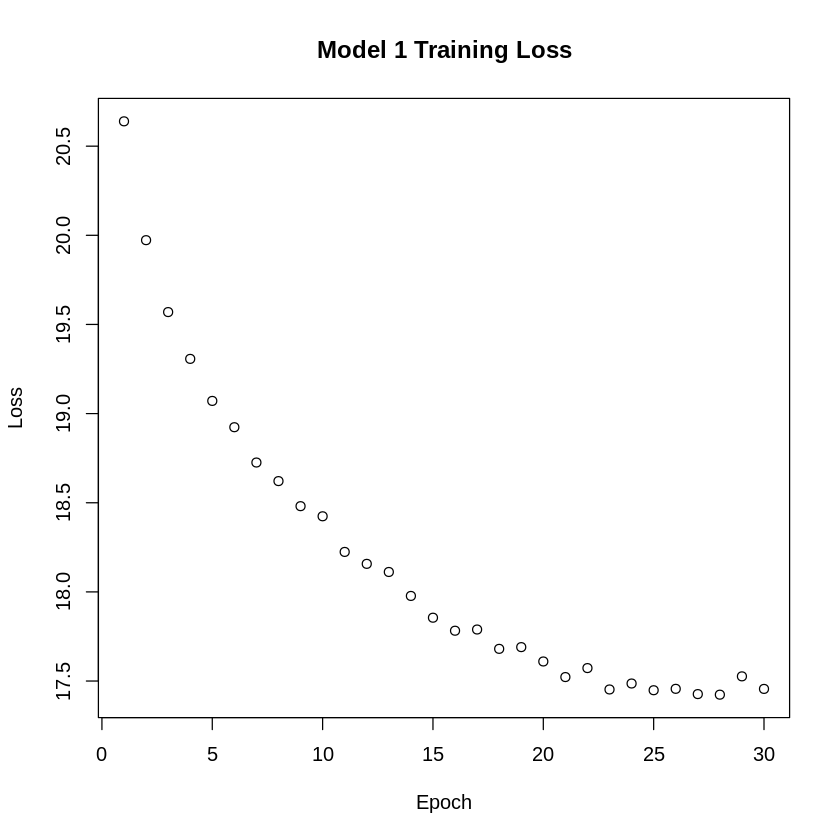

In [ ]:
# Train Model 1
history_ind <- train_model(vae_ind, data_train,
                           num_epochs = num_epochs,
                           batch_size = batch_size,
                           verbose = 1)

plot(history_ind,
     main = 'Model 1 Training Loss',
     sub = '',
     xlab = 'Epoch',
     ylab = 'Loss')

In [ ]:
# Get parameter estimates for Model 1
item_param_estimates_ind<- get_item_parameter_estimates(decoder_ind, model_type = 2)
diff_est_ind <- item_param_estimates_ind[[1]]
disc_est_ind <- item_param_estimates_ind[[2]]
test_theta_est_ind <- get_ability_parameter_estimates(encoder_ind, data_test)[[1]]
all_theta_est_ind <- get_ability_parameter_estimates(encoder_ind, data)[[1]]

In [ ]:
# Load in true values (included in this pacakge)
disc_true <- as.matrix(disc_true)
diff_true <- as.matrix(diff_true) 
theta_true<- as.matrix(theta_true)

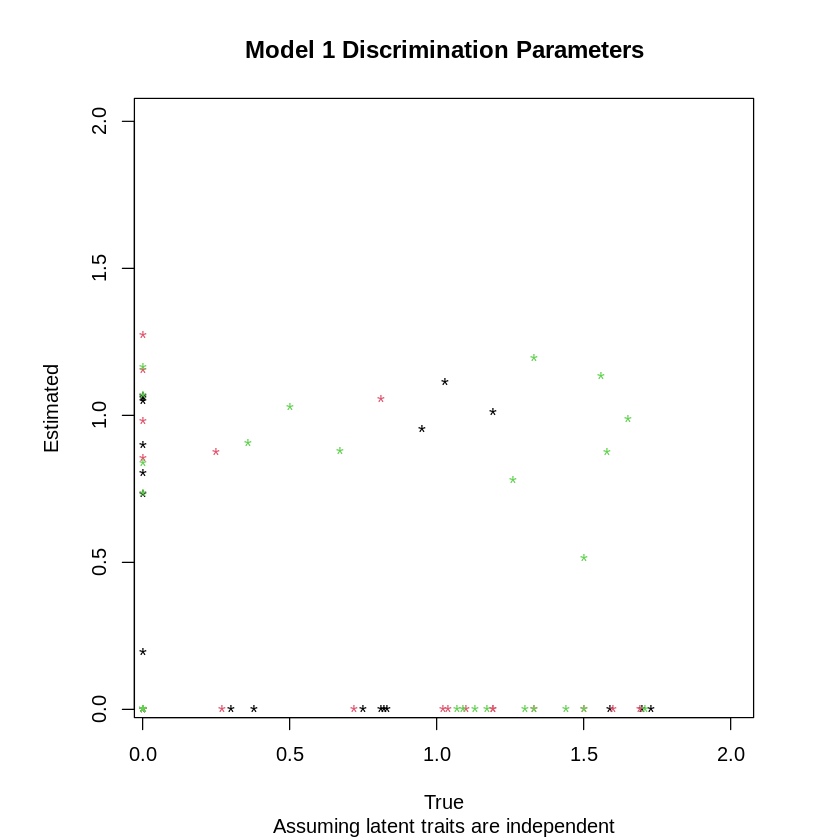

In [ ]:
# Examine Model 1 estimates
par(pty="s")
matplot(t(disc_true), t(disc_est_ind), pch = '*',
        xlim = c(0.05,2), ylim = c(0.05,2),
        main = 'Model 1 Discrimination Parameters',
        sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')

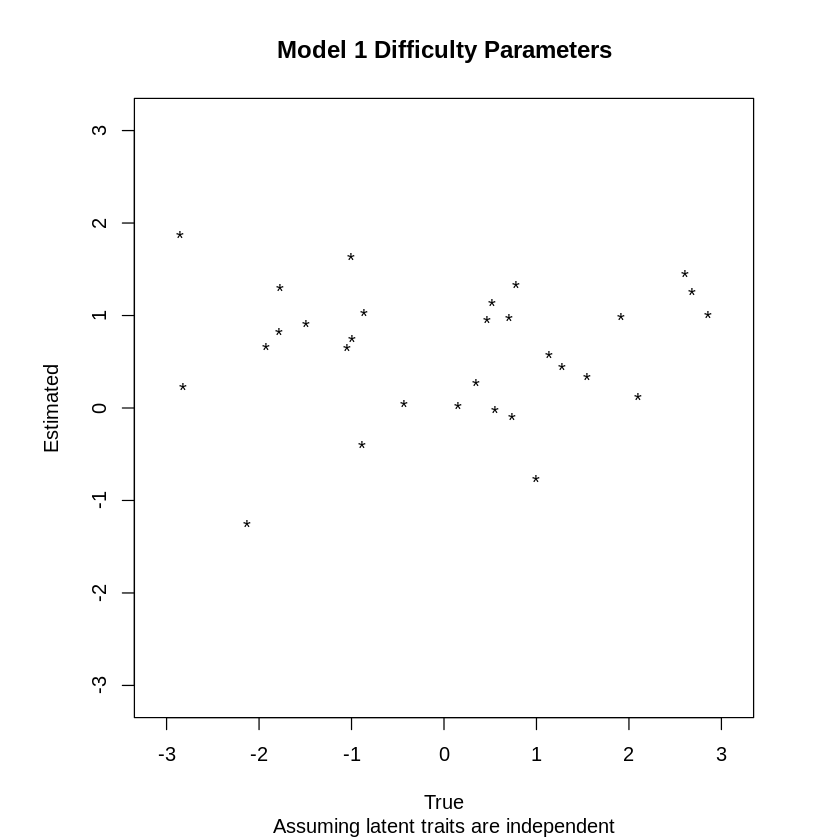

In [ ]:
# Difficulty parameter 
par(pty="s")
plot(diff_true, diff_est_ind, pch = '*',
     xlim = c(-3.1,3.1), ylim = c(-3.1,3.1),
     main = 'Model 1 Difficulty Parameters',
     sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')

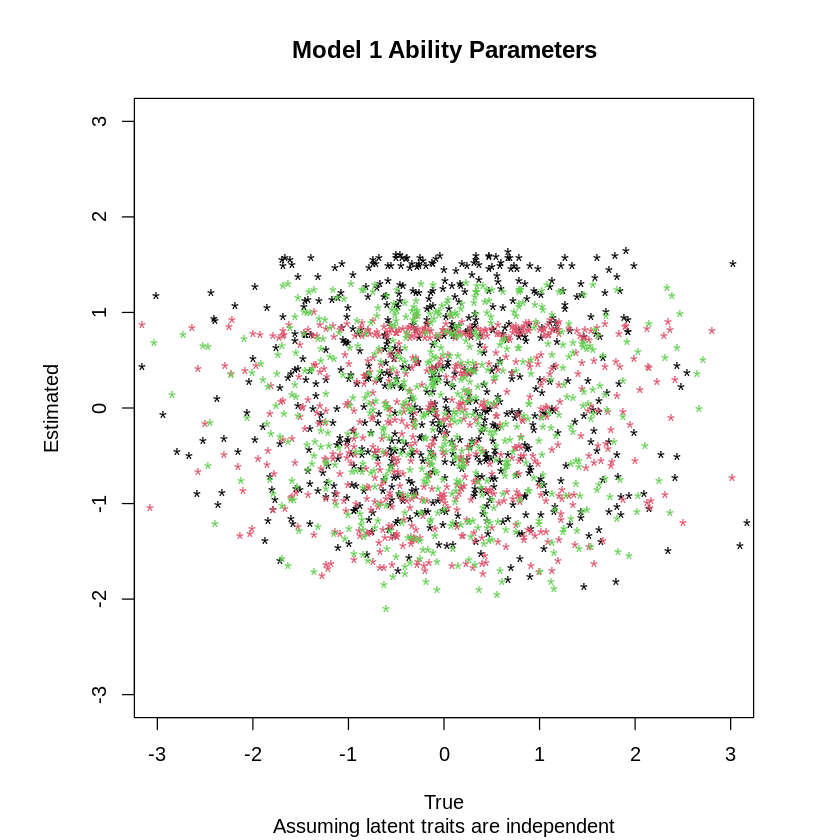

In [ ]:
# Ability Parameters
par(pty="s")
matplot(theta_true[1200:1800,],
        all_theta_est_ind[1200:1800,], pch = '*',
        xlim = c(-3,3), ylim = c(-3,3),
        main = 'Model 1 Ability Parameters',
        sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')

In [ ]:
qqm3 <- read.csv("/bin/qmat/Qmat2_sp_3c.csv")
data3 <- read.csv("/bin/qmat/Qmat2_subset_sp.csv")

Warning message in file(file, "rt"):
“cannot open file '/bin/qmat/Qmat2_sp_3c.csv': No such file or directory”


ERROR: ignored

In [ ]:
# Load data
data <- as.matrix(data3)
Q <- as.matrix(qqm3)

In [ ]:
head(data3)
summary(data3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,1,0,0,1,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,1
2,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,0,1,1,1,1,1,1
3,0,1,1,0,1,0,0,0,0,1,⋯,0,1,1,0,0,0,0,1,0,0
4,1,0,0,0,1,0,1,0,0,0,⋯,0,0,0,1,1,0,0,0,1,0
5,1,1,0,0,0,0,0,1,1,1,⋯,0,0,1,1,1,1,1,0,0,0
6,1,1,1,0,1,1,0,0,1,1,⋯,0,1,1,0,1,1,0,1,1,1


       V1               V2               V3              V4        
 Min.   :0.0000   Min.   :0.0000   Min.   :0.000   Min.   :0.0000  
 1st Qu.:1.0000   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:0.0000  
 Median :1.0000   Median :1.0000   Median :1.000   Median :1.0000  
 Mean   :0.8338   Mean   :0.6602   Mean   :0.708   Mean   :0.5568  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.000   Max.   :1.0000  
       V5               V6               V7               V8        
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :1.0000   Median :1.0000   Median :0.0000   Median :1.0000  
 Mean   :0.5344   Mean   :0.6411   Mean   :0.2336   Mean   :0.7061  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
       V9              V10              V

In [ ]:
str(Q)


 int [1:3, 1:30] 0 0 1 0 0 1 0 0 1 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:30] "V1" "V2" "V3" "V4" ...


In [ ]:
summary(Q)

       V1               V2               V3               V4        
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median :0.0000   Median :0.0000  
 Mean   :0.3333   Mean   :0.3333   Mean   :0.3333   Mean   :0.3333  
 3rd Qu.:0.5000   3rd Qu.:0.5000   3rd Qu.:0.5000   3rd Qu.:0.5000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
       V5               V6               V7               V8        
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median :0.0000   Median :0.0000  
 Mean   :0.3333   Mean   :0.3333   Mean   :0.3333   Mean   :0.3333  
 3rd Qu.:0.5000   3rd Qu.:0.5000   3rd Qu.:0.5000   3rd Qu.:0.5000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
       V9              V10        

In [ ]:
# Model parameters
num_items <- as.double(dim(Q)[2])
num_skills <- as.double(dim(Q)[1])
num_students <- dim(data)[1]
means <- rep(0,num_skills)
enc_arch <- c(64L, 32L)
enc_act <- c('relu', 'tanh')
out_act <- 'sigmoid'
kl <- 1

In [ ]:
#Model 1: An ML2P-VAE model assuming latent traits are independent

models_ind <- build_vae_independent(num_items, num_skills,
                                    Q,
                                    model_type = 2,
                                    enc_hid_arch = enc_arch,
                                    hid_enc_activation = enc_act,
                                    output_activation = out_act)
encoder_ind <- models_ind[[1]]
decoder_ind <- models_ind[[2]]
vae_ind <- models_ind[[3]]
encoder_ind
decoder_ind
vae_ind

Warning message in backcompat_fix_rename_lr_to_learning_rate(...):
“the `lr` argument has been renamed to `learning_rate`.”


Model
Model: "model_12"
________________________________________________________________________________
Layer (type)              Output Shape      Param #  Connected to               
input (InputLayer)        [(None, 30)]      0                                   
________________________________________________________________________________
hidden_1 (Dense)          (None, 64)        1984     input[0][0]                
________________________________________________________________________________
hidden_2 (Dense)          (None, 32)        2080     hidden_1[0][0]             
________________________________________________________________________________
z_mean (Dense)            (None, 3)         99       hidden_2[0][0]             
________________________________________________________________________________
z_log_var (Dense)         (None, 3)         99       hidden_2[0][0]             
________________________________________________________________________________
z (C

Model
Model: "model_13"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
latent_inputs (InputLayer)          [(None, 3)]                     0           
________________________________________________________________________________
vae_out (Dense)                     (None, 30)                      120         
Total params: 120
Trainable params: 120
Non-trainable params: 0
________________________________________________________________________________



Model
Model: "model_14"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
input (InputLayer)                  [(None, 30)]                    0           
________________________________________________________________________________
model_12 (Functional)               [(None, 3), (None, 3), (None, 3 4262        
________________________________________________________________________________
model_13 (Functional)               (None, 30)                      120         
Total params: 4,382
Trainable params: 4,382
Non-trainable params: 0
________________________________________________________________________________



In [ ]:
# Training parameters
num_train <- floor(0.8 * num_students)
num_test <- num_students - num_train
data_train <- data[1:num_train,]
data_test <- data[(num_train+1):num_students,]
num_epochs <- 10
batch_size <- 1

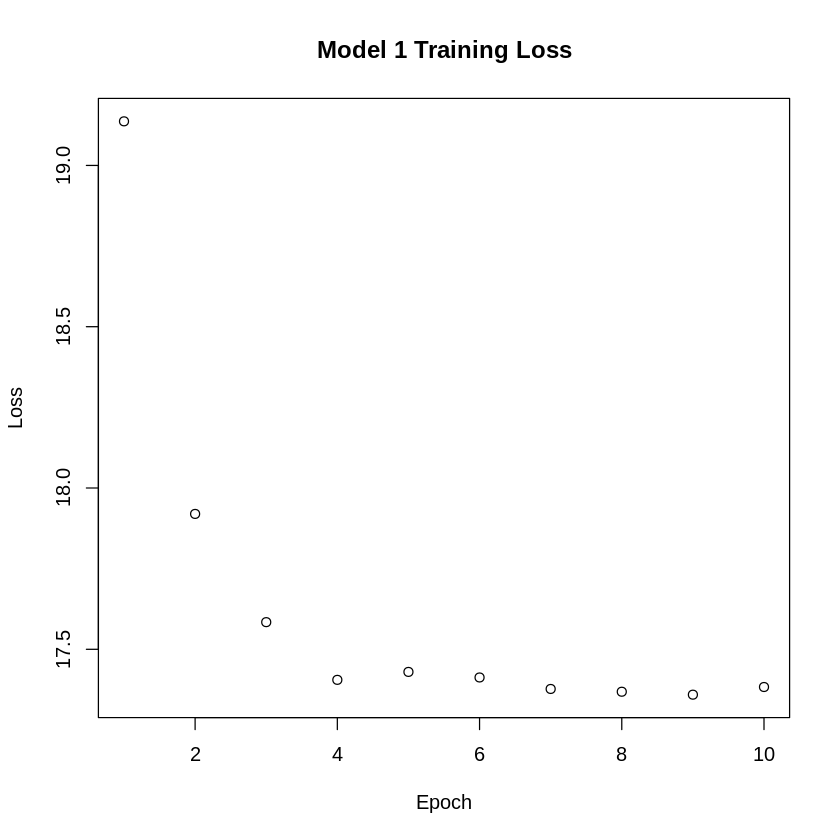

In [ ]:
# Train Model 1
history_ind <- train_model(vae_ind, data_train,
                           num_epochs = num_epochs,
                           batch_size = batch_size,
                           verbose = 1)

plot(history_ind,
     main = 'Model 1 Training Loss',
     sub = '',
     xlab = 'Epoch',
     ylab = 'Loss')

In [ ]:
# Get parameter estimates for Model 1
item_param_estimates_ind<- get_item_parameter_estimates(decoder_ind, model_type = 2)
diff_est_ind <- item_param_estimates_ind[[1]]
disc_est_ind <- item_param_estimates_ind[[2]]
test_theta_est_ind <- get_ability_parameter_estimates(encoder_ind, data_test)[[1]]
all_theta_est_ind <- get_ability_parameter_estimates(encoder_ind, data)[[1]]

In [ ]:
# Load in true values (included in this pacakge)
disc_true <- as.matrix(disc_true)
diff_true <- as.matrix(diff_true) 
theta_true<- as.matrix(theta_true)

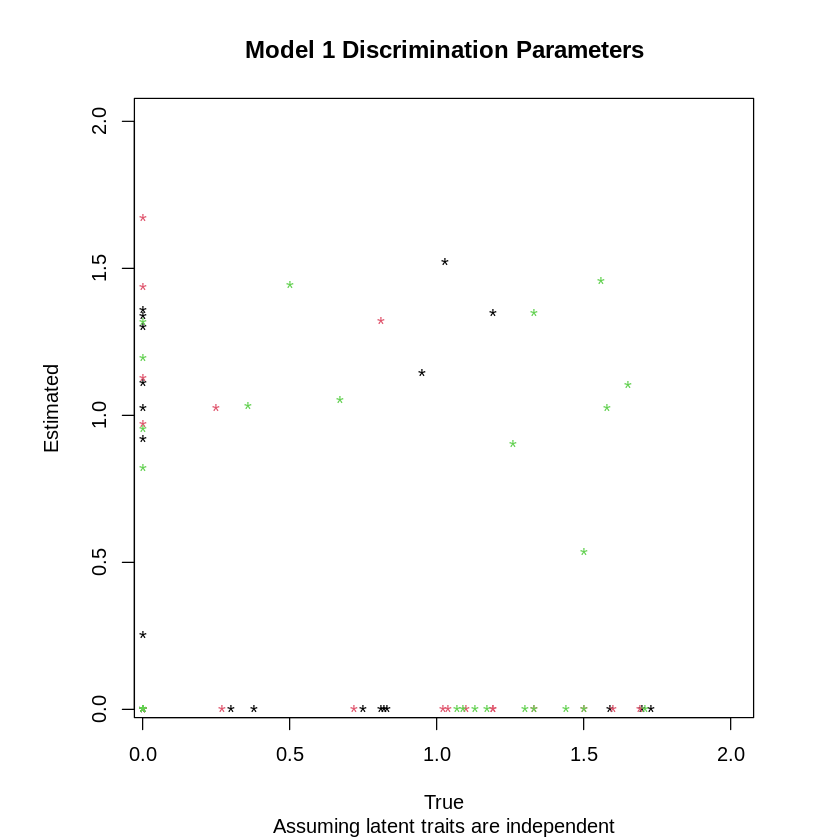

In [ ]:
# Examine Model 1 estimates
par(pty="s")
matplot(t(disc_true), t(disc_est_ind), pch = '*',
        xlim = c(0.05,2), ylim = c(0.05,2),
        main = 'Model 1 Discrimination Parameters',
        sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')

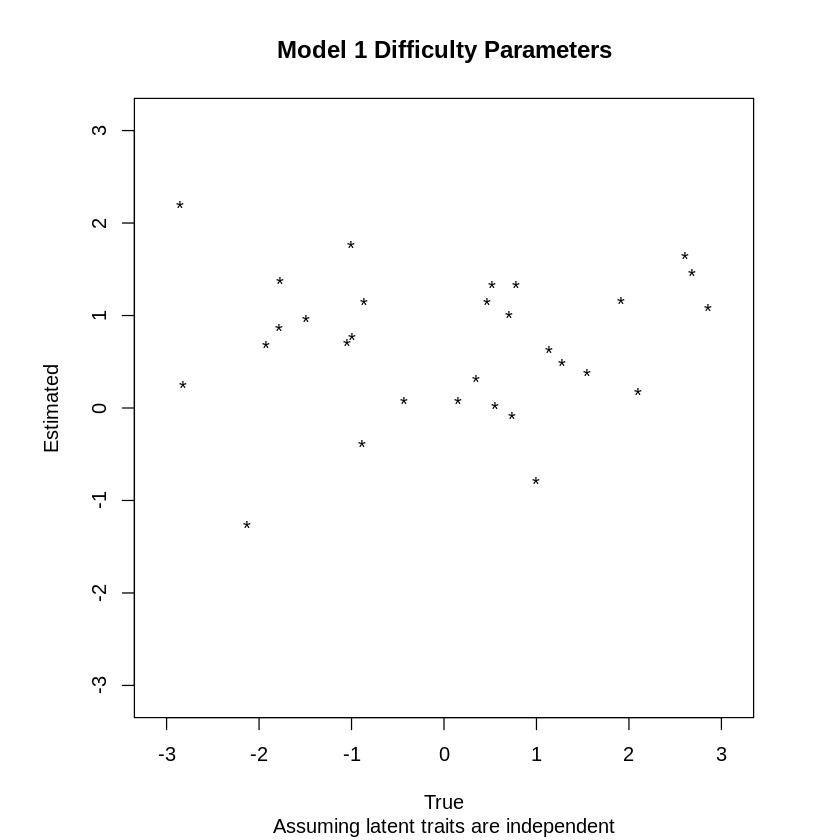

In [ ]:
# Difficulty parameter 
par(pty="s")
plot(diff_true, diff_est_ind, pch = '*',
     xlim = c(-3.1,3.1), ylim = c(-3.1,3.1),
     main = 'Model 1 Difficulty Parameters',
     sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')

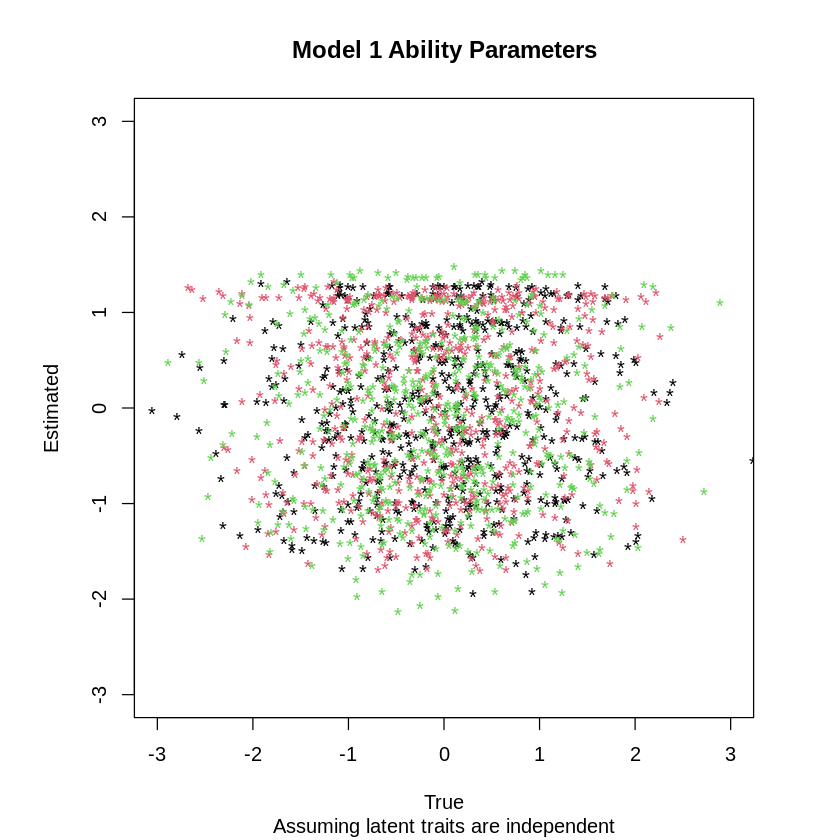

In [ ]:
# Ability Parameters
par(pty="s")
matplot(theta_true[3200:3800,],
        all_theta_est_ind[3200:3800,], pch = '*',
        xlim = c(-3,3), ylim = c(-3,3),
        main = 'Model 1 Ability Parameters',
        sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')